# Machine Learning project: Kidney Disease prediction

Goals : 
-Implement different models to predect the kidney disease
-Compare the models
-Present the most effective model

Team members :
-Arsalene Khachmadi
-Dhia Aderssa
-Khadija Khanfir
-Mohamed Dehmani Temani
-Mohamed Nader Saber
-Skander Belhassen

Class: 4DS6. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.feature_selection import RFECV,SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR, SVC, LinearSVC

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from IPython.core.display import display, HTML
#from canvasapi import canvas

## Data Understanding

In [2]:
#data = []
#with open('/data/chronic_kidney_disease.arff', "r") as f:
#    for line in f:
#        line = line.replace('\n', '')
#        data.append(line.split(','))


#names = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba',
#         'bgr', 'bu',  'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc',
#         'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
#         'class', 'Total']
    
#df = pd.DataFrame(data[29:], columns=names)
#df

In [3]:
#df.drop(columns=['Total'], inplace=True)
#df
#df = df.drop(['Total'], axis=1)
#print(df.shape)

In [4]:
#df=df.iloc[0:400,0:26]
#df

In [5]:
#type(df['age'][1])

In [6]:
#loading dataset
id="1l4PISDr5mXevSNYuz6FpaXVAVJKRM82Rult4Td0IAFU"
name="data"
gurl="https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(id,name)
df=pd.read_csv(gurl)
df.loc[df['class'] == "ckd\t", 'class'] = "ckd"
df.loc[df['class'] == "no", 'class'] = "notckd"
df

age    bp     sg   al   su     rbc        pc         pcc          ba  \
0    48.0  80.0  1.020  1.0  0.0       ?    normal  notpresent  notpresent   
1     7.0  50.0  1.020  4.0  0.0       ?    normal  notpresent  notpresent   
2    62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3    48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4    51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   
..    ...   ...    ...  ...  ...     ...       ...         ...         ...   
395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   

       bgr  ...   pcv    wbcc  rbcc  htn   dm  cad  appet   pe  ane   class  
0    121.0  ...  44.0  7800.0   5.2  yes  yes   no   good   no   no     ckd  
1      NaN  ...  38.0  6000.0   NaN   no   no   no   good   no   no     ckd  
2    423.0  ...  31.0  7500.0   NaN   no  yes   no   poor   no  yes     ckd  
3    117.0  ...  32.0  6700.0   3.9  yes   no   no   poor  yes  yes     ckd  
4    106.0  ...  35.0  7300.0   4.6   no   no   no   good   no   no     ckd  
..     ...  ...   ...     ...   ...  ...  ...  ...    ...  ...  ...     ...  
395  140.0  ...  47.0  6700.0   4.9   no   no   no   good   no   no  notckd  
396   75.0  ...  54.0  7800.0   6.2   no   no   no   good   no   no  notckd  
397  100.0  ...  49.0  6600.0   5.4   no   no   no   good   no   no  notckd  
398  114.0  ...  51.0  7200.0   5.9   no   no   no   good   no   no  notckd  
399  131.0  ...  53.0  6800.0   6.1   no   no   no   good   no   no  notckd  

[400 rows x 25 columns]

In [7]:
df.shape

(400, 25)

In [8]:
df.describe(include = 'all')

age          bp     sg          al          su     rbc      pc  \
count   391.000000  388.000000    400  354.000000  351.000000     400     400   
unique         NaN         NaN      6         NaN         NaN       3       3   
top            NaN         NaN  1.020         NaN         NaN  normal  normal   
freq           NaN         NaN    106         NaN         NaN     201     259   
mean     51.483376   76.469072    NaN    1.016949    0.450142     NaN     NaN   
std      17.169714   13.683637    NaN    1.352679    1.099191     NaN     NaN   
min       2.000000   50.000000    NaN    0.000000    0.000000     NaN     NaN   
25%      42.000000   70.000000    NaN    0.000000    0.000000     NaN     NaN   
50%      55.000000   80.000000    NaN    0.000000    0.000000     NaN     NaN   
75%      64.500000   80.000000    NaN    2.000000    0.000000     NaN     NaN   
max      90.000000  180.000000    NaN    5.000000    5.000000     NaN     NaN   

               pcc          ba         bgr  ...         pcv          wbcc  \
count          400         400  356.000000  ...  329.000000    294.000000   
unique           3           3         NaN  ...         NaN           NaN   
top     notpresent  notpresent         NaN  ...         NaN           NaN   
freq           354         374         NaN  ...         NaN           NaN   
mean           NaN         NaN  148.036517  ...   38.884498   8406.122449   
std            NaN         NaN   79.281714  ...    8.990105   2944.474190   
min            NaN         NaN   22.000000  ...    9.000000   2200.000000   
25%            NaN         NaN   99.000000  ...   32.000000   6500.000000   
50%            NaN         NaN  121.000000  ...   40.000000   8000.000000   
75%            NaN         NaN  163.000000  ...   45.000000   9800.000000   
max            NaN         NaN  490.000000  ...   54.000000  26400.000000   

              rbcc  htn   dm  cad  appet   pe  ane class  
count   245.000000  400  399  400    400  400  400   400  
unique         NaN    3    3    3      4    4    3     2  
top            NaN   no   no   no   good   no   no   ckd  
freq           NaN  251  260  364    316  322  339   250  
mean      4.699184  NaN  NaN  NaN    NaN  NaN  NaN   NaN  
std       1.015454  NaN  NaN  NaN    NaN  NaN  NaN   NaN  
min       2.100000  NaN  NaN  NaN    NaN  NaN  NaN   NaN  
25%       3.900000  NaN  NaN  NaN    NaN  NaN  NaN   NaN  
50%       4.700000  NaN  NaN  NaN    NaN  NaN  NaN   NaN  
75%       5.400000  NaN  NaN  NaN    NaN  NaN  NaN   NaN  
max       6.500000  NaN  NaN  NaN    NaN  NaN  NaN   NaN  

[11 rows x 25 columns]

In [9]:
df.describe(include="all").T

count unique         top freq         mean         std     min     25%  \
age    391.0    NaN         NaN  NaN    51.483376   17.169714     2.0    42.0   
bp     388.0    NaN         NaN  NaN    76.469072   13.683637    50.0    70.0   
sg       400      6       1.020  106          NaN         NaN     NaN     NaN   
al     354.0    NaN         NaN  NaN     1.016949    1.352679     0.0     0.0   
su     351.0    NaN         NaN  NaN     0.450142    1.099191     0.0     0.0   
rbc      400      3      normal  201          NaN         NaN     NaN     NaN   
pc       400      3      normal  259          NaN         NaN     NaN     NaN   
pcc      400      3  notpresent  354          NaN         NaN     NaN     NaN   
ba       400      3  notpresent  374          NaN         NaN     NaN     NaN   
bgr    356.0    NaN         NaN  NaN   148.036517   79.281714    22.0    99.0   
bu     379.0    NaN         NaN  NaN    57.336412   50.590648     1.5    27.0   
sc     236.0    NaN         NaN  NaN     3.393644    3.385464     1.1     1.2   
sod    313.0    NaN         NaN  NaN   137.528754   10.408752     4.5   135.0   
pot    264.0    NaN         NaN  NaN     4.339773    0.777029     2.5     3.7   
hemo   295.0    NaN         NaN  NaN    12.427797    2.943407     3.1    10.3   
pcv    329.0    NaN         NaN  NaN    38.884498    8.990105     9.0    32.0   
wbcc   294.0    NaN         NaN  NaN  8406.122449  2944.47419  2200.0  6500.0   
rbcc   245.0    NaN         NaN  NaN     4.699184    1.015454     2.1     3.9   
htn      400      3          no  251          NaN         NaN     NaN     NaN   
dm       399      3          no  260          NaN         NaN     NaN     NaN   
cad      400      3          no  364          NaN         NaN     NaN     NaN   
appet    400      4        good  316          NaN         NaN     NaN     NaN   
pe       400      4          no  322          NaN         NaN     NaN     NaN   
ane      400      3          no  339          NaN         NaN     NaN     NaN   
class    400      2         ckd  250          NaN         NaN     NaN     NaN   

          50%     75%      max  
age      55.0    64.5     90.0  
bp       80.0    80.0    180.0  
sg        NaN     NaN      NaN  
al        0.0     2.0      5.0  
su        0.0     0.0      5.0  
rbc       NaN     NaN      NaN  
pc        NaN     NaN      NaN  
pcc       NaN     NaN      NaN  
ba        NaN     NaN      NaN  
bgr     121.0   163.0    490.0  
bu       42.0    66.0    391.0  
sc        2.0   3.825     18.1  
sod     138.0   142.0    163.0  
pot       4.3     4.8      7.6  
hemo     12.5    14.8     17.8  
pcv      40.0    45.0     54.0  
wbcc   8000.0  9800.0  26400.0  
rbcc      4.7     5.4      6.5  
htn       NaN     NaN      NaN  
dm        NaN     NaN      NaN  
cad       NaN     NaN      NaN  
appet     NaN     NaN      NaN  
pe        NaN     NaN      NaN  
ane       NaN     NaN      NaN  
class     NaN     NaN      NaN

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      400 non-null    object 
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     400 non-null    object 
 6   pc      400 non-null    object 
 7   pcc     400 non-null    object 
 8   ba      400 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      379 non-null    float64
 11  sc      236 non-null    float64
 12  sod     313 non-null    float64
 13  pot     264 non-null    float64
 14  hemo    295 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    245 non-null    float64
 18  htn     400 non-null    object 
 19  dm      399 non-null    object 
 20  cad     400 non-null    object 
 21  appet   400 non-null    object 
 22  pe

In [11]:
df.head(10)

age     bp     sg   al   su       rbc        pc         pcc          ba  \
0  48.0   80.0  1.020  1.0  0.0         ?    normal  notpresent  notpresent   
1   7.0   50.0  1.020  4.0  0.0         ?    normal  notpresent  notpresent   
2  62.0   80.0  1.010  2.0  3.0    normal    normal  notpresent  notpresent   
3  48.0   70.0  1.005  4.0  0.0    normal  abnormal     present  notpresent   
4  51.0   80.0  1.010  2.0  0.0    normal    normal  notpresent  notpresent   
5  60.0   90.0  1.015  3.0  0.0         ?         ?  notpresent  notpresent   
6  68.0   70.0  1.010  0.0  0.0         ?    normal  notpresent  notpresent   
7  24.0    NaN  1.015  2.0  4.0    normal  abnormal  notpresent  notpresent   
8  52.0  100.0  1.015  3.0  0.0    normal  abnormal     present  notpresent   
9  53.0   90.0  1.020  2.0  0.0  abnormal  abnormal     present  notpresent   

     bgr  ...   pcv     wbcc  rbcc  htn   dm  cad  appet   pe  ane class  
0  121.0  ...  44.0   7800.0   5.2  yes  yes   no   good   no   no   ckd  
1    NaN  ...  38.0   6000.0   NaN   no   no   no   good   no   no   ckd  
2  423.0  ...  31.0   7500.0   NaN   no  yes   no   poor   no  yes   ckd  
3  117.0  ...  32.0   6700.0   3.9  yes   no   no   poor  yes  yes   ckd  
4  106.0  ...  35.0   7300.0   4.6   no   no   no   good   no   no   ckd  
5   74.0  ...  39.0   7800.0   4.4  yes  yes   no   good  yes   no   ckd  
6  100.0  ...  36.0      NaN   NaN   no   no   no   good   no   no   ckd  
7  410.0  ...  44.0   6900.0   NaN   no  yes   no   good  yes   no   ckd  
8  138.0  ...  33.0   9600.0   NaN  yes  yes   no   good   no  yes   ckd  
9   70.0  ...  29.0  12100.0   3.7  yes  yes   no   poor   no  yes   ckd  

[10 rows x 25 columns]

In [12]:
df.tail()

age    bp     sg   al   su     rbc      pc         pcc          ba  \
395  55.0  80.0  1.020  0.0  0.0  normal  normal  notpresent  notpresent   
396  42.0  70.0  1.025  0.0  0.0  normal  normal  notpresent  notpresent   
397  12.0  80.0  1.020  0.0  0.0  normal  normal  notpresent  notpresent   
398  17.0  60.0  1.025  0.0  0.0  normal  normal  notpresent  notpresent   
399  58.0  80.0  1.025  0.0  0.0  normal  normal  notpresent  notpresent   

       bgr  ...   pcv    wbcc  rbcc  htn  dm  cad  appet  pe ane   class  
395  140.0  ...  47.0  6700.0   4.9   no  no   no   good  no  no  notckd  
396   75.0  ...  54.0  7800.0   6.2   no  no   no   good  no  no  notckd  
397  100.0  ...  49.0  6600.0   5.4   no  no   no   good  no  no  notckd  
398  114.0  ...  51.0  7200.0   5.9   no  no   no   good  no  no  notckd  
399  131.0  ...  53.0  6800.0   6.1   no  no   no   good  no  no  notckd  

[5 rows x 25 columns]

In [13]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

## Categorical Features



In [14]:
cat_features = df.select_dtypes(include=['object','bool']).columns.tolist()
cat_features

['sg',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'class']

## Numerical Features

In [15]:
num_features = df.select_dtypes(exclude=['object','bool']).columns.tolist()
num_features

['age',
 'bp',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wbcc',
 'rbcc']

In [16]:
import plotly.offline as po
import plotly.graph_objs as go


plot_by_class_labels = df["class"].value_counts().keys().tolist()

plot_by_class_values = df["class"].value_counts().values.tolist()

plot_data= [
    go.Pie(labels = plot_by_class_labels,
           values = plot_by_class_values,
           marker = dict(colors =  [ 'Teal' ,'Grey'],
                         line = dict(color = "white",
                                     width =  1.5)),
           rotation = 100,
           hoverinfo = "label+value+text",
           hole = .6)
]
plot_layout = go.Layout(dict(title = "Class CKD",
                   plot_bgcolor  = "rgb(243,243,243)",
                   paper_bgcolor = "rgb(243,243,243)",))


fig = go.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

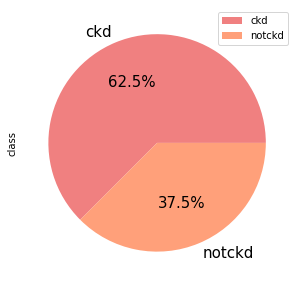

In [17]:
#Présentation du pourcentage selon class. 
#class peut prendre deux valeurs : 
#1 = « ckd ». 
#2 = « nockd ». 
plt.figure(figsize=(7,5))
df['class'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors = ['LIGHTCORAL','LIGHTSALMON'], textprops = {"fontsize":15})
plt.legend(labels=['ckd', 'notckd'])
plt.show()

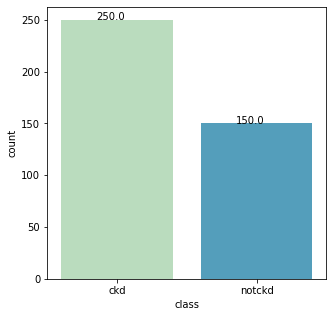

In [18]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x = df['class'], palette="GnBu")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

In [19]:
df['class'].value_counts(normalize = True).to_frame()

class
ckd     0.625
notckd  0.375

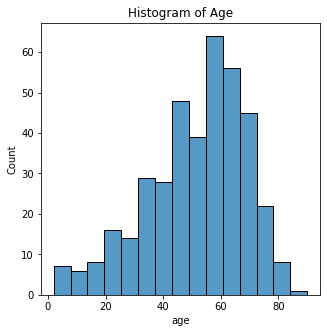

In [20]:
plt.figure(figsize=(5, 5))
sns.histplot(data=df, x = "age")
plt.title('Histogram of Age')
plt.show()

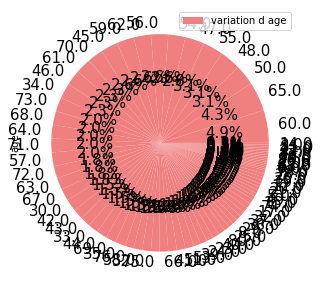

In [21]:
#Présentation du pourcentage selon class. 
#class peut prendre deux valeurs : 
#1 = « ckd ». 
#2 = « nockd ». 
plt.figure(figsize=(7,5))
df['age'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors = ['LIGHTCORAL'], textprops = {"fontsize":15})
plt.legend(labels=['variation d age'])
plt.show()

In [22]:
df

age    bp     sg   al   su     rbc        pc         pcc          ba  \
0    48.0  80.0  1.020  1.0  0.0       ?    normal  notpresent  notpresent   
1     7.0  50.0  1.020  4.0  0.0       ?    normal  notpresent  notpresent   
2    62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3    48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4    51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   
..    ...   ...    ...  ...  ...     ...       ...         ...         ...   
395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   

       bgr  ...   pcv    wbcc  rbcc  htn   dm  cad  appet   pe  ane   class  
0    121.0  ...  44.0  7800.0   5.2  yes  yes   no   good   no   no     ckd  
1      NaN  ...  38.0  6000.0   NaN   no   no   no   good   no   no     ckd  
2    423.0  ...  31.0  7500.0   NaN   no  yes   no   poor   no  yes     ckd  
3    117.0  ...  32.0  6700.0   3.9  yes   no   no   poor  yes  yes     ckd  
4    106.0  ...  35.0  7300.0   4.6   no   no   no   good   no   no     ckd  
..     ...  ...   ...     ...   ...  ...  ...  ...    ...  ...  ...     ...  
395  140.0  ...  47.0  6700.0   4.9   no   no   no   good   no   no  notckd  
396   75.0  ...  54.0  7800.0   6.2   no   no   no   good   no   no  notckd  
397  100.0  ...  49.0  6600.0   5.4   no   no   no   good   no   no  notckd  
398  114.0  ...  51.0  7200.0   5.9   no   no   no   good   no   no  notckd  
399  131.0  ...  53.0  6800.0   6.1   no   no   no   good   no   no  notckd  

[400 rows x 25 columns]

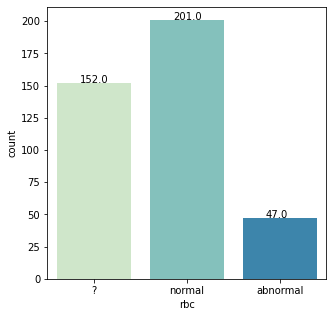

In [23]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x = df['rbc'], palette="GnBu")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

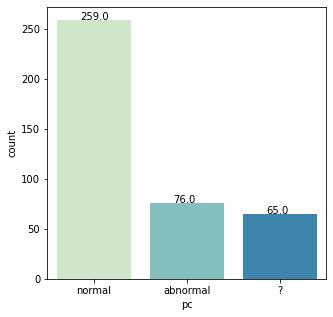

In [24]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x = df['pc'], palette="GnBu")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

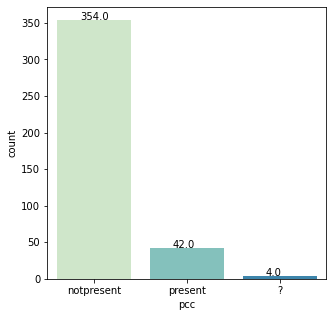

In [25]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x = df['pcc'], palette="GnBu")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

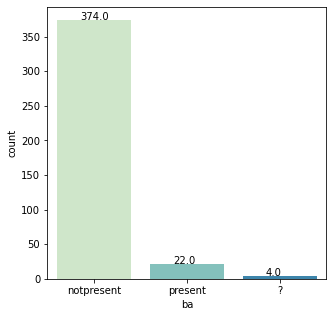

In [26]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x = df['ba'], palette="GnBu")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

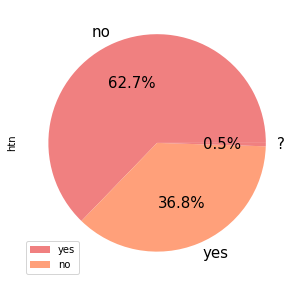

In [27]:
plt.figure(figsize=(7,5))
df['htn'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors = ['LIGHTCORAL','LIGHTSALMON'], textprops = {"fontsize":15})
plt.legend(labels=['yes', 'no'])
plt.show()

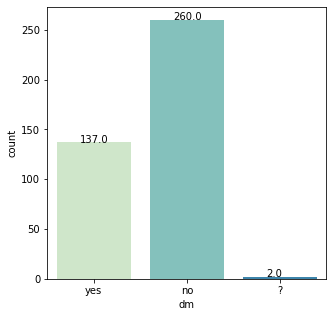

In [28]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x = df['dm'], palette="GnBu")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

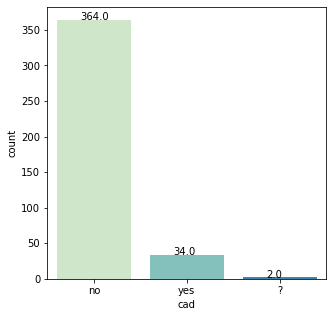

In [29]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x = df['cad'], palette="GnBu")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

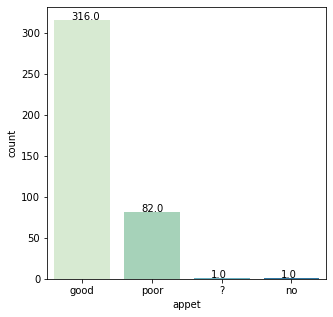

In [30]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x = df['appet'], palette="GnBu")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

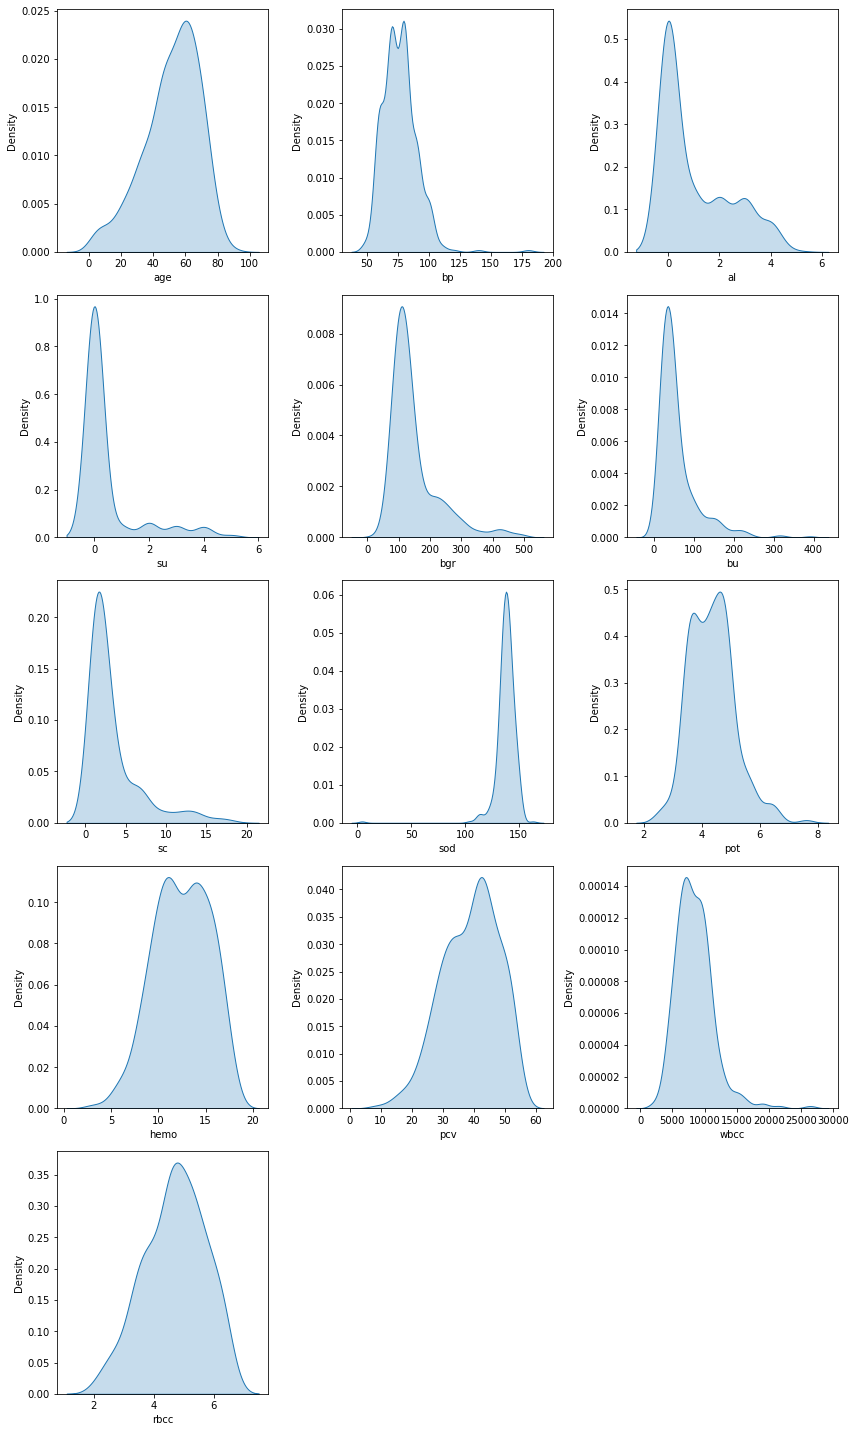

In [31]:
#distribution des valeurs numerique
cols = 3
rows = 5
fig = plt.figure( figsize=(cols*4, rows*4))
for i, col in enumerate(num_features):
    
    ax=fig.add_subplot(rows,cols,i+1,)
    sns.kdeplot(data=df, x = col, ax = ax, fill=True)
    
fig.tight_layout()  
plt.show()

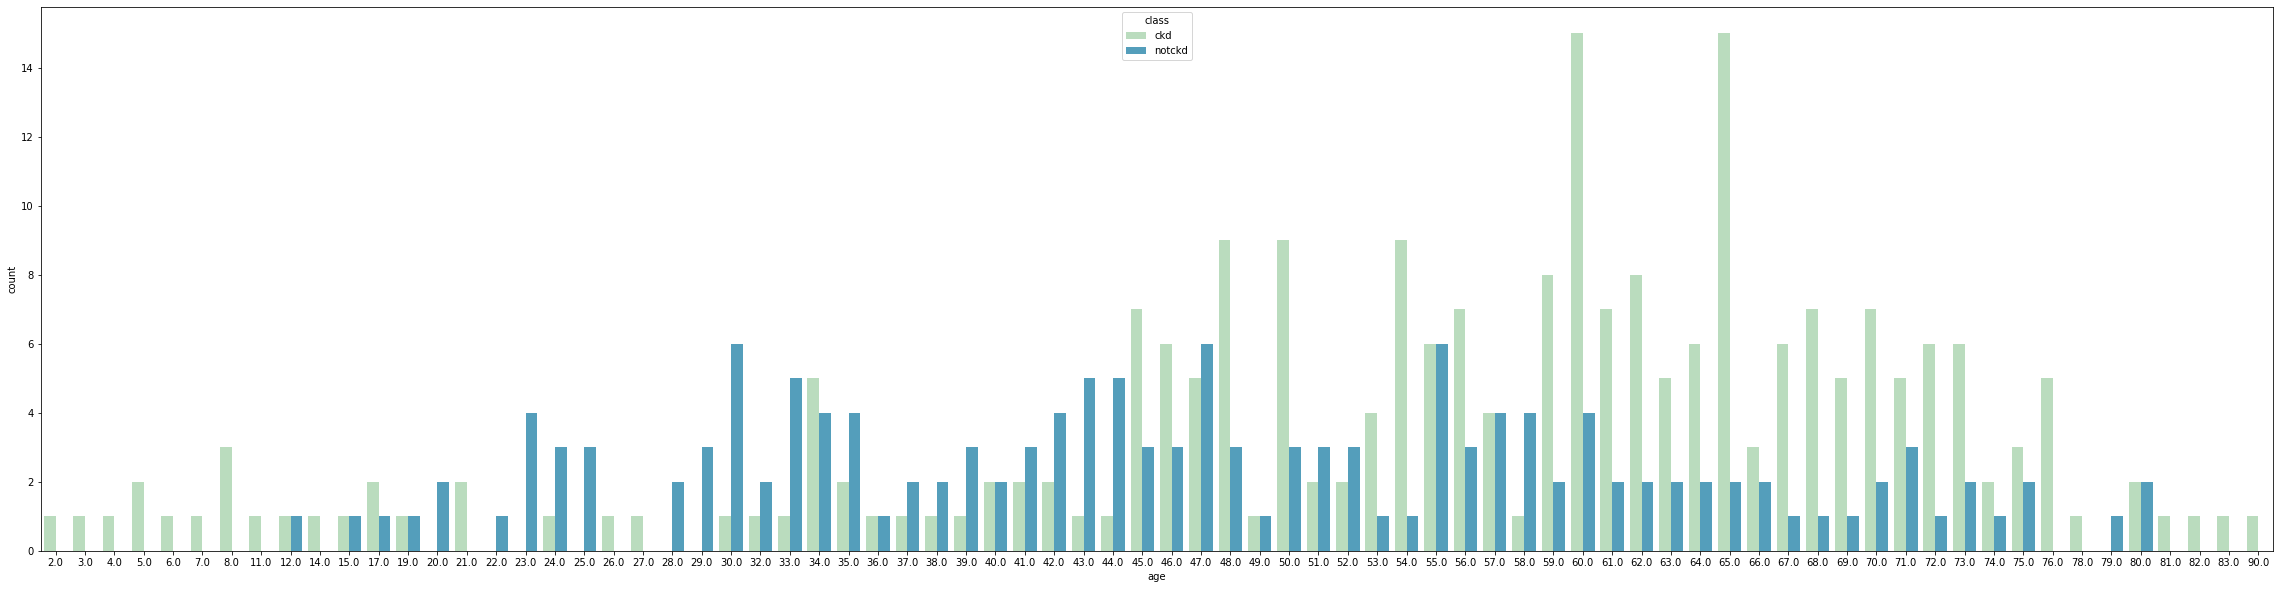

In [32]:
plt.figure(figsize=(40, 10))   
ax = sns.countplot(data=df, x = 'age',  palette="GnBu", hue='class')
fig.tight_layout()  
plt.show()

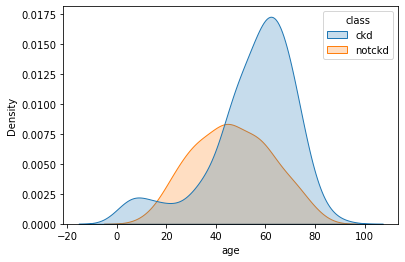

In [33]:
plt.figure() #hue juste coloration 
sns.kdeplot(data=df, x = "age", hue="class", fill=True)
plt.show()

In [34]:
#value_counts() we will count how many samples we have in each category of the column 'class'
df['class'].value_counts()

ckd       250
notckd    150
Name: class, dtype: int64

In [35]:
df['age'].value_counts()

60.0    19
65.0    17
50.0    12
48.0    12
55.0    12
        ..
22.0     1
11.0     1
81.0     1
3.0      1
14.0     1
Name: age, Length: 76, dtype: int64

In [36]:
df['bp'].value_counts()

80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
120.0      1
140.0      1
180.0      1
Name: bp, dtype: int64

In [37]:
# unique() will show us the distinct value of the column 
print(df.age.unique())
print(df.bp.unique())
#print(df.class.unique())
print(df.sg.unique())

[48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
[ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
['1.020' '1.010' '1.005' '1.015' '?' '1.025']


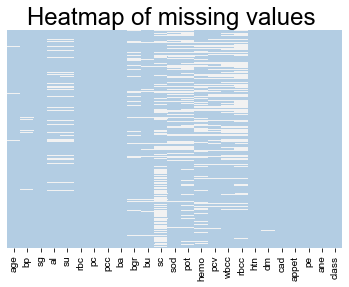

In [38]:
# searching null values
fig=sns.heatmap( yticklabels=False, data=df.isnull(), cbar=False, cmap="Pastel1",center=0.42)

fig.set_title('Heatmap of missing values ',fontdict= { 'fontsize': 24})
sns.set(rc={'figure.figsize':(24,24)})
sns.set_theme()

<Figure size 720x432 with 0 Axes>

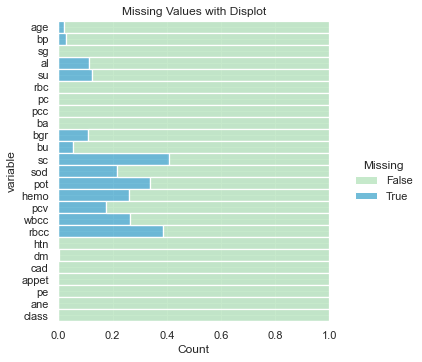

In [39]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="Missing"),
    y="variable",
    hue="Missing",
    multiple="fill",
    palette = "GnBu"
)
plt.title('Missing Values with Displot')
plt.show()

# Treat missing value

In [40]:
df.isnull().values.any()

True

In [41]:
df.isnull().sum()

age        9
bp        12
sg         0
al        46
su        49
rbc        0
pc         0
pcc        0
ba         0
bgr       44
bu        21
sc       164
sod       87
pot      136
hemo     105
pcv       71
wbcc     106
rbcc     155
htn        0
dm         1
cad        0
appet      0
pe         0
ane        0
class      0
dtype: int64

In [42]:
print("The sum of null values in our dataset =",df.isnull().sum().sum())

The sum of null values in our dataset = 1006


**Replacing** missing numerical values "?"

In [43]:
df1 = df.copy()
df1

age    bp     sg   al   su     rbc        pc         pcc          ba  \
0    48.0  80.0  1.020  1.0  0.0       ?    normal  notpresent  notpresent   
1     7.0  50.0  1.020  4.0  0.0       ?    normal  notpresent  notpresent   
2    62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3    48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4    51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   
..    ...   ...    ...  ...  ...     ...       ...         ...         ...   
395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   

       bgr  ...   pcv    wbcc  rbcc  htn   dm  cad  appet   pe  ane   class  
0    121.0  ...  44.0  7800.0   5.2  yes  yes   no   good   no   no     ckd  
1      NaN  ...  38.0  6000.0   NaN   no   no   no   good   no   no     ckd  
2    423.0  ...  31.0  7500.0   NaN   no  yes   no   poor   no  yes     ckd  
3    117.0  ...  32.0  6700.0   3.9  yes   no   no   poor  yes  yes     ckd  
4    106.0  ...  35.0  7300.0   4.6   no   no   no   good   no   no     ckd  
..     ...  ...   ...     ...   ...  ...  ...  ...    ...  ...  ...     ...  
395  140.0  ...  47.0  6700.0   4.9   no   no   no   good   no   no  notckd  
396   75.0  ...  54.0  7800.0   6.2   no   no   no   good   no   no  notckd  
397  100.0  ...  49.0  6600.0   5.4   no   no   no   good   no   no  notckd  
398  114.0  ...  51.0  7200.0   5.9   no   no   no   good   no   no  notckd  
399  131.0  ...  53.0  6800.0   6.1   no   no   no   good   no   no  notckd  

[400 rows x 25 columns]

In [44]:
df1.isnull().sum()

age        9
bp        12
sg         0
al        46
su        49
rbc        0
pc         0
pcc        0
ba         0
bgr       44
bu        21
sc       164
sod       87
pot      136
hemo     105
pcv       71
wbcc     106
rbcc     155
htn        0
dm         1
cad        0
appet      0
pe         0
ane        0
class      0
dtype: int64

In [45]:
num_features

['age',
 'bp',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wbcc',
 'rbcc']

In [46]:
for i in num_features:
    df1[i].fillna(df1[i].mean(),inplace = True)

In [47]:
df1.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       1
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [48]:
#remplacer missing value  "nan" dans les variables categoriques par l élement le plus frequent dans chaque colonnes 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df1 = pd.DataFrame(imputer.fit_transform(df1),columns=df1.columns)

In [49]:
df1.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [50]:
#remplacer missing value  "?" par l élement le plus frequent dans chaque colonnes 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values="?",strategy='most_frequent')
df1 = pd.DataFrame(imputer.fit_transform(df1),columns=df1.columns)

In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     400 non-null    object
 1   bp      400 non-null    object
 2   sg      400 non-null    object
 3   al      400 non-null    object
 4   su      400 non-null    object
 5   rbc     400 non-null    object
 6   pc      400 non-null    object
 7   pcc     400 non-null    object
 8   ba      400 non-null    object
 9   bgr     400 non-null    object
 10  bu      400 non-null    object
 11  sc      400 non-null    object
 12  sod     400 non-null    object
 13  pot     400 non-null    object
 14  hemo    400 non-null    object
 15  pcv     400 non-null    object
 16  wbcc    400 non-null    object
 17  rbcc    400 non-null    object
 18  htn     400 non-null    object
 19  dm      400 non-null    object
 20  cad     400 non-null    object
 21  appet   400 non-null    object
 22  pe      400 non-null    ob

In [52]:
df1

age    bp     sg   al   su     rbc        pc         pcc          ba  \
0    48.0  80.0  1.020  1.0  0.0  normal    normal  notpresent  notpresent   
1     7.0  50.0  1.020  4.0  0.0  normal    normal  notpresent  notpresent   
2    62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3    48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4    51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   
..    ...   ...    ...  ...  ...     ...       ...         ...         ...   
395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   

            bgr  ...   pcv    wbcc      rbcc  htn   dm cad appet   pe  ane  \
0         121.0  ...  44.0  7800.0       5.2  yes  yes  no  good   no   no   
1    148.036517  ...  38.0  6000.0  4.699184   no   no  no  good   no   no   
2         423.0  ...  31.0  7500.0  4.699184   no  yes  no  poor   no  yes   
3         117.0  ...  32.0  6700.0       3.9  yes   no  no  poor  yes  yes   
4         106.0  ...  35.0  7300.0       4.6   no   no  no  good   no   no   
..          ...  ...   ...     ...       ...  ...  ...  ..   ...  ...  ...   
395       140.0  ...  47.0  6700.0       4.9   no   no  no  good   no   no   
396        75.0  ...  54.0  7800.0       6.2   no   no  no  good   no   no   
397       100.0  ...  49.0  6600.0       5.4   no   no  no  good   no   no   
398       114.0  ...  51.0  7200.0       5.9   no   no  no  good   no   no   
399       131.0  ...  53.0  6800.0       6.1   no   no  no  good   no   no   

      class  
0       ckd  
1       ckd  
2       ckd  
3       ckd  
4       ckd  
..      ...  
395  notckd  
396  notckd  
397  notckd  
398  notckd  
399  notckd  

[400 rows x 25 columns]

In [53]:
#df1.set_index(df.index ,inplace=True)
#df1

In [54]:
df1.age.unique()

array([48.0, 7.0, 62.0, 51.0, 60.0, 68.0, 24.0, 52.0, 53.0, 50.0, 63.0,
       40.0, 47.0, 61.0, 21.0, 42.0, 75.0, 69.0, 51.48337595907928, 73.0,
       70.0, 65.0, 76.0, 72.0, 82.0, 46.0, 45.0, 35.0, 54.0, 11.0, 59.0,
       67.0, 15.0, 55.0, 44.0, 26.0, 64.0, 56.0, 5.0, 74.0, 38.0, 58.0,
       71.0, 34.0, 17.0, 12.0, 43.0, 41.0, 57.0, 8.0, 39.0, 66.0, 81.0,
       14.0, 27.0, 83.0, 30.0, 4.0, 3.0, 6.0, 32.0, 80.0, 49.0, 90.0,
       78.0, 19.0, 2.0, 33.0, 36.0, 37.0, 23.0, 25.0, 20.0, 29.0, 28.0,
       22.0, 79.0], dtype=object)

In [55]:
print(df1["bp"].value_counts())
print(df1["rbc"].value_counts())
print(df1["rbcc"].value_counts())

80.000000     116
70.000000     112
60.000000      71
90.000000      53
100.000000     25
76.469072      12
50.000000       5
110.000000      3
140.000000      1
180.000000      1
120.000000      1
Name: bp, dtype: int64
normal      353
abnormal     47
Name: rbc, dtype: int64
4.699184    155
5.200000     18
4.500000     16
4.900000     14
4.700000     11
3.900000     10
4.800000     10
3.400000      9
4.600000      9
3.700000      8
5.900000      8
5.500000      8
6.100000      8
5.800000      7
5.300000      7
5.400000      7
3.800000      7
4.200000      6
4.300000      6
5.600000      6
3.200000      5
6.400000      5
4.400000      5
6.200000      5
4.100000      5
6.500000      5
5.100000      5
5.700000      5
3.600000      4
6.300000      4
3.500000      3
3.300000      3
2.800000      2
2.500000      2
2.700000      2
3.100000      2
2.600000      2
2.900000      2
2.100000      2
2.400000      1
2.300000      1
Name: rbcc, dtype: int64


In [56]:
df1['class'].value_counts().to_frame()

class
ckd       250
notckd    150

In [57]:
df1.duplicated().values.any()

False

# Feature encoding

In [58]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in cat_features:
      df1[i] = le.fit_transform(df1[i])

In [59]:
df1

age    bp  sg   al   su  rbc  pc  pcc  ba         bgr  ...   pcv  \
0    48.0  80.0   3  1.0  0.0    1   1    0   0       121.0  ...  44.0   
1     7.0  50.0   3  4.0  0.0    1   1    0   0  148.036517  ...  38.0   
2    62.0  80.0   1  2.0  3.0    1   1    0   0       423.0  ...  31.0   
3    48.0  70.0   0  4.0  0.0    1   0    1   0       117.0  ...  32.0   
4    51.0  80.0   1  2.0  0.0    1   1    0   0       106.0  ...  35.0   
..    ...   ...  ..  ...  ...  ...  ..  ...  ..         ...  ...   ...   
395  55.0  80.0   3  0.0  0.0    1   1    0   0       140.0  ...  47.0   
396  42.0  70.0   4  0.0  0.0    1   1    0   0        75.0  ...  54.0   
397  12.0  80.0   3  0.0  0.0    1   1    0   0       100.0  ...  49.0   
398  17.0  60.0   4  0.0  0.0    1   1    0   0       114.0  ...  51.0   
399  58.0  80.0   4  0.0  0.0    1   1    0   0       131.0  ...  53.0   

       wbcc      rbcc htn dm cad appet pe  ane  class  
0    7800.0       5.2   1  1   0     0  1    0      0  
1    6000.0  4.699184   0  0   0     0  1    0      0  
2    7500.0  4.699184   0  1   0     2  1    1      0  
3    6700.0       3.9   1  0   0     2  2    1      0  
4    7300.0       4.6   0  0   0     0  1    0      0  
..      ...       ...  .. ..  ..   ... ..  ...    ...  
395  6700.0       4.9   0  0   0     0  1    0      1  
396  7800.0       6.2   0  0   0     0  1    0      1  
397  6600.0       5.4   0  0   0     0  1    0      1  
398  7200.0       5.9   0  0   0     0  1    0      1  
399  6800.0       6.1   0  0   0     0  1    0      1  

[400 rows x 25 columns]

In [60]:
df1["class"].value_counts()

0    250
1    150
Name: class, dtype: int64

## Data normalization


In [61]:
#data_MinMaxScaler = df1.copy()

In [62]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#data_MinMaxScaler = scaler.fit_transform(data_MinMaxScaler)
#data_MinMaxScaler=pd.DataFrame(data_MinMaxScaler,columns=df1.columns)

In [63]:
#data_MinMaxScaler.head(10)

# Outilers detection

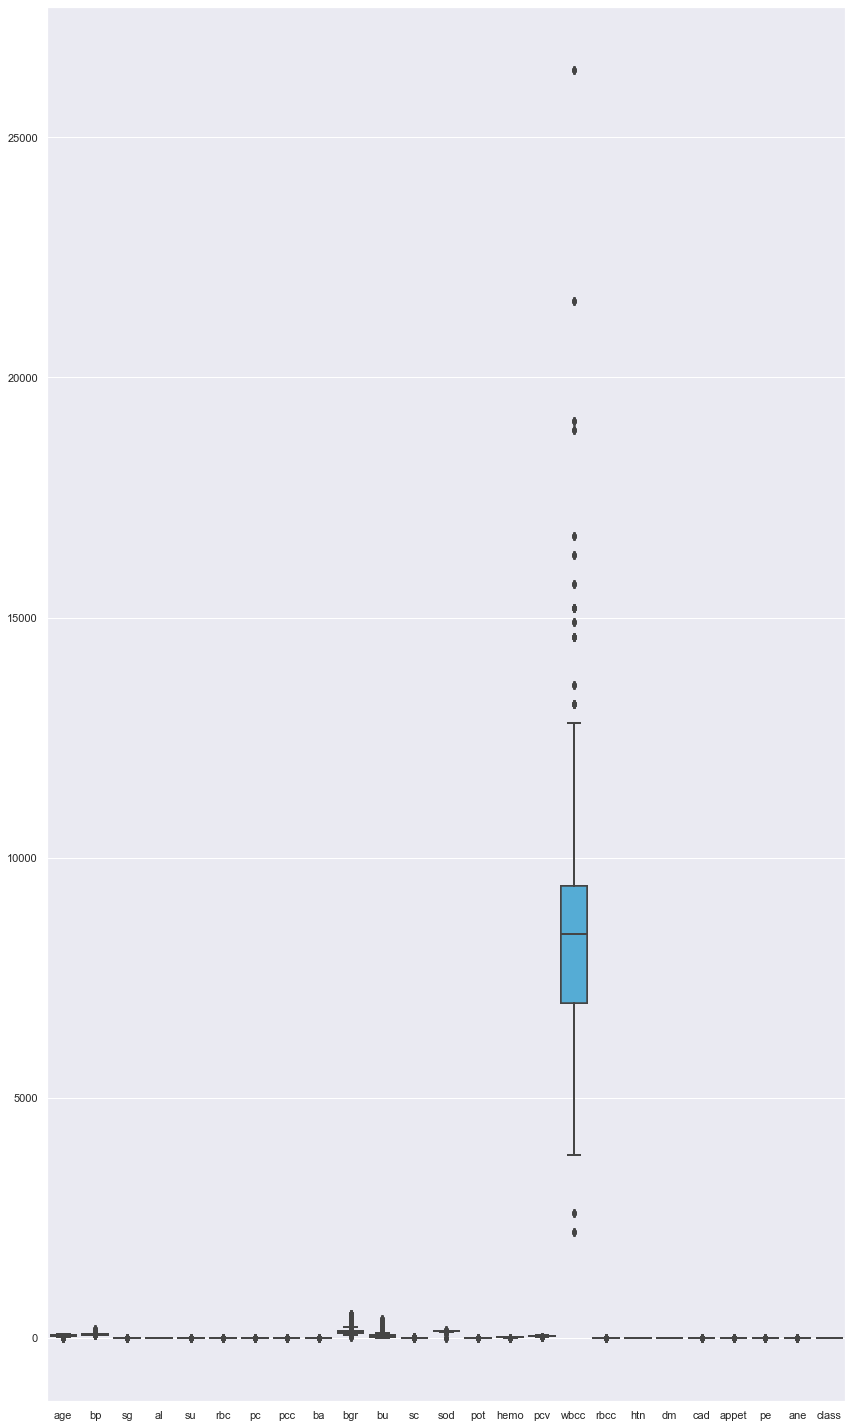

In [64]:
cols = 3
rows = 5
fig = plt.figure( figsize=(cols*4, rows*4))
for i in num_features:
    
    sns.boxplot(data=df1)
    
fig.tight_layout()  
plt.show()

In [65]:
num_features

['age',
 'bp',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wbcc',
 'rbcc']

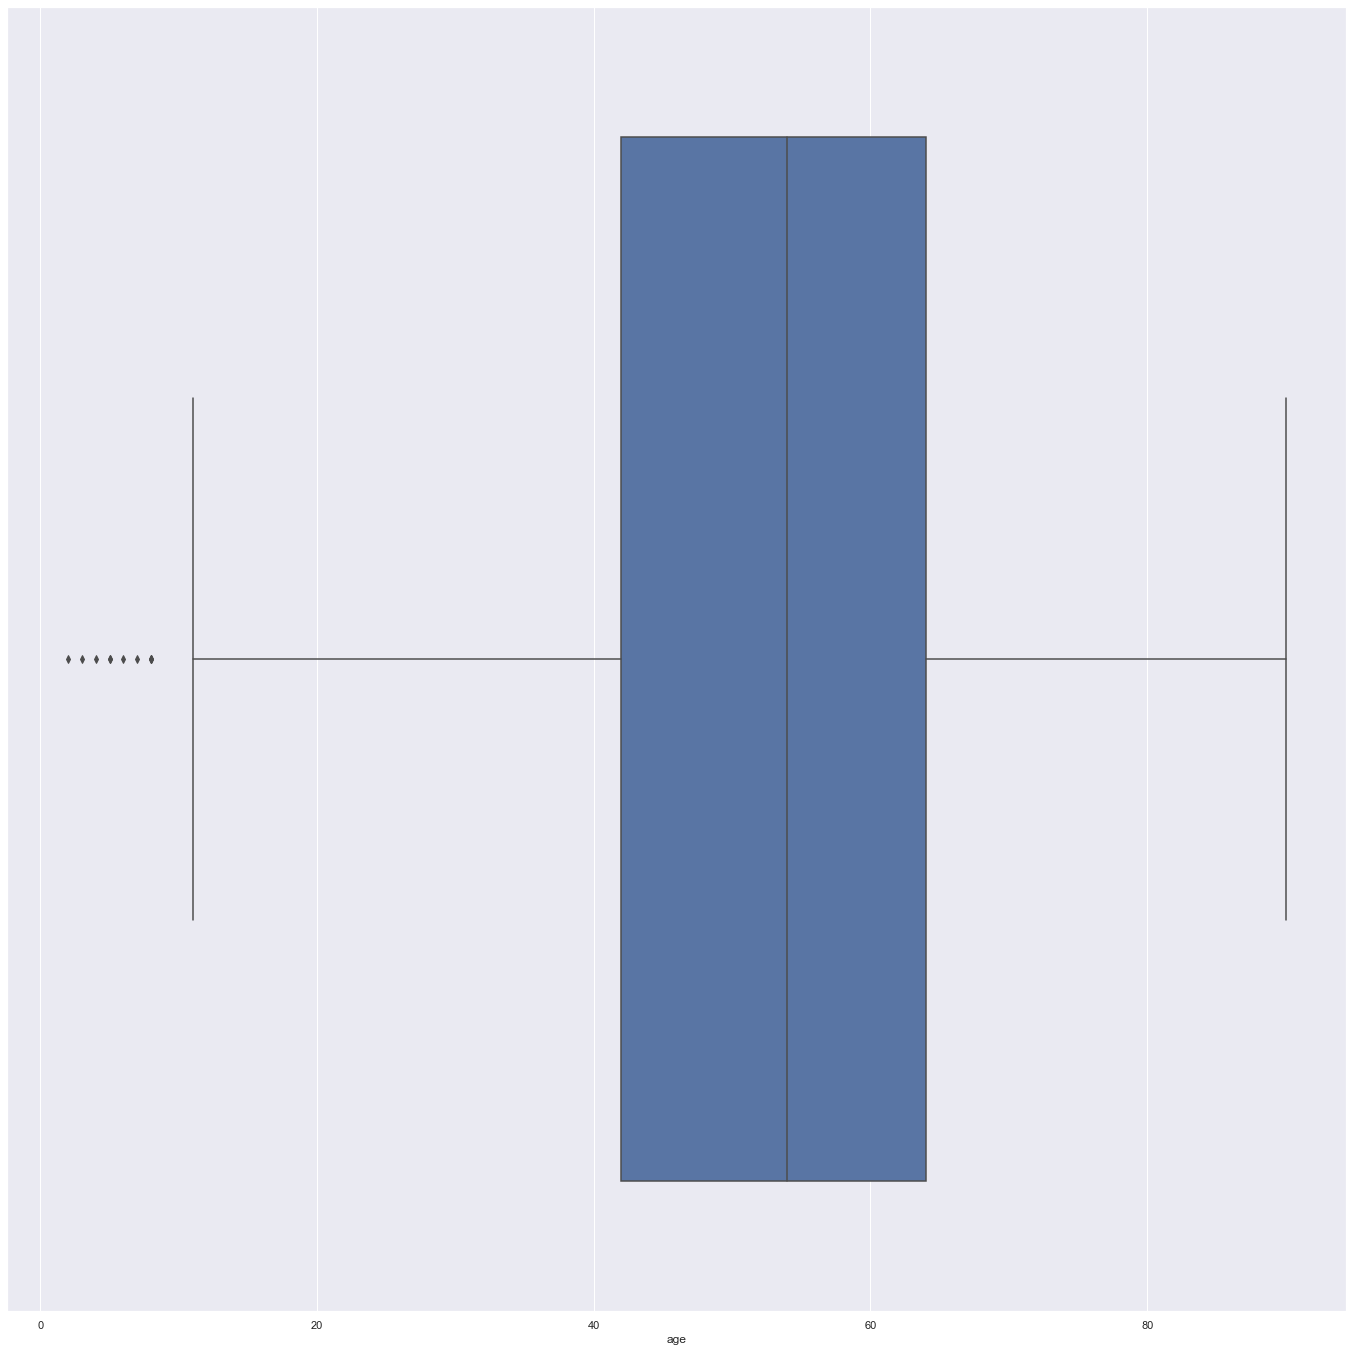

In [66]:
##detect outliers
sns.boxplot(x=df1['age'])
plt.show()

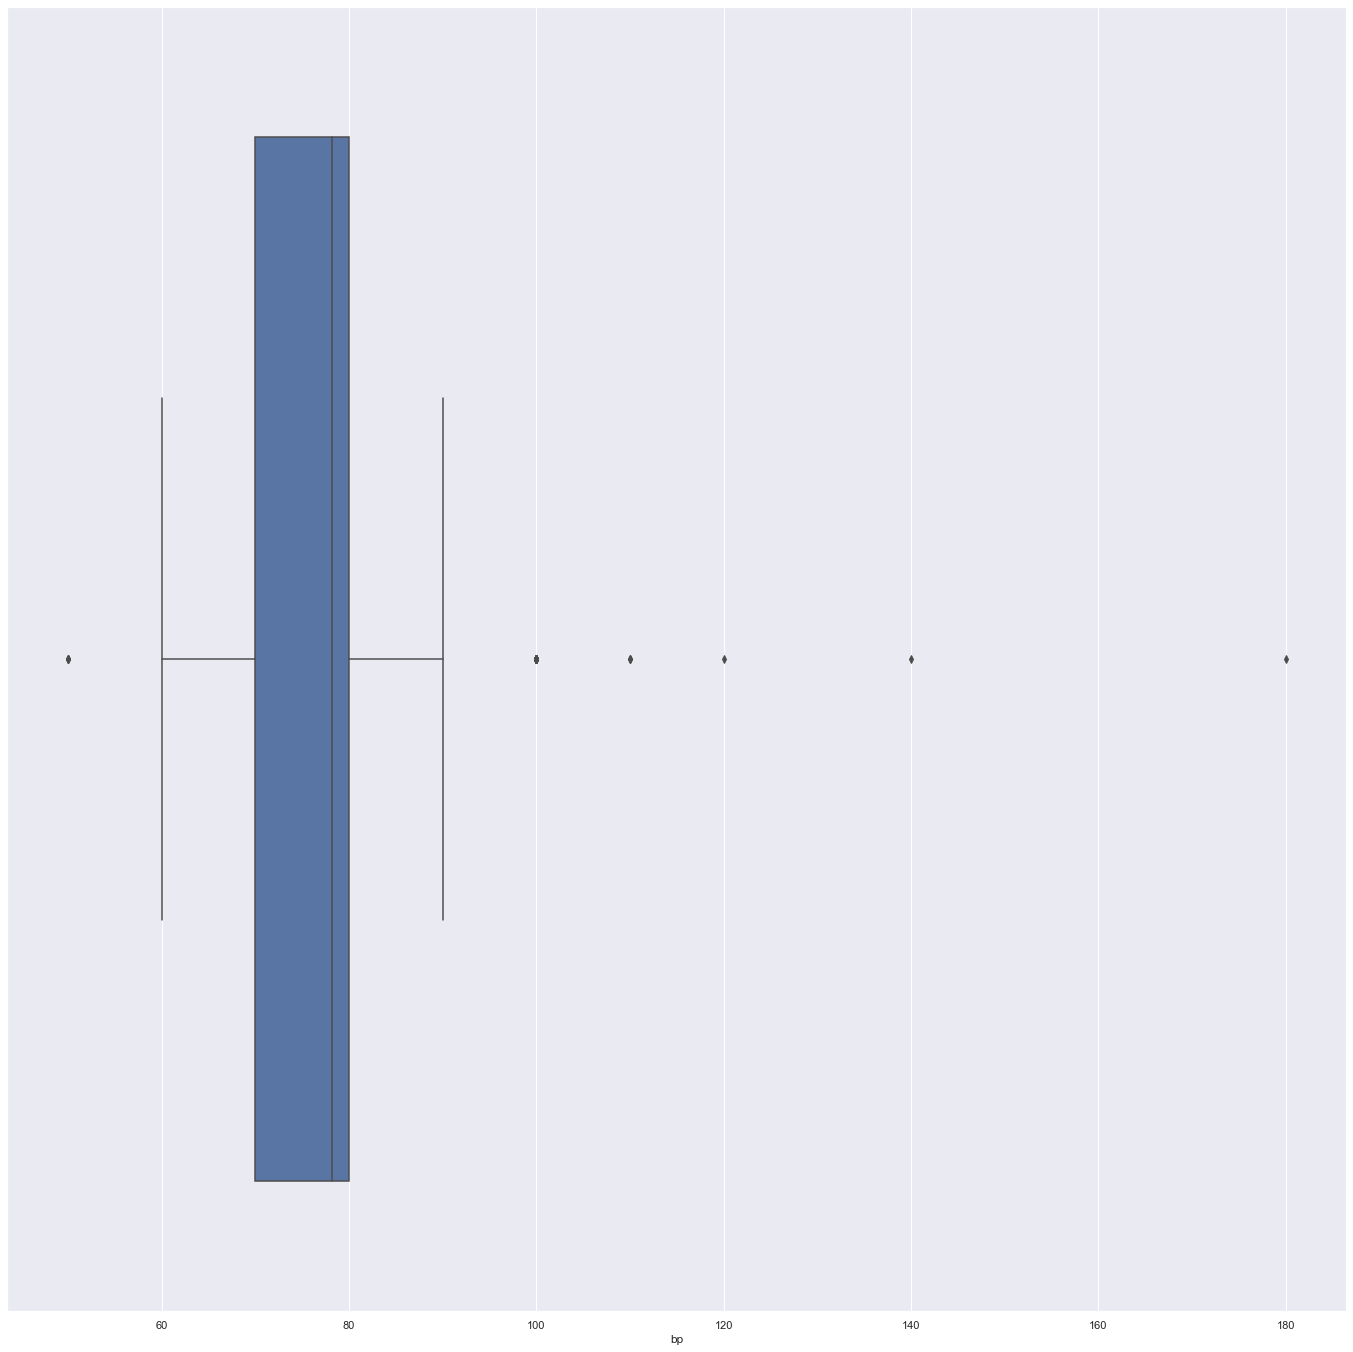

In [67]:
##detect outliers
sns.boxplot(x=df1['bp'])
plt.show()

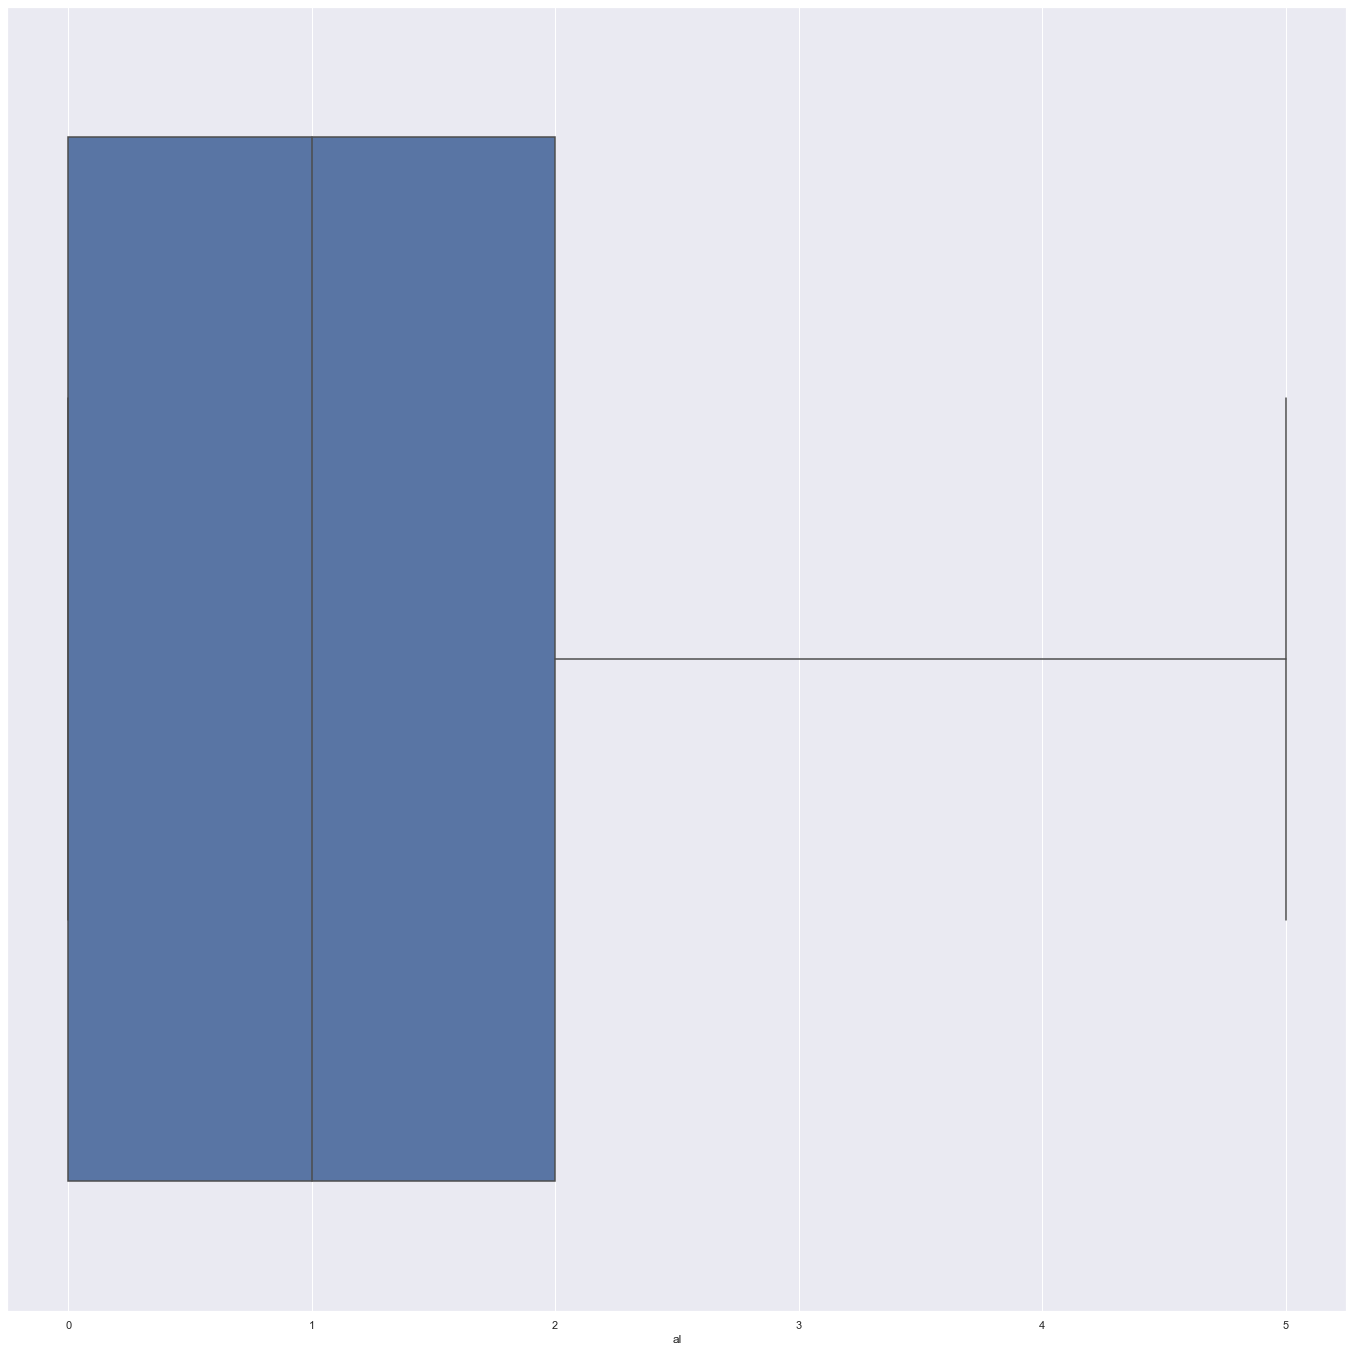

In [68]:
##detect outliers
sns.boxplot(x=df1['al'])
plt.show()

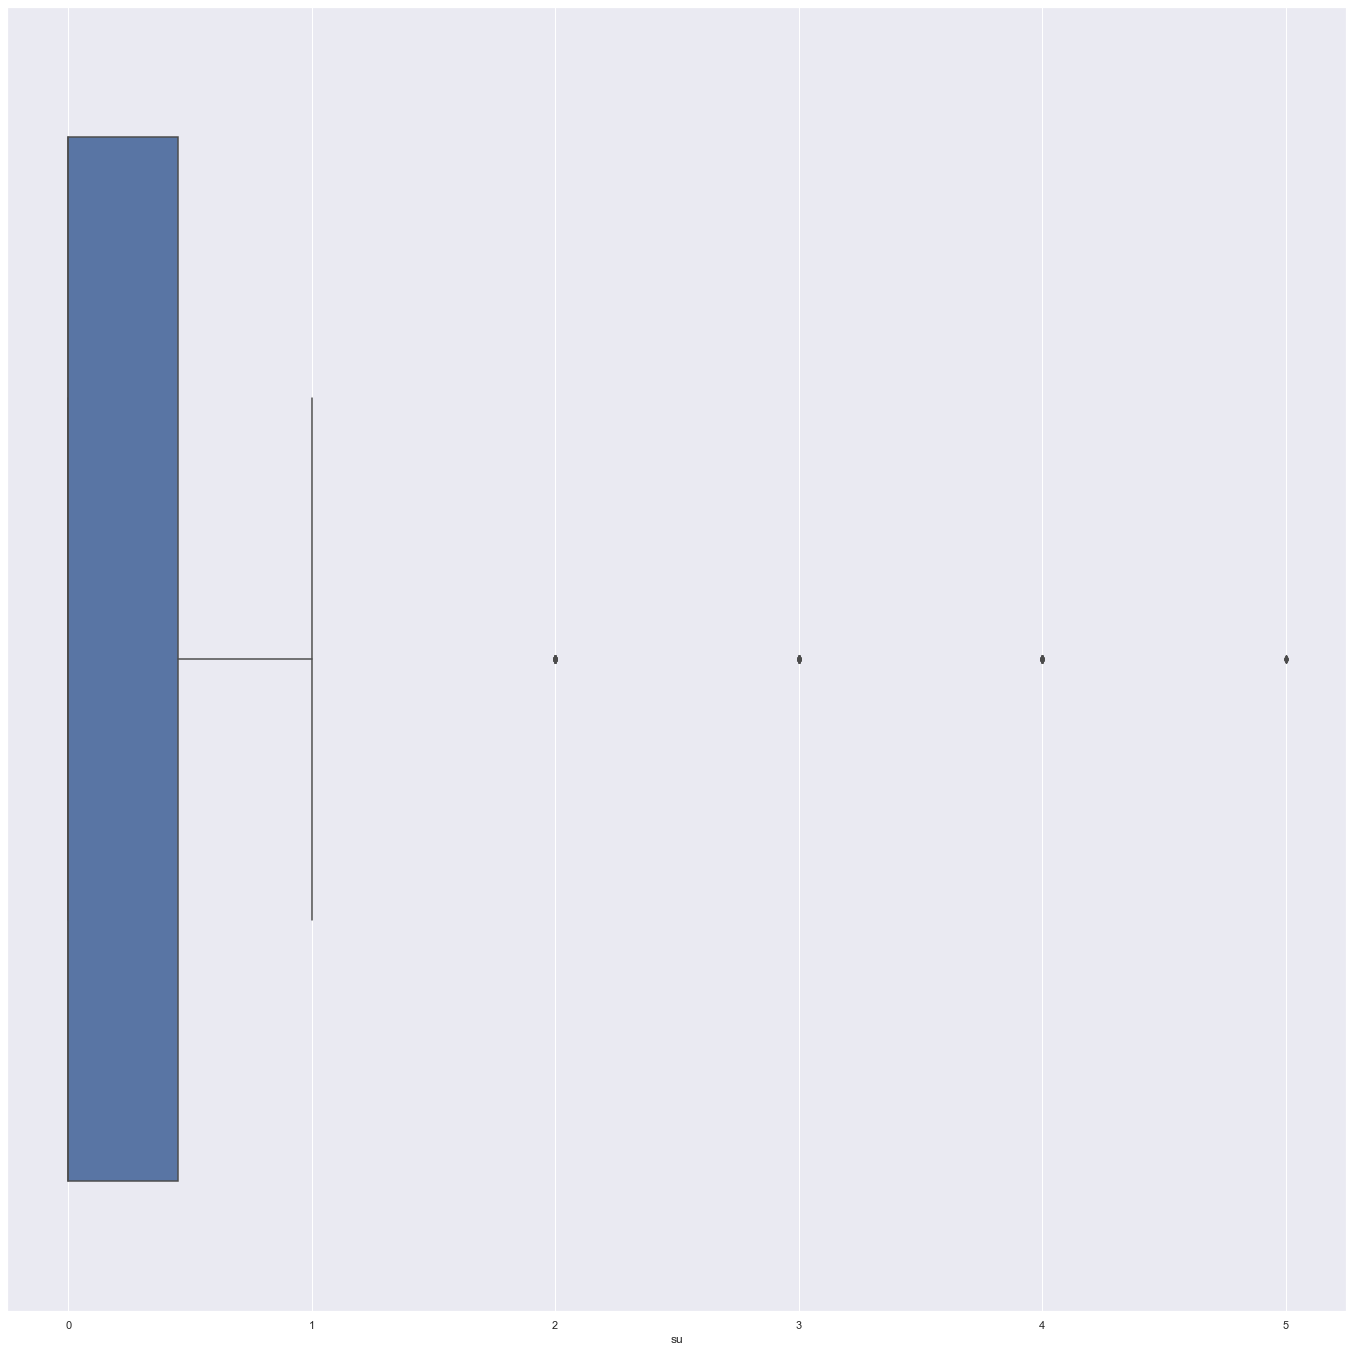

In [69]:
##detect outliers
sns.boxplot(x=df1['su'])
plt.show()

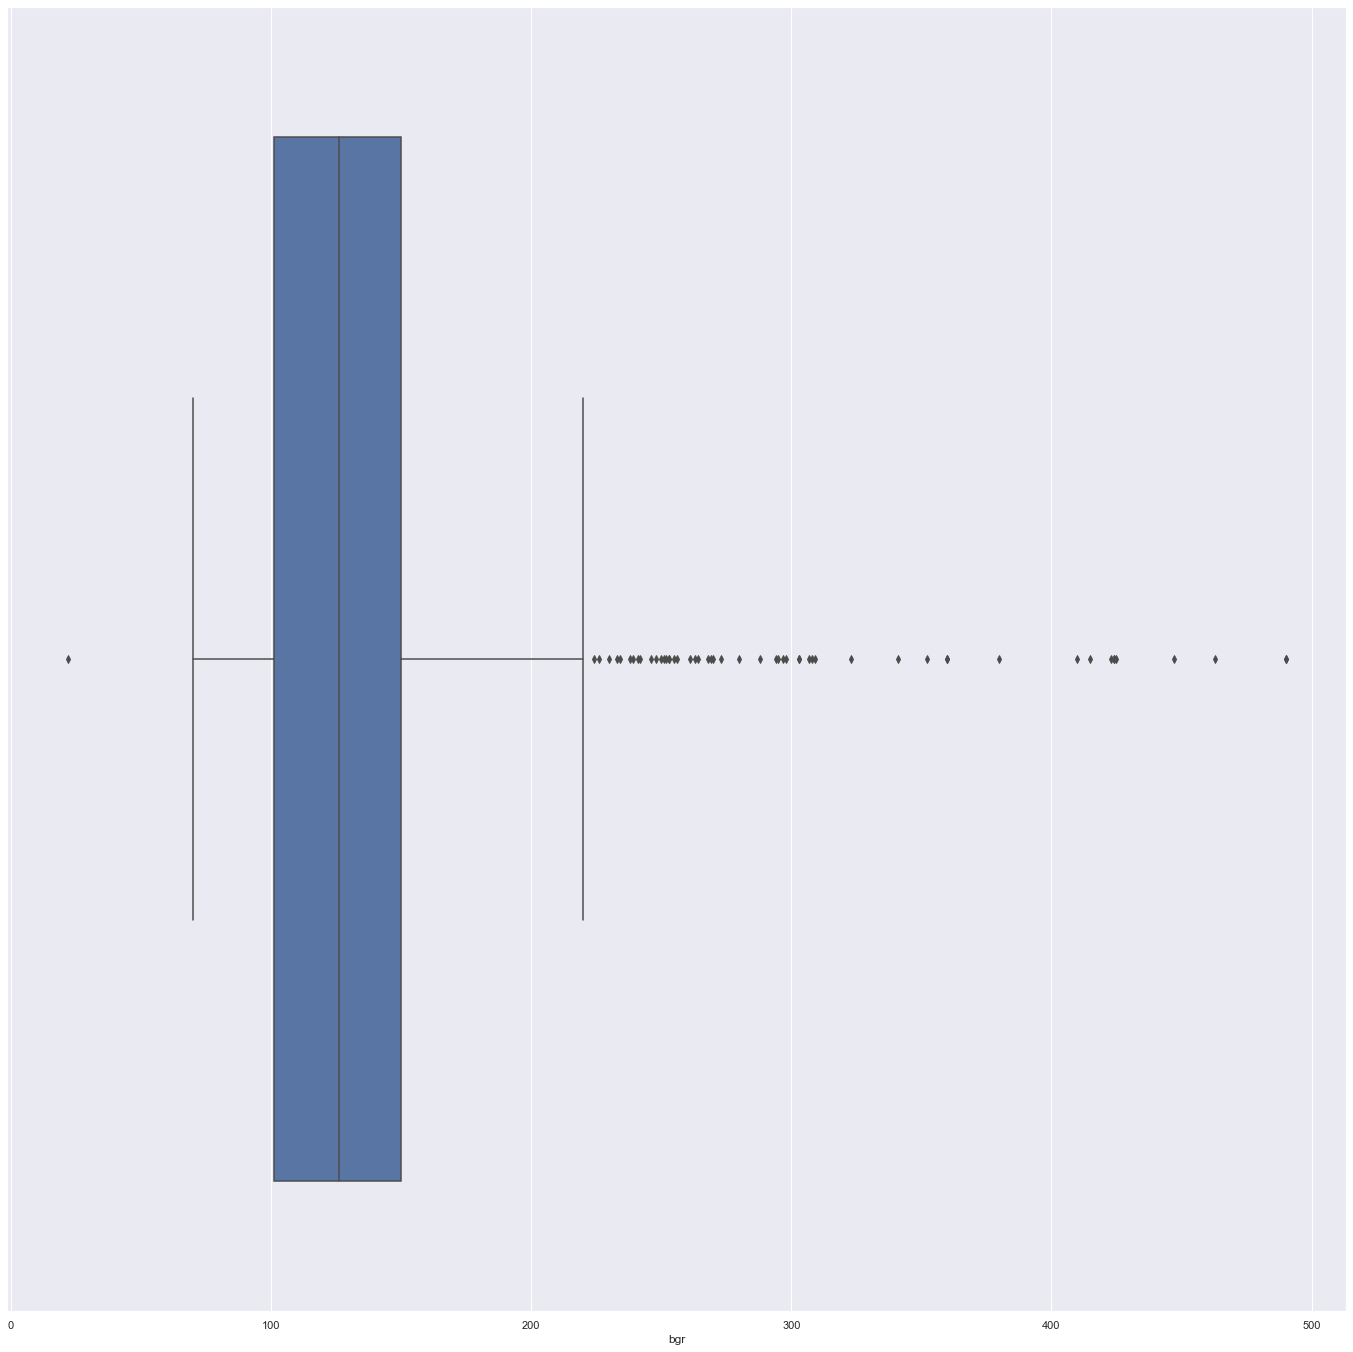

In [70]:
##detect outliers
sns.boxplot(x=df1['bgr'])
plt.show()

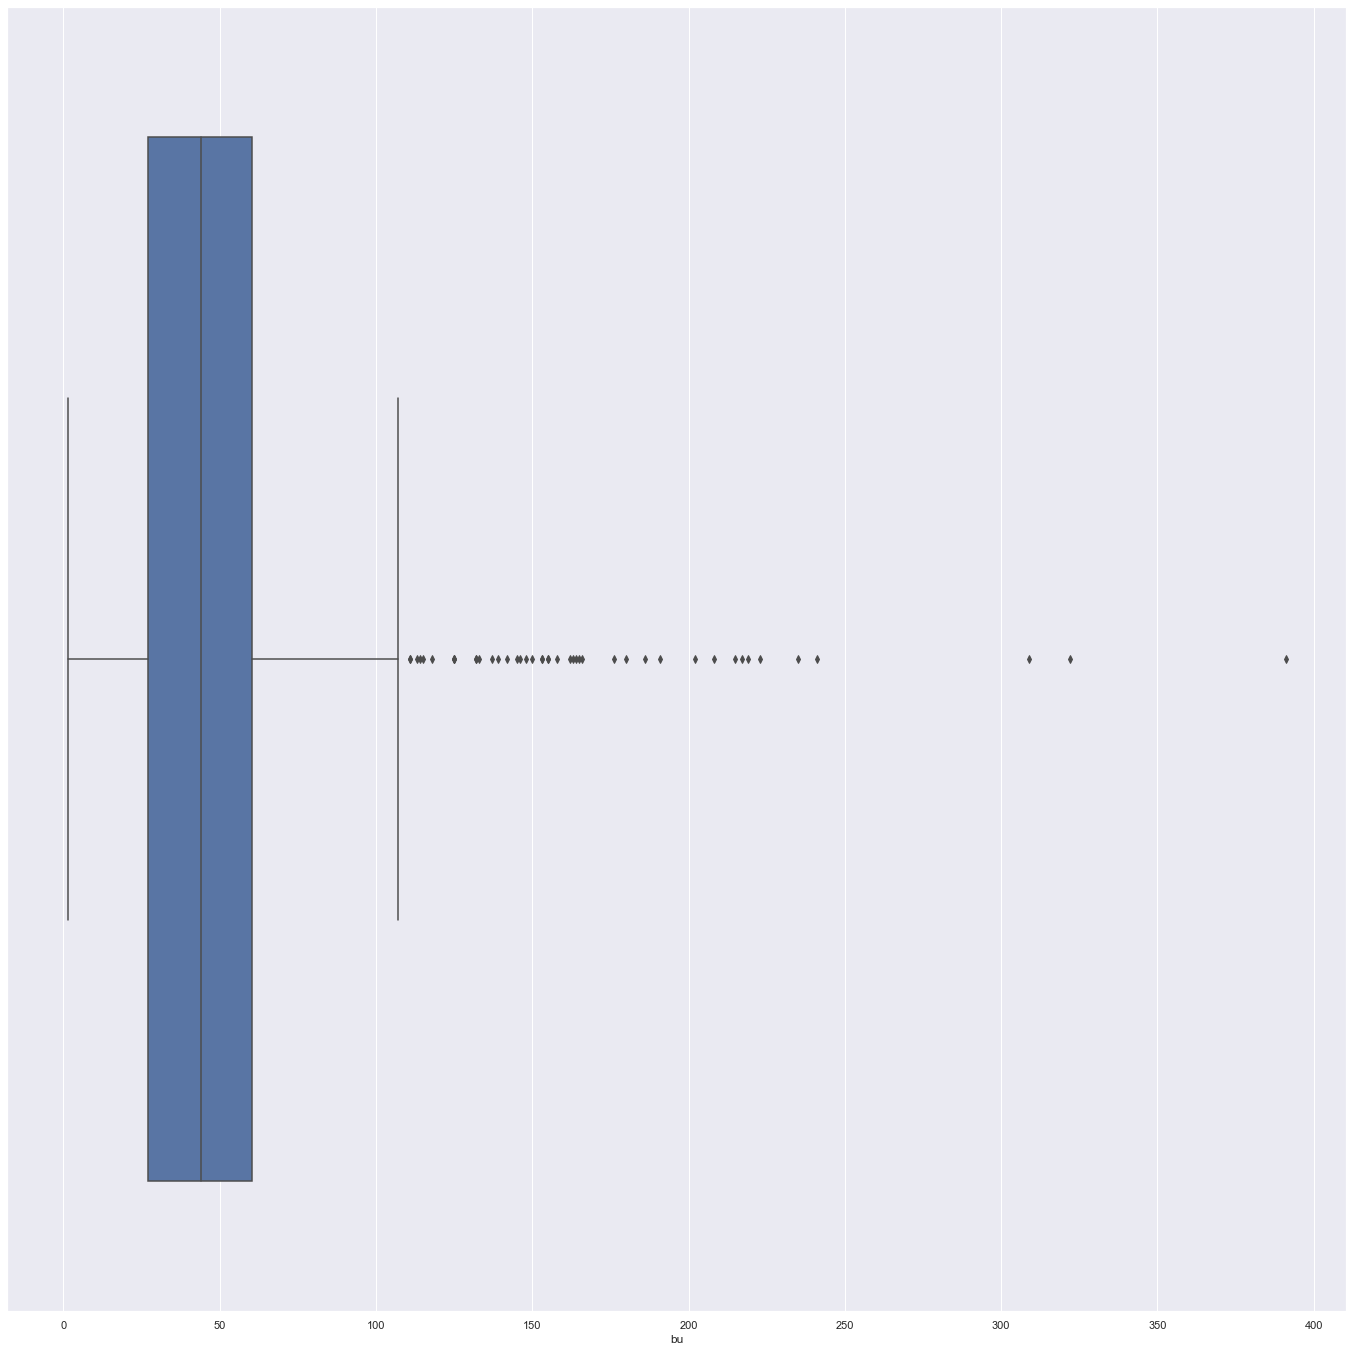

In [71]:
##detect outliers
sns.boxplot(x=df1['bu'])
plt.show()

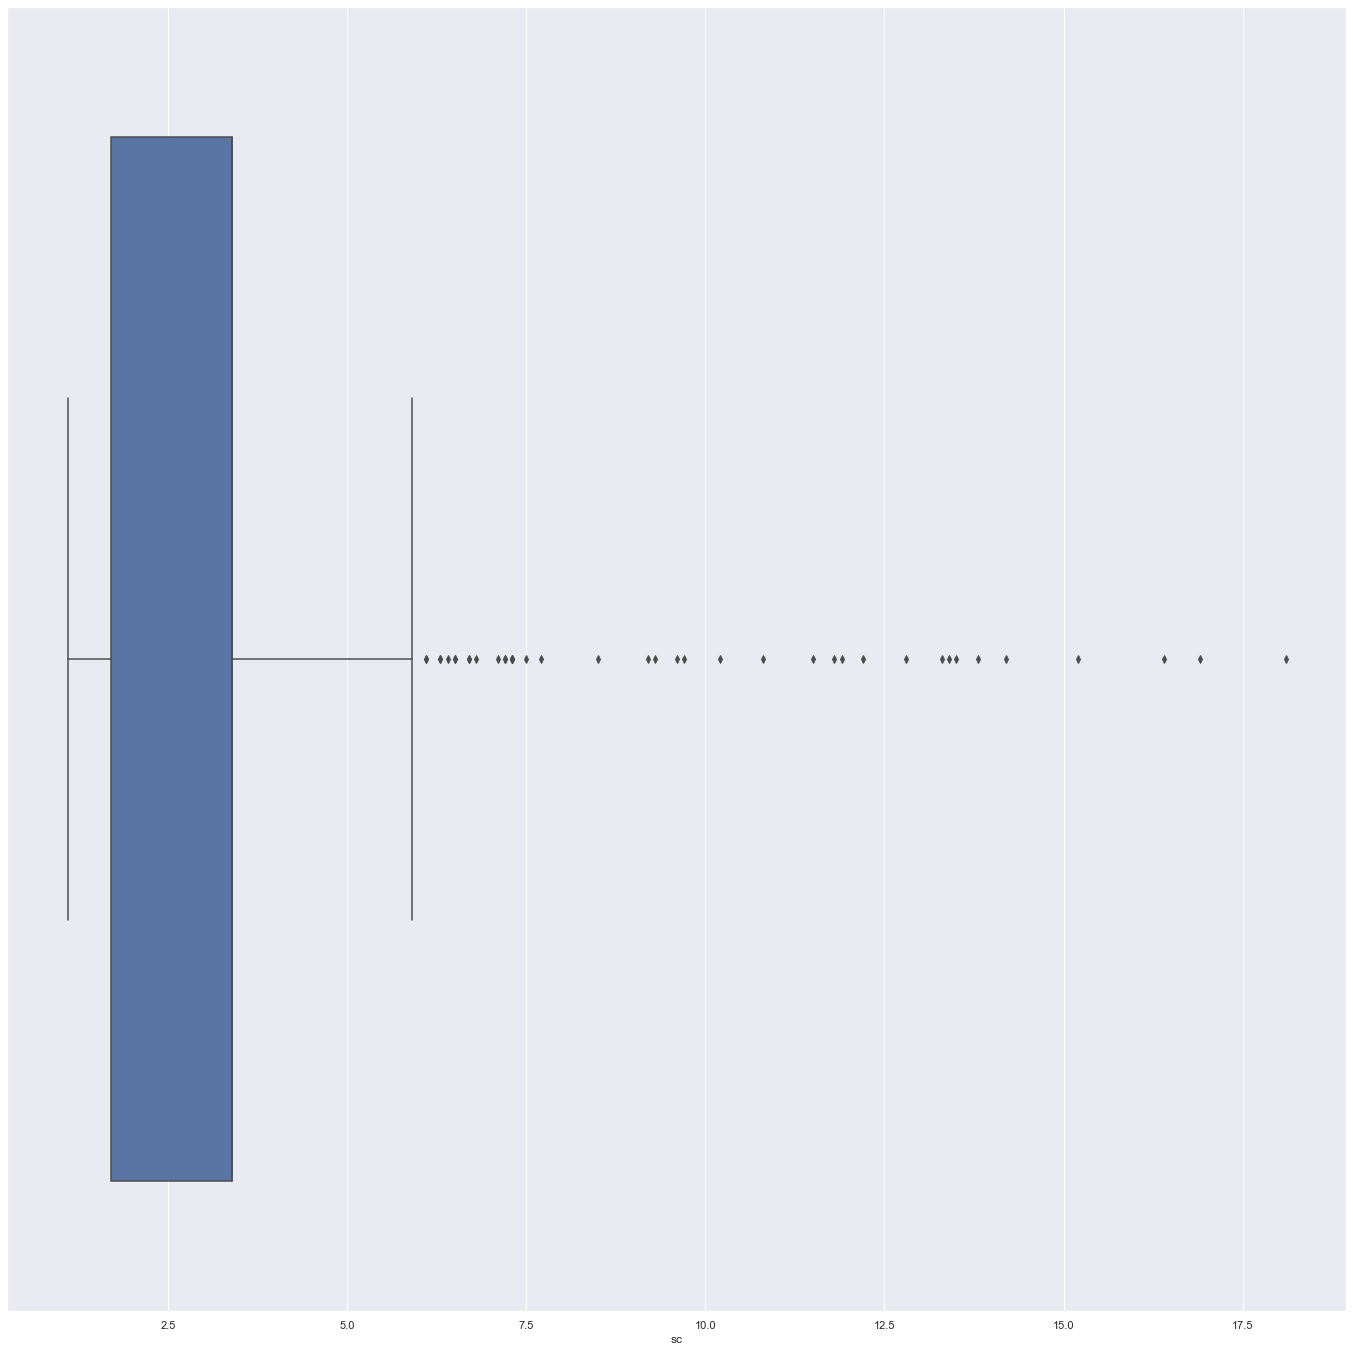

In [72]:
##detect outliers
sns.boxplot(x=df1['sc'])
plt.show()

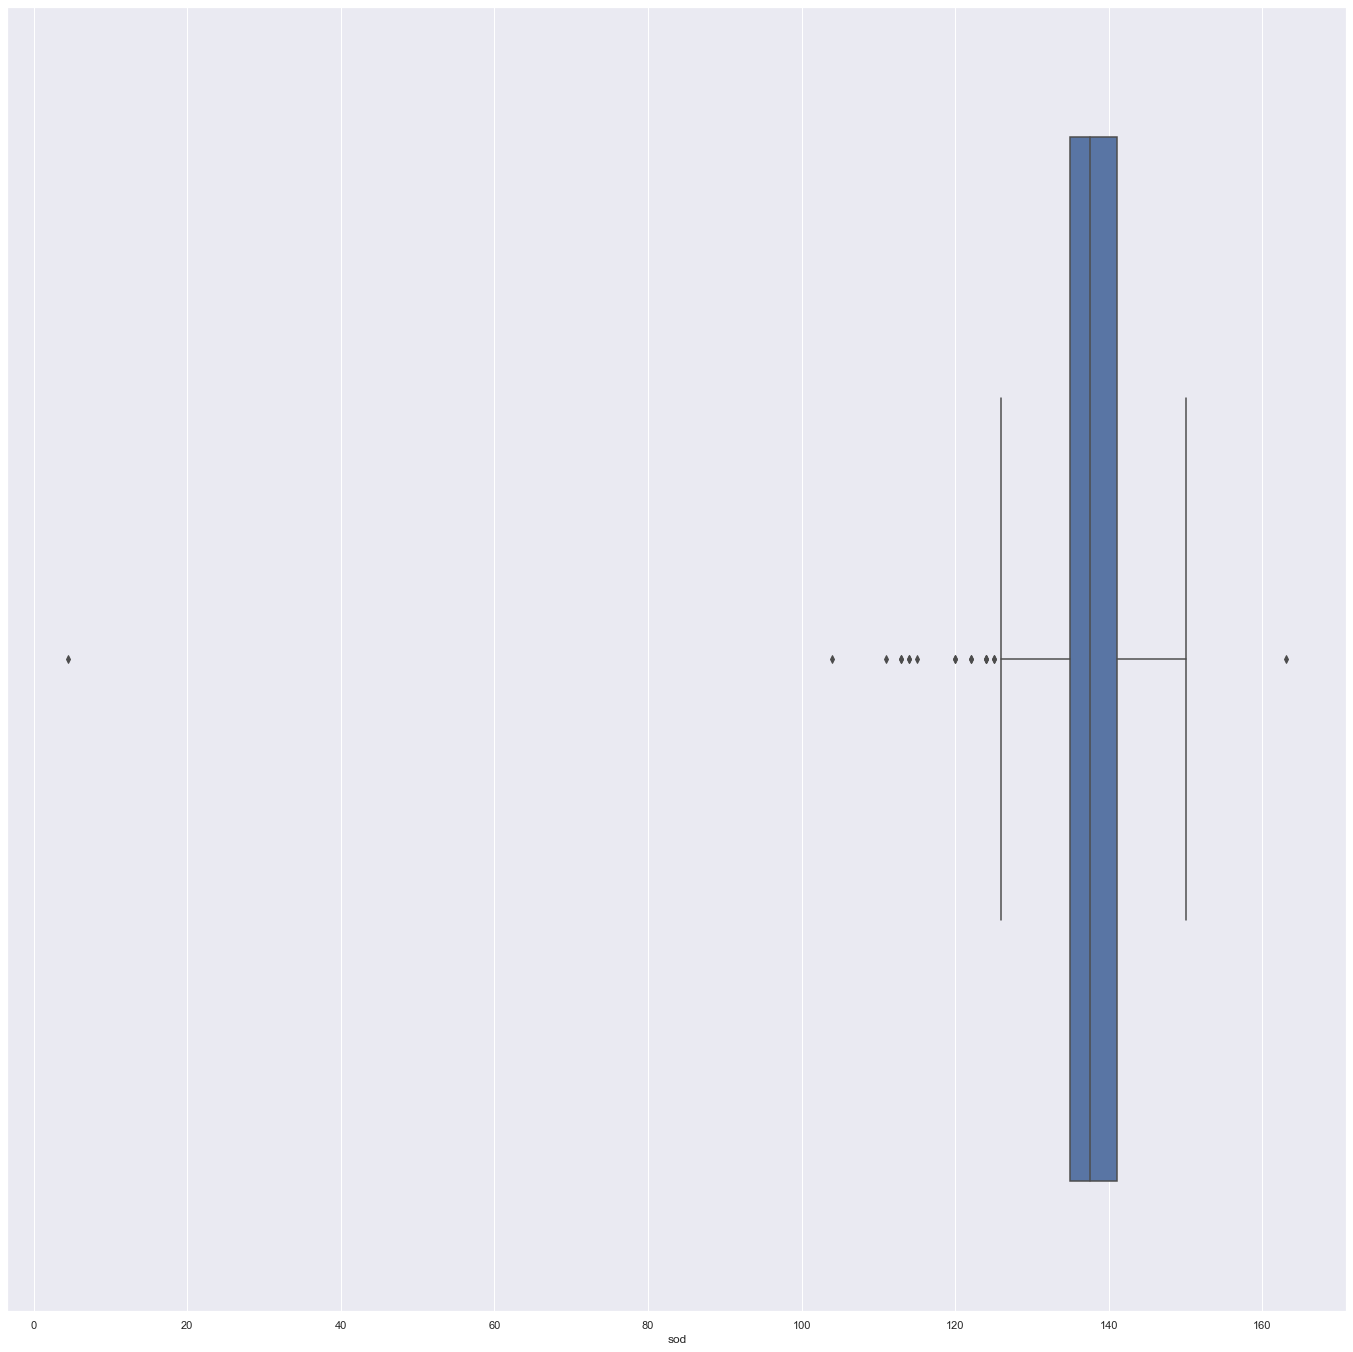

In [73]:
##detect outliers
sns.boxplot(x=df1['sod'])
plt.show()

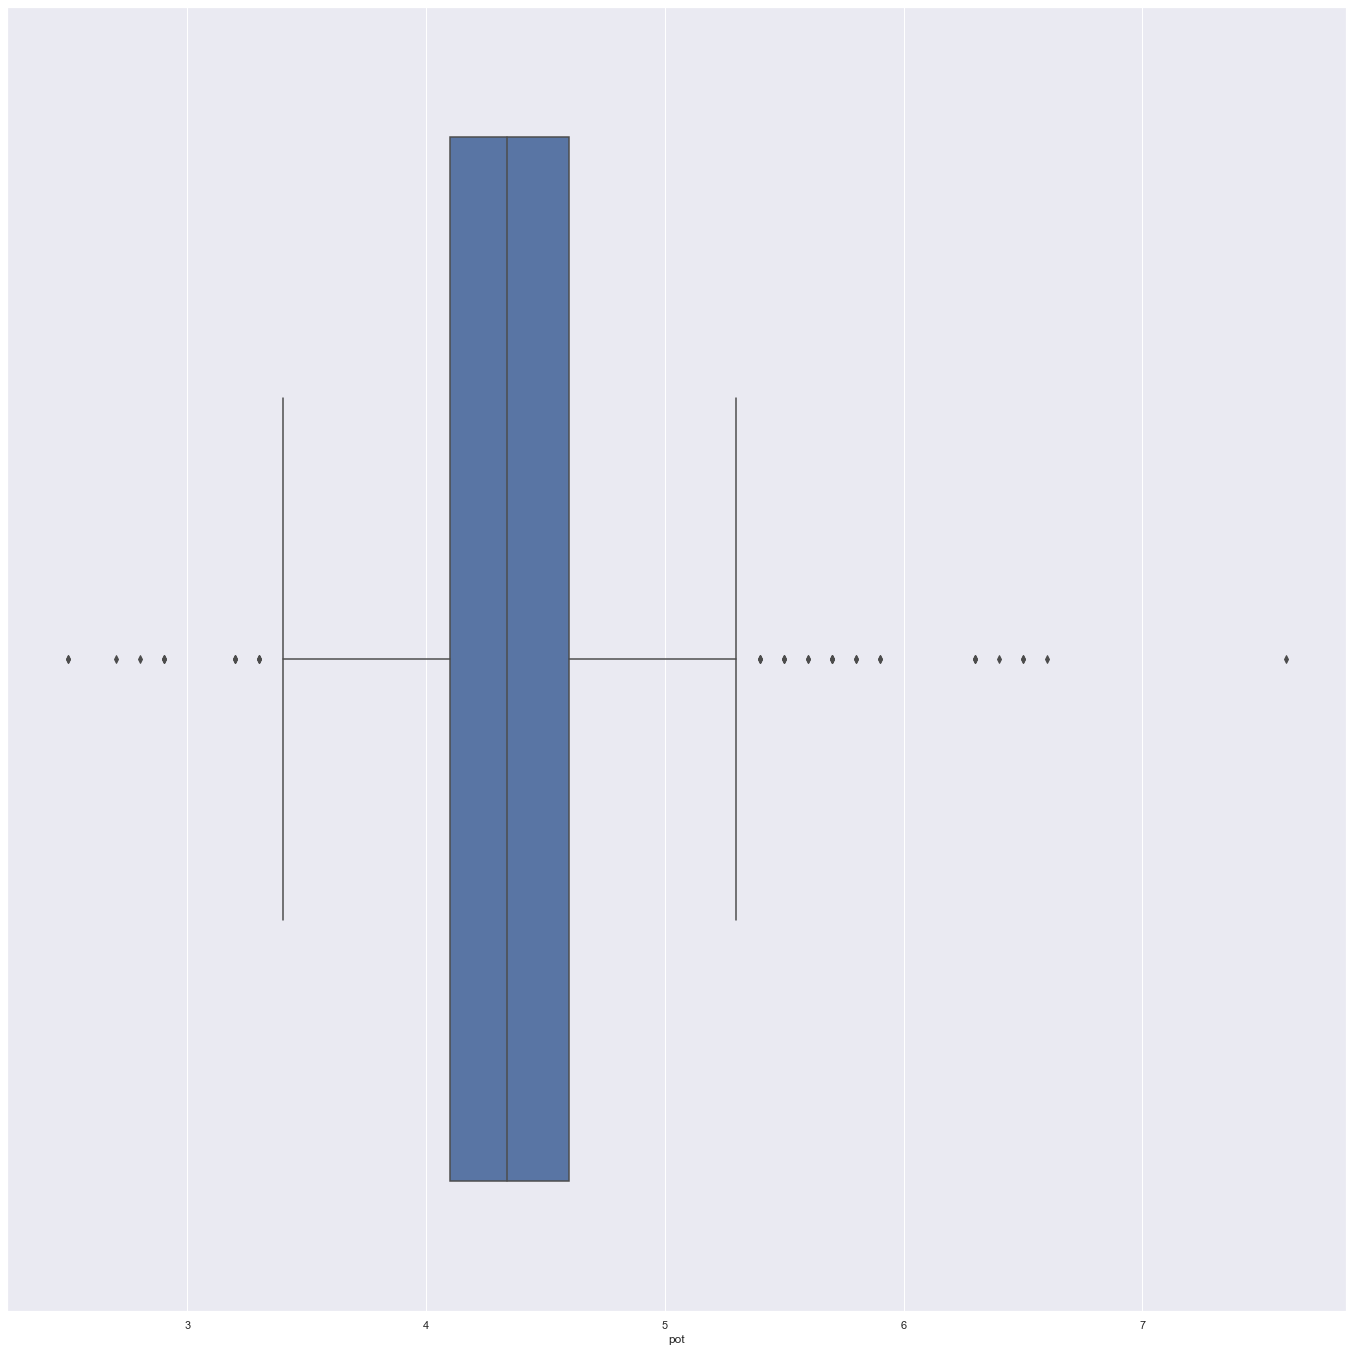

In [74]:
##detect outliers
sns.boxplot(x=df1['pot'])
plt.show()

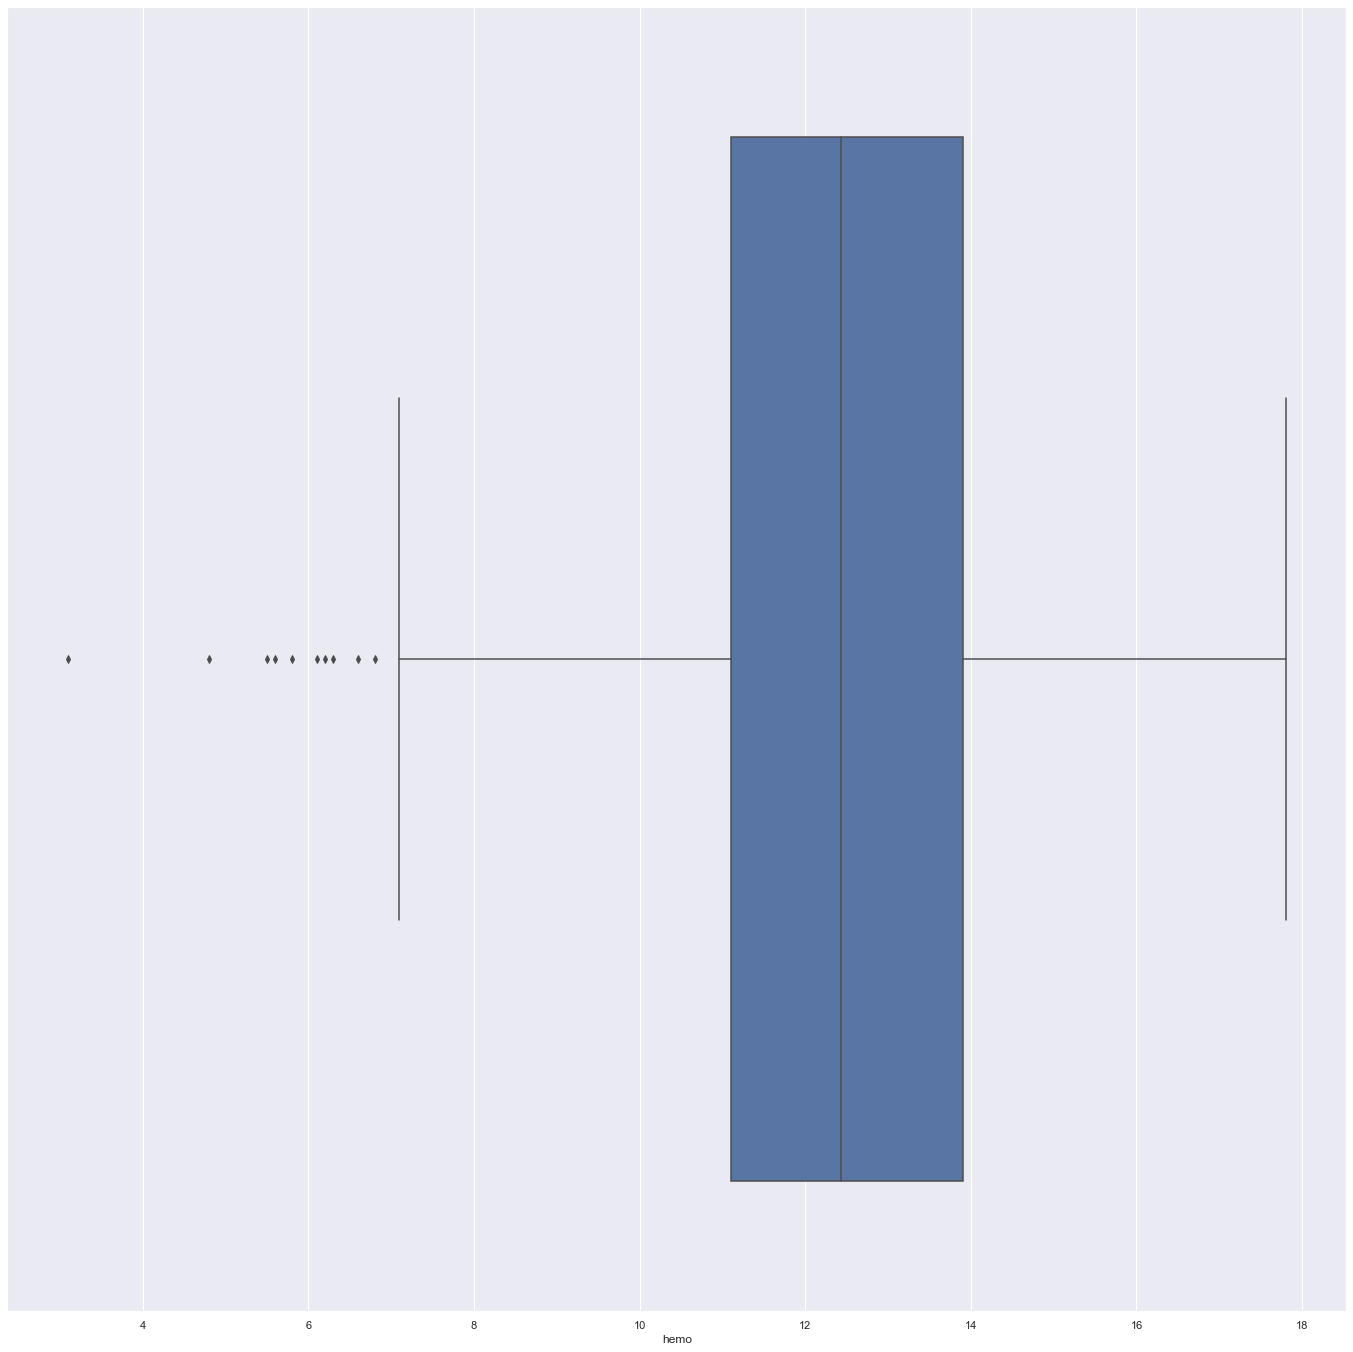

In [75]:
##detect outliers
sns.boxplot(x=df1['hemo'])
plt.show()

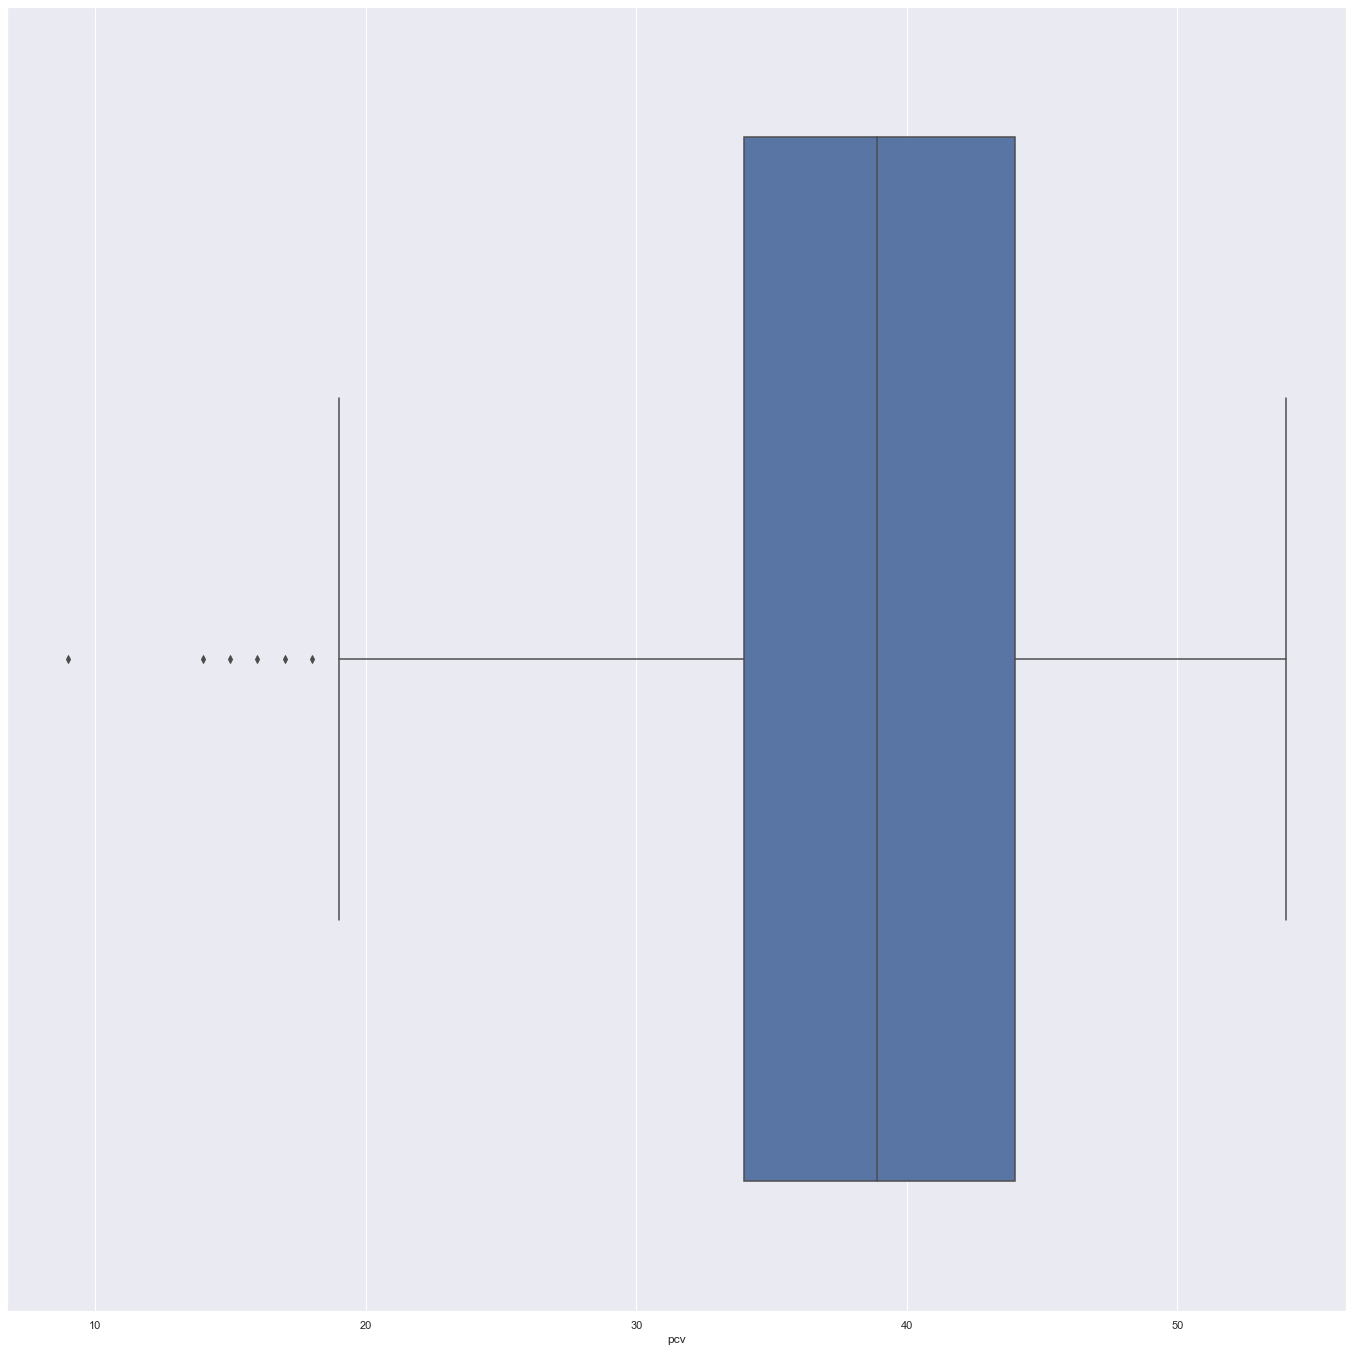

In [76]:
##detect outliers
sns.boxplot(x=df1['pcv'])
plt.show()

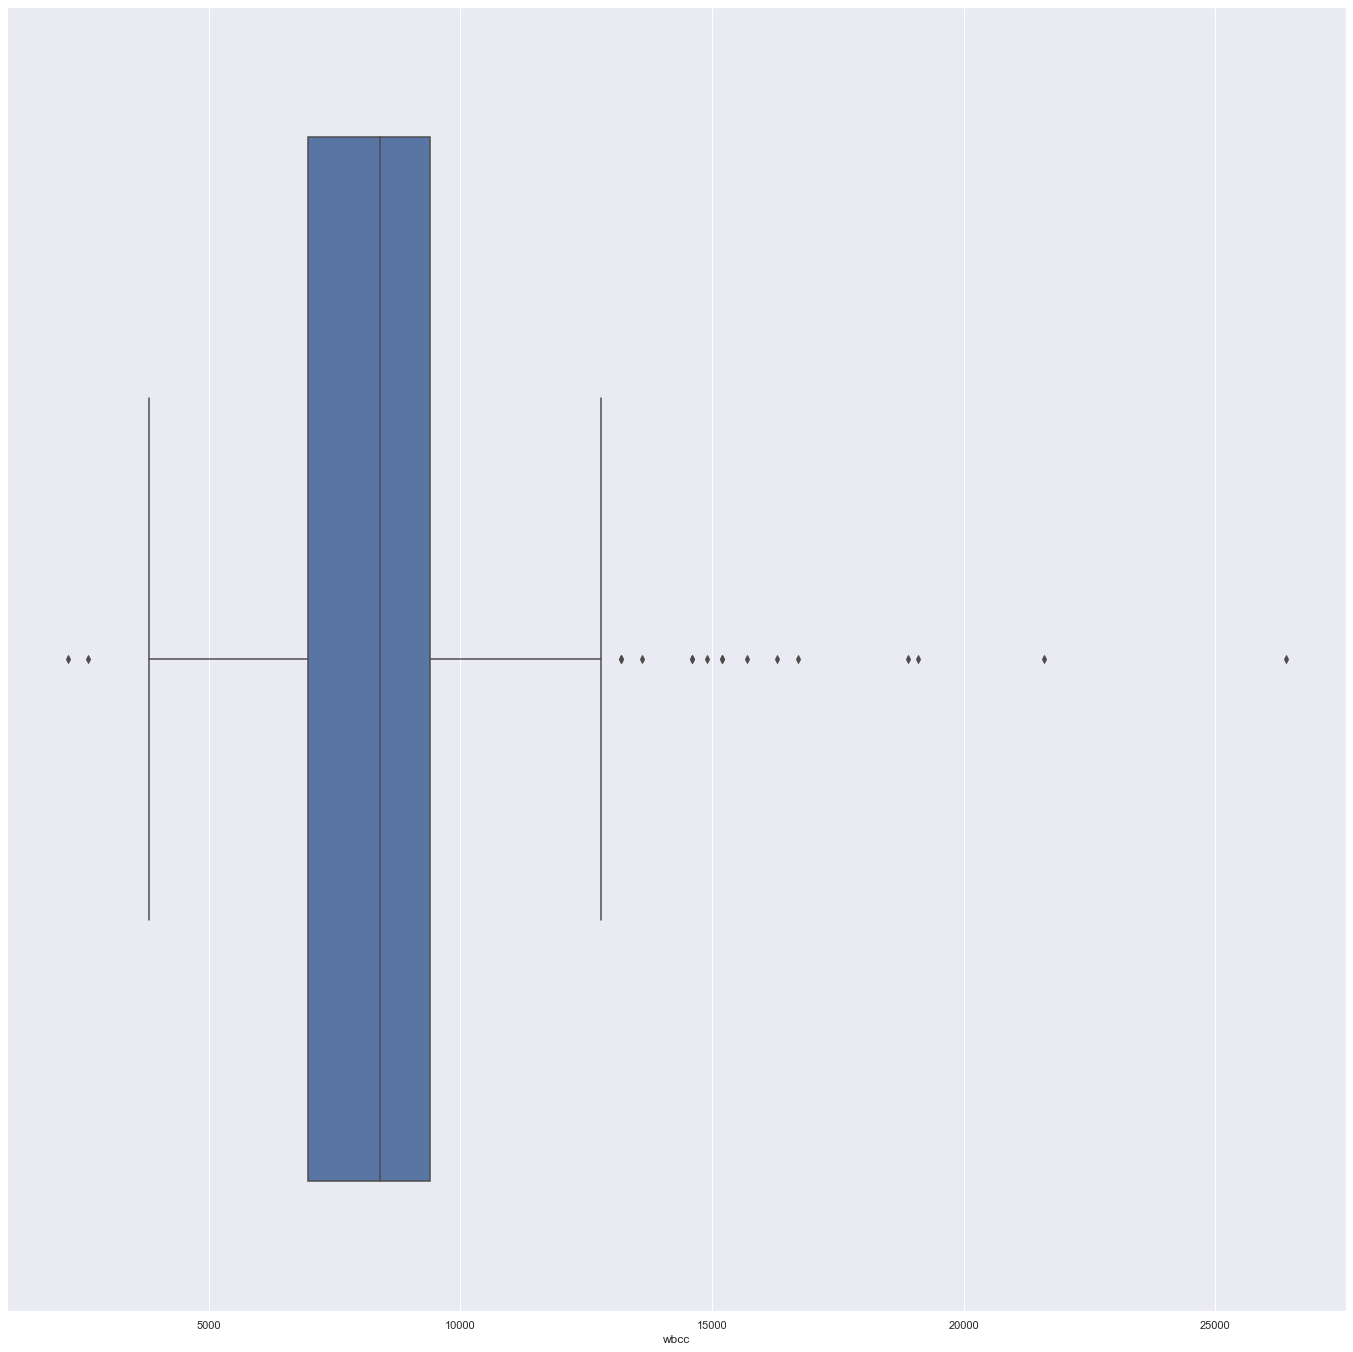

In [77]:
##detect outliers
sns.boxplot(x=df1['wbcc'])
plt.show()

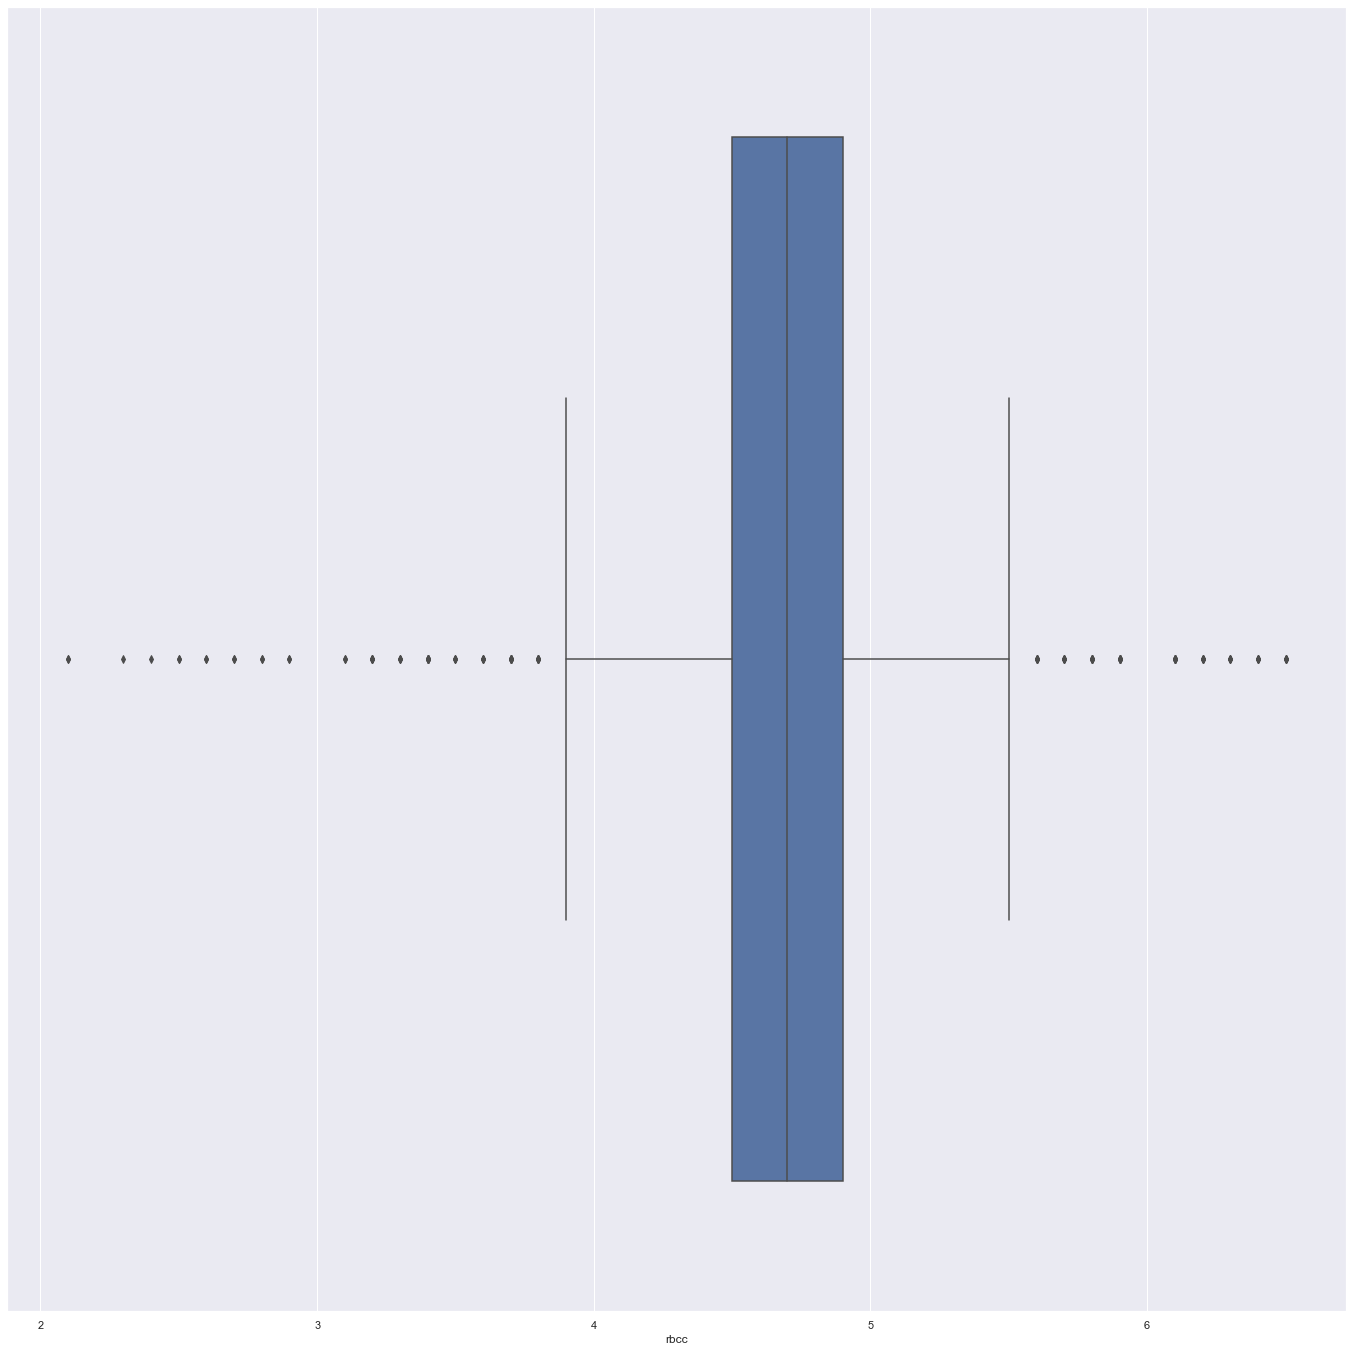

In [78]:
##detect outliers
sns.boxplot(x=df1['rbcc'])
plt.show()

from the plots, we can observe that there are outliers such as : 
age, bp, su, rbcc, bgr, bu, sc, sod, pot, hemo, wbcc.
These features have aberrant values that we will treat with Quartile method

In [79]:
df2=df1.copy()

In [80]:
##IQR pc feature 
#age
q1=df2['age'].quantile(0.25)
q3=df2['age'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)
min=q1-(1.5*iqr)
max=q3+(1.5*iqr)
print(min)
print(max)
df2.loc[(df2['age']<min),'age']=min
df2.loc[(df2['age']>max),'age']=max

42.0 64.0 22.0
9.0
97.0


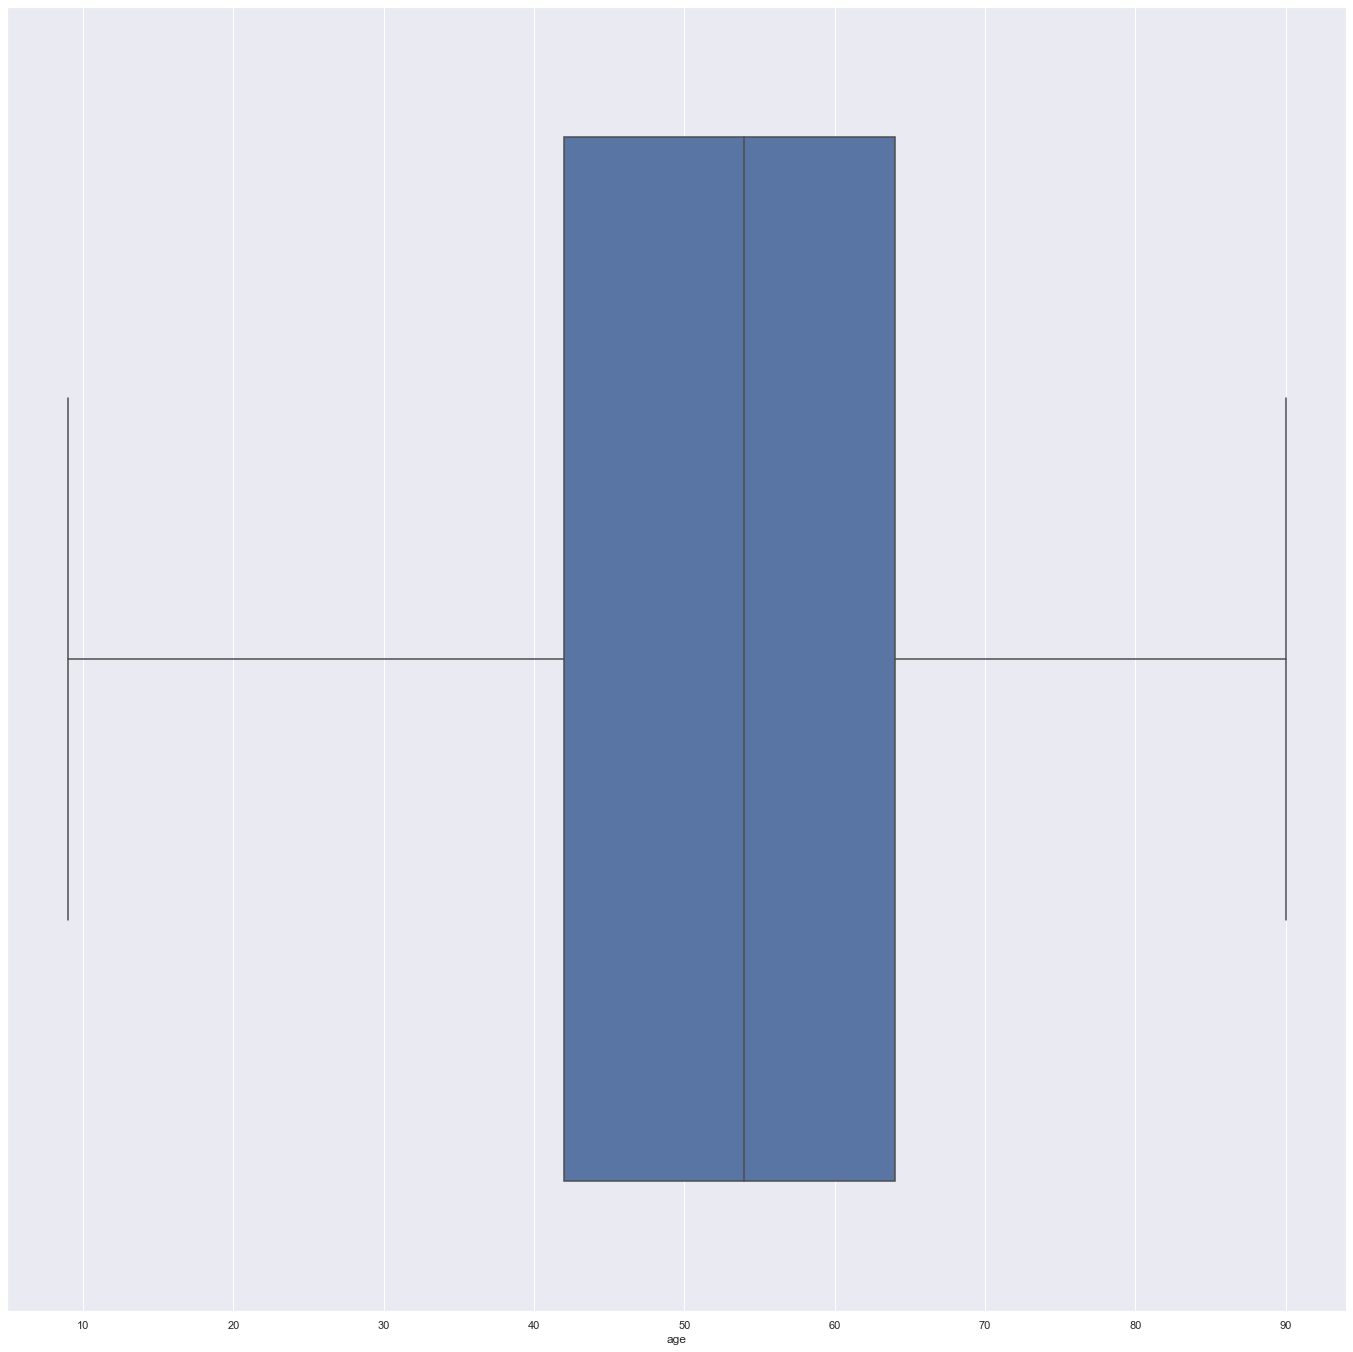

In [81]:
sns.boxplot(x=df2['age'])
plt.show()

In [82]:
##IQR pc feature 
#bp
q1=df2['bp'].quantile(0.25)
q3=df2['bp'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)
min=q1-(1.5*iqr)
max=q3+(1.5*iqr)
print(min)
print(max)
df2.loc[(df2['bp']<min),'bp']=min
df2.loc[(df2['bp']>max),'bp']=max

70.0 80.0 10.0
55.0
95.0


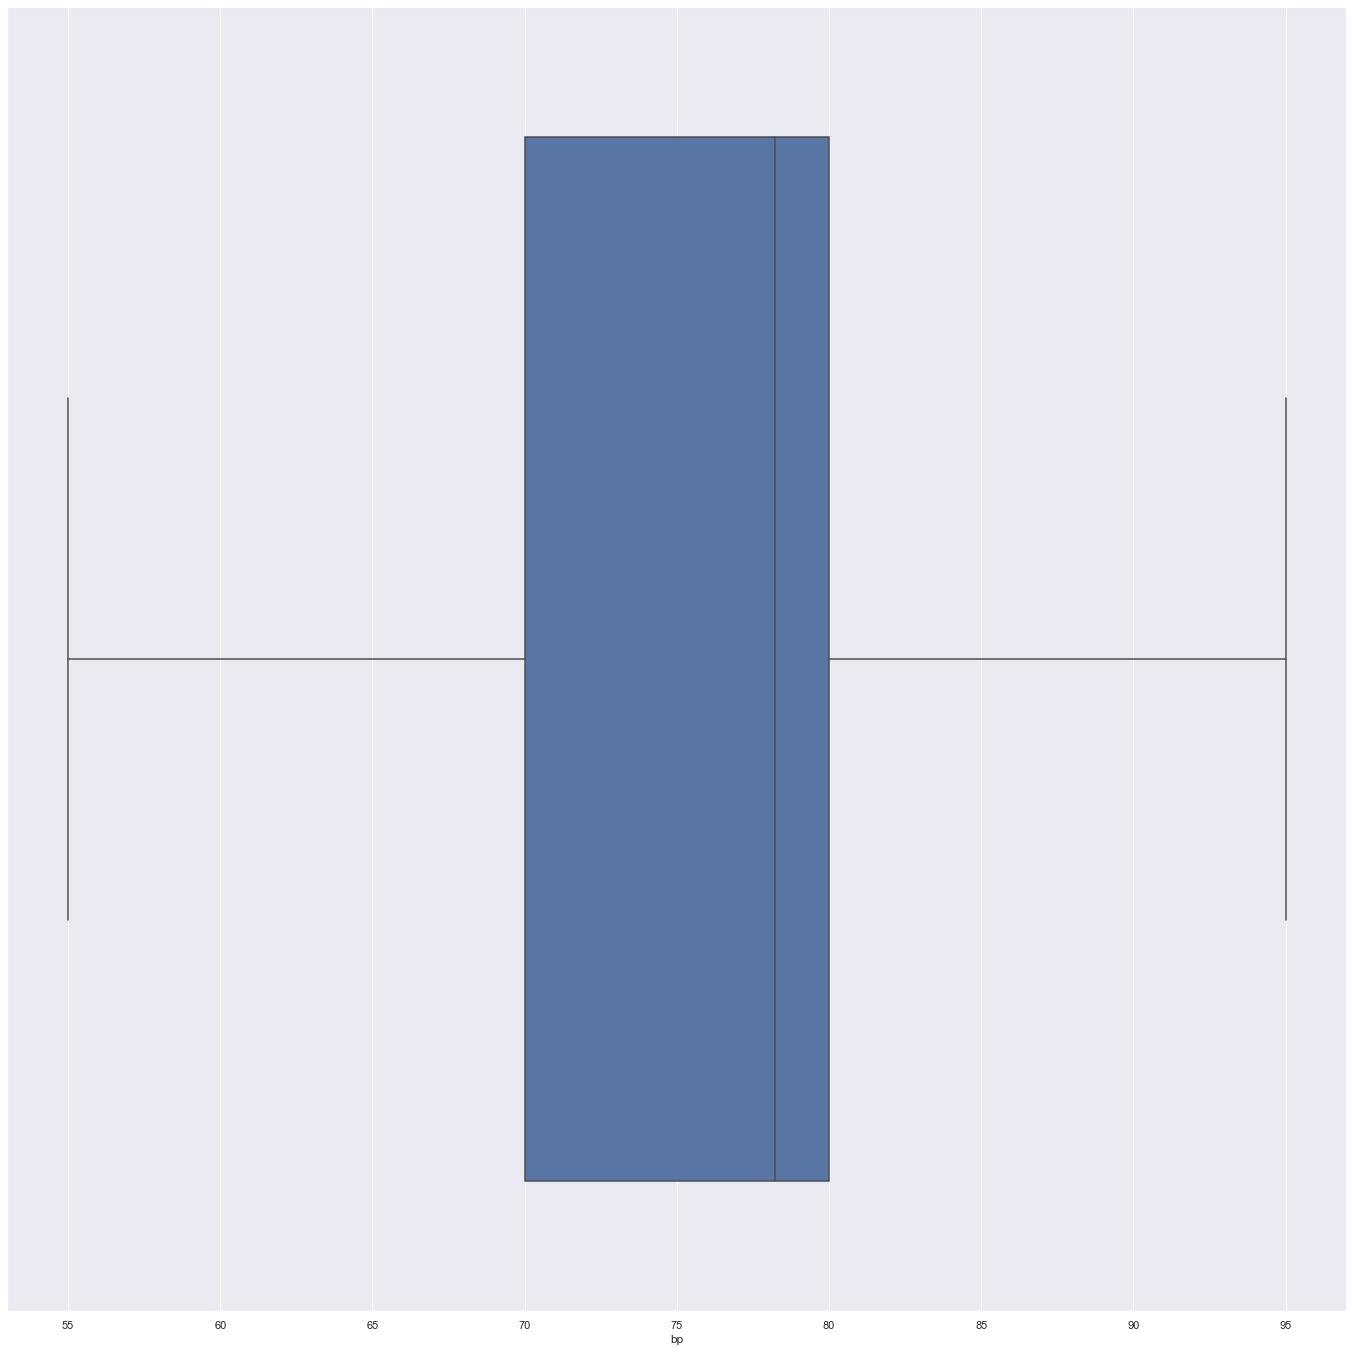

In [83]:
##detect outliers

sns.boxplot(x=df2['bp'])
plt.show()

In [84]:
##IQR pc feature 
#su
q1=df2['su'].quantile(0.25)
q3=df2['su'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)
min=q1-(1.5*iqr)
max=q3+(1.5*iqr)
print(min)
print(max)
df2.loc[(df2['su']<min),'su']=min
df2.loc[(df2['su']>max),'su']=max

0.0 0.45014245014245013 0.45014245014245013
-0.6752136752136753
1.1253561253561255


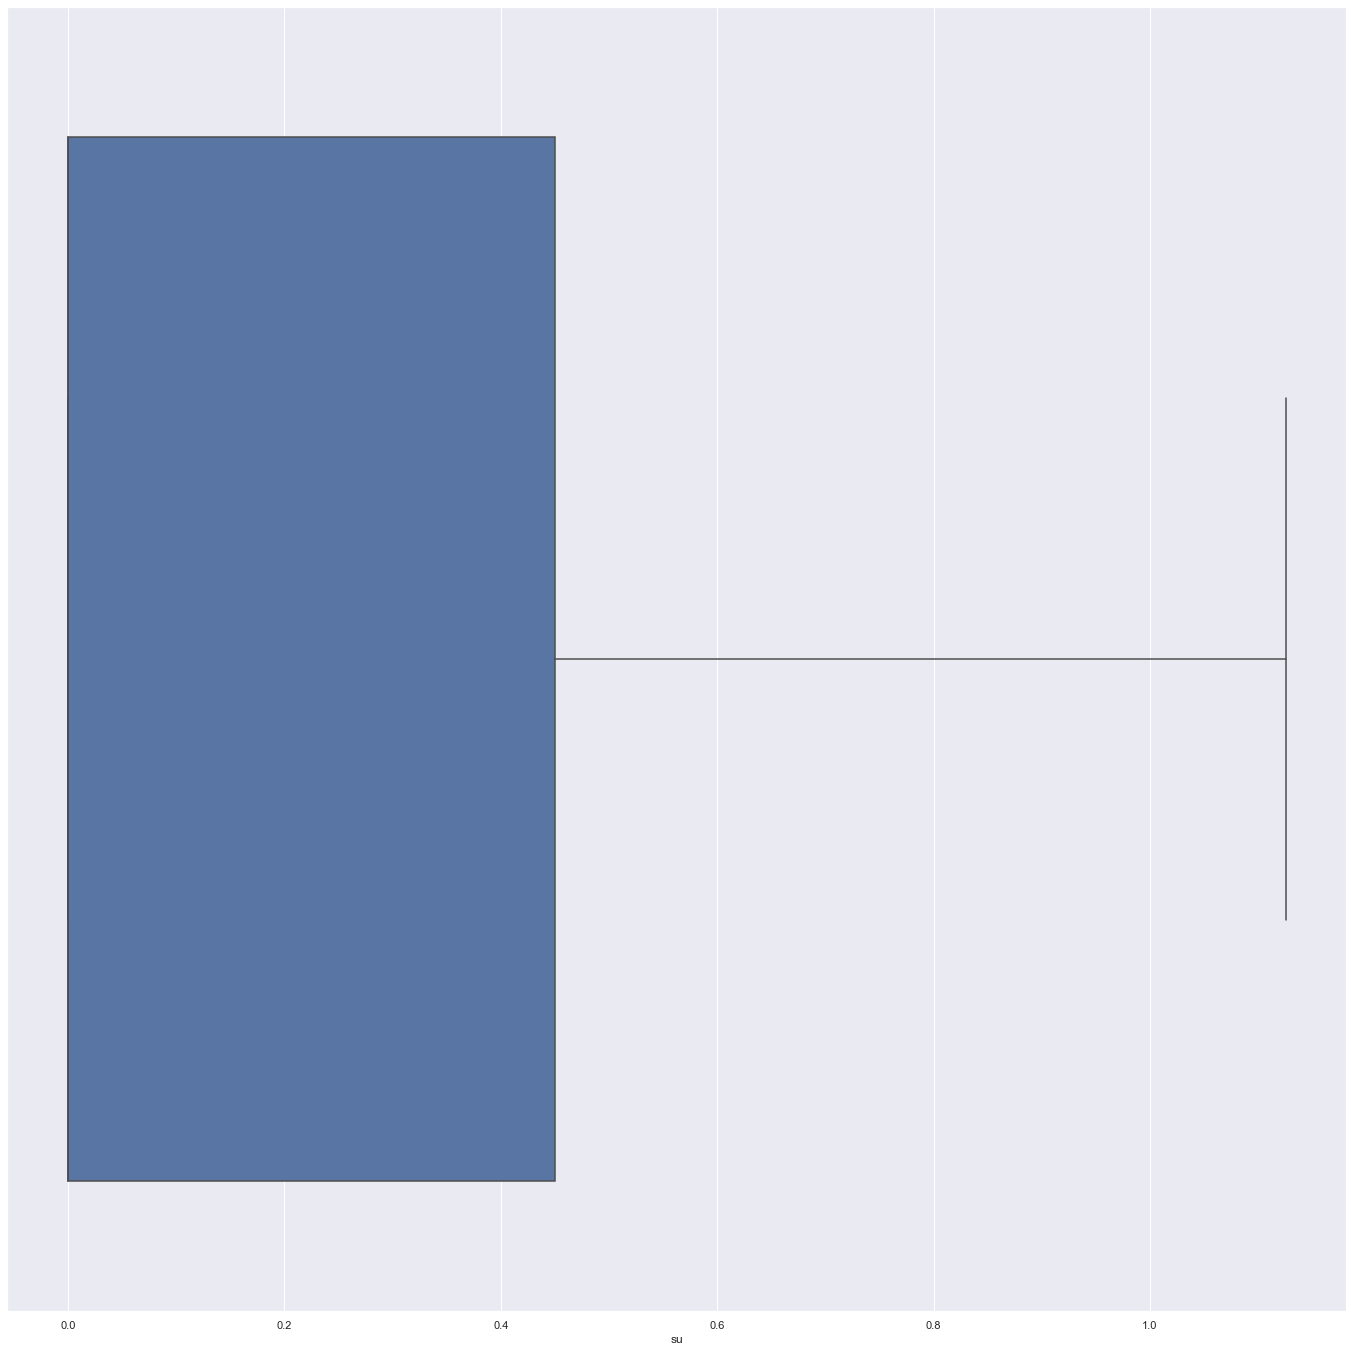

In [85]:
##detect outliers
sns.boxplot(x=df2['su'])
plt.show()

In [86]:
##IQR pc feature 
#rbcc
q1=df2['rbcc'].quantile(0.25)
q3=df2['rbcc'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)
min=q1-(1.5*iqr)
max=q3+(1.5*iqr)
print(min)
print(max)
df2.loc[(df2['rbcc']<min),'rbcc']=min
df2.loc[(df2['rbcc']>max),'rbcc']=max

4.5 4.9 0.40000000000000036
3.8999999999999995
5.500000000000001


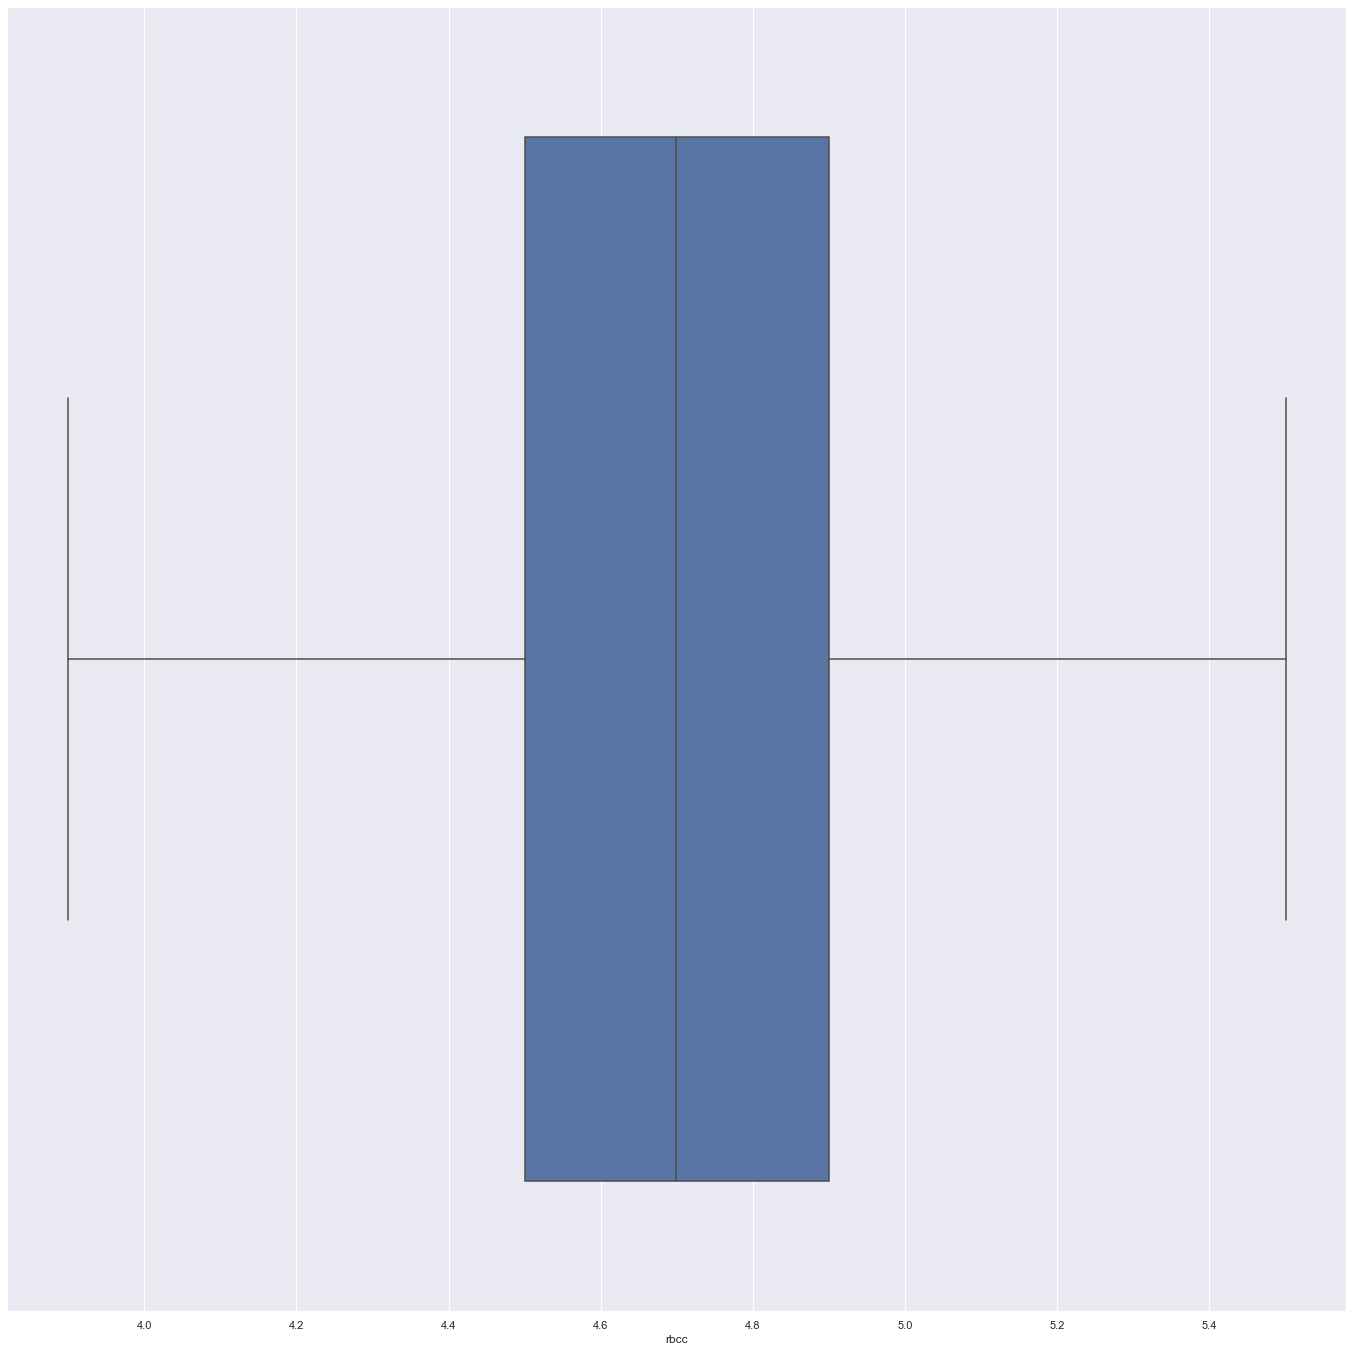

In [87]:
sns.boxplot(x=df2['rbcc'])
plt.show()

In [88]:
##IQR pc feature 
#bgr
q1=df2['bgr'].quantile(0.25)
q3=df2['bgr'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)
min=q1-(1.5*iqr)
max=q3+(1.5*iqr)
print(min)
print(max)
df2.loc[(df2['bgr']<min),'bgr']=min
df2.loc[(df2['bgr']>max),'bgr']=max

101.0 150.0 49.0
27.5
223.5


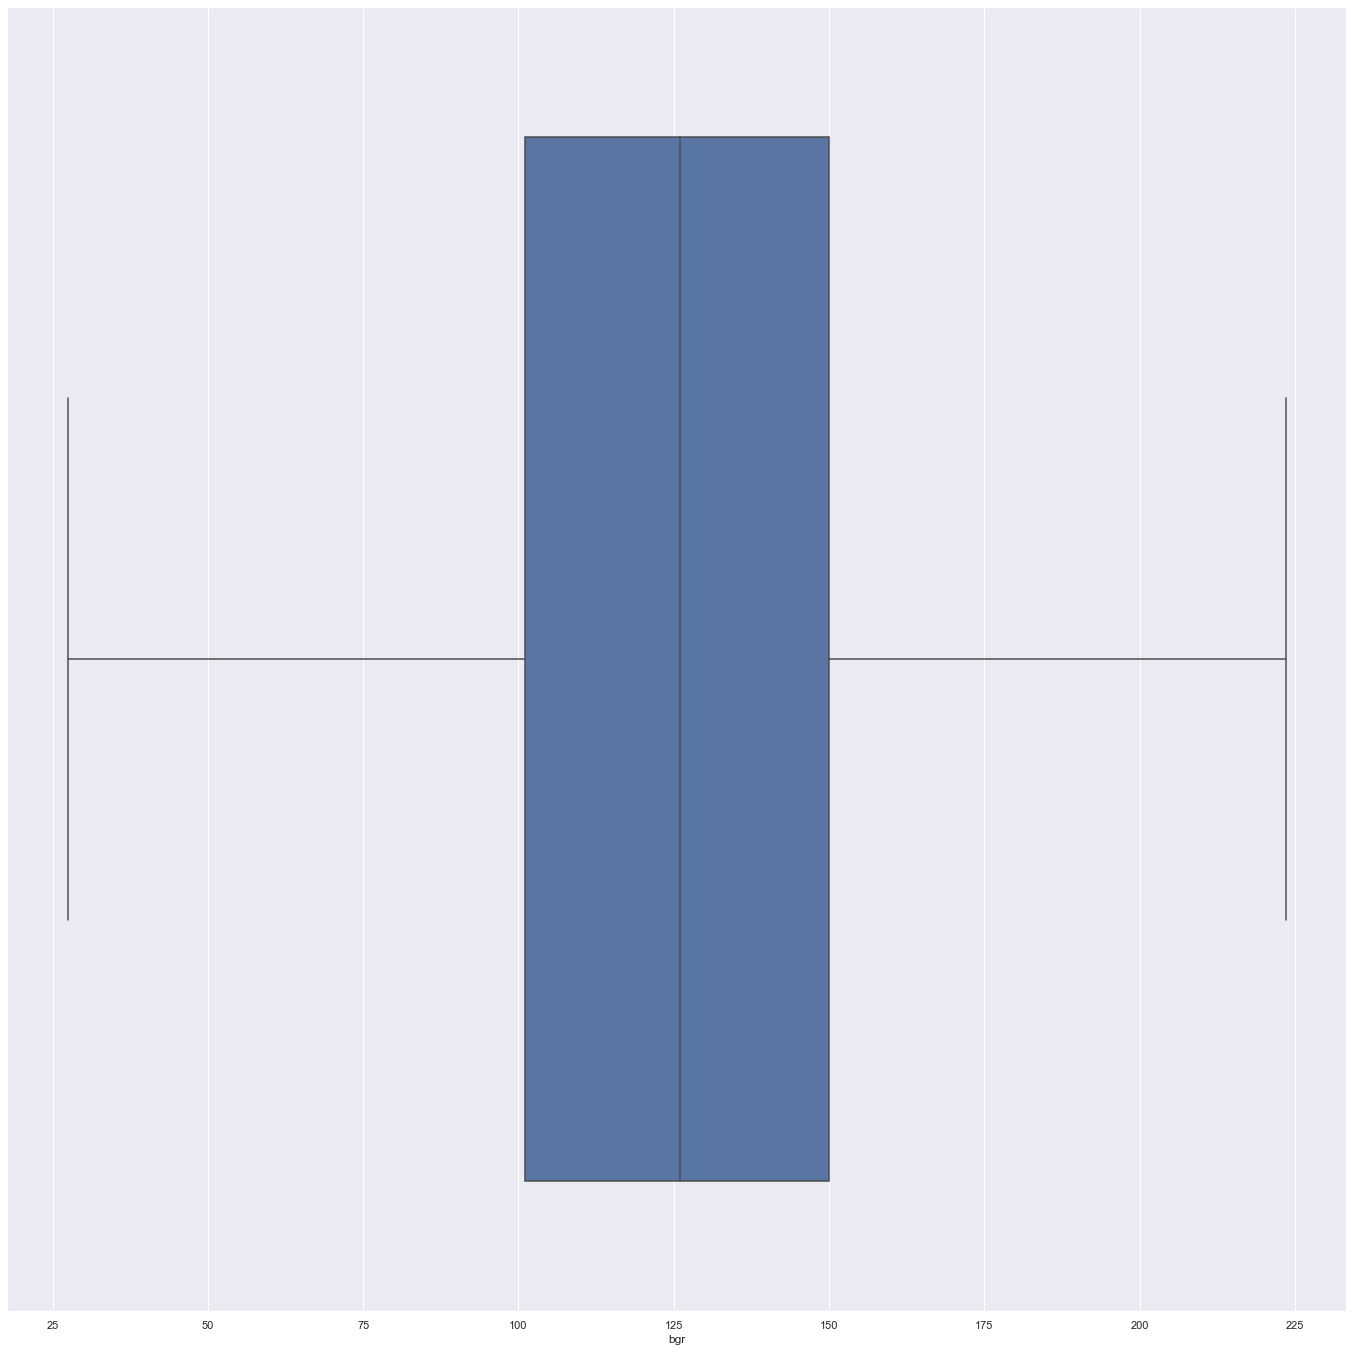

In [89]:
##detect outliers

sns.boxplot(x=df2['bgr'])
plt.show()

In [90]:
##IQR pc feature 
#bu
q1=df2['bu'].quantile(0.25)
q3=df2['bu'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)
min=q1-(1.5*iqr)
max=q3+(1.5*iqr)
print(min)
print(max)
df2.loc[(df2['bu']<min),'bu']=min
df2.loc[(df2['bu']>max),'bu']=max

27.0 60.25 33.25
-22.875
110.125


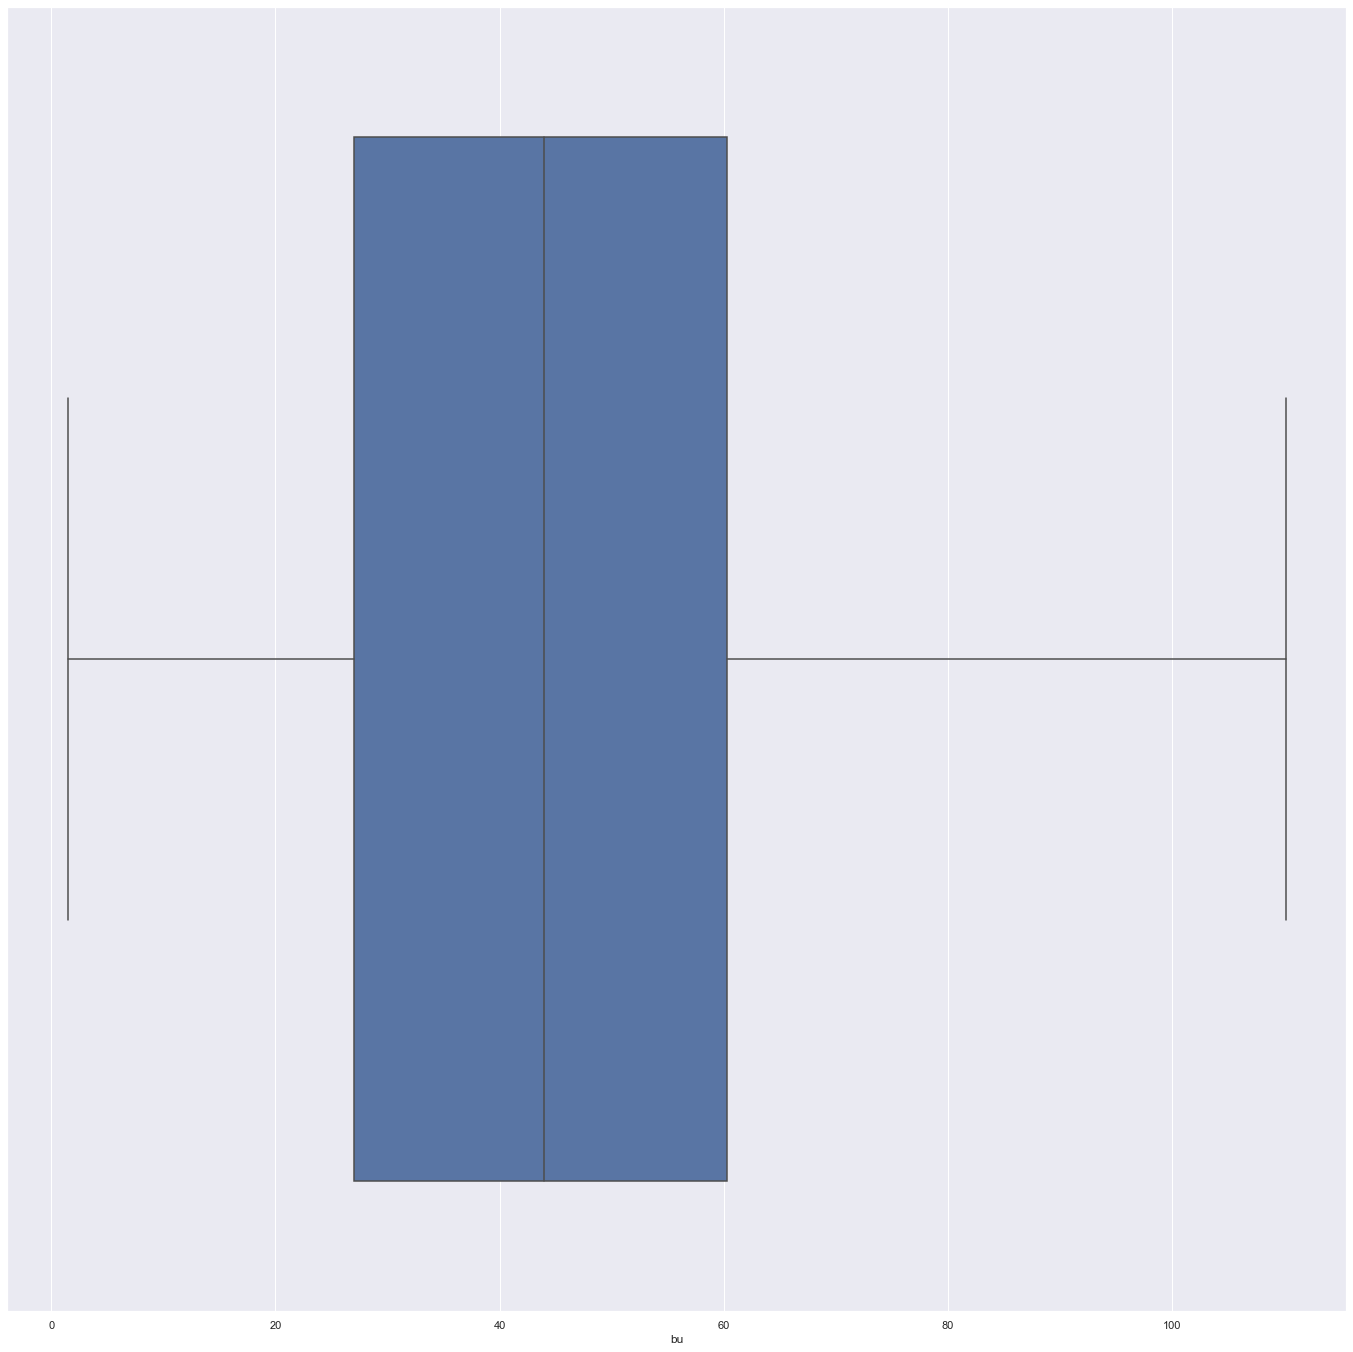

In [91]:
##detect outliers

sns.boxplot(x=df2['bu'])
plt.show()

In [92]:
##IQR pc feature 
#sc
q1=df2['sc'].quantile(0.25)
q3=df2['sc'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)
min=q1-(1.5*iqr)
max=q3+(1.5*iqr)
print(min)
print(max)
df2.loc[(df2['sc']<min),'sc']=min
df2.loc[(df2['sc']>max),'sc']=max

1.7 3.3936440677966164 1.6936440677966165
-0.8404661016949249
5.934110169491541


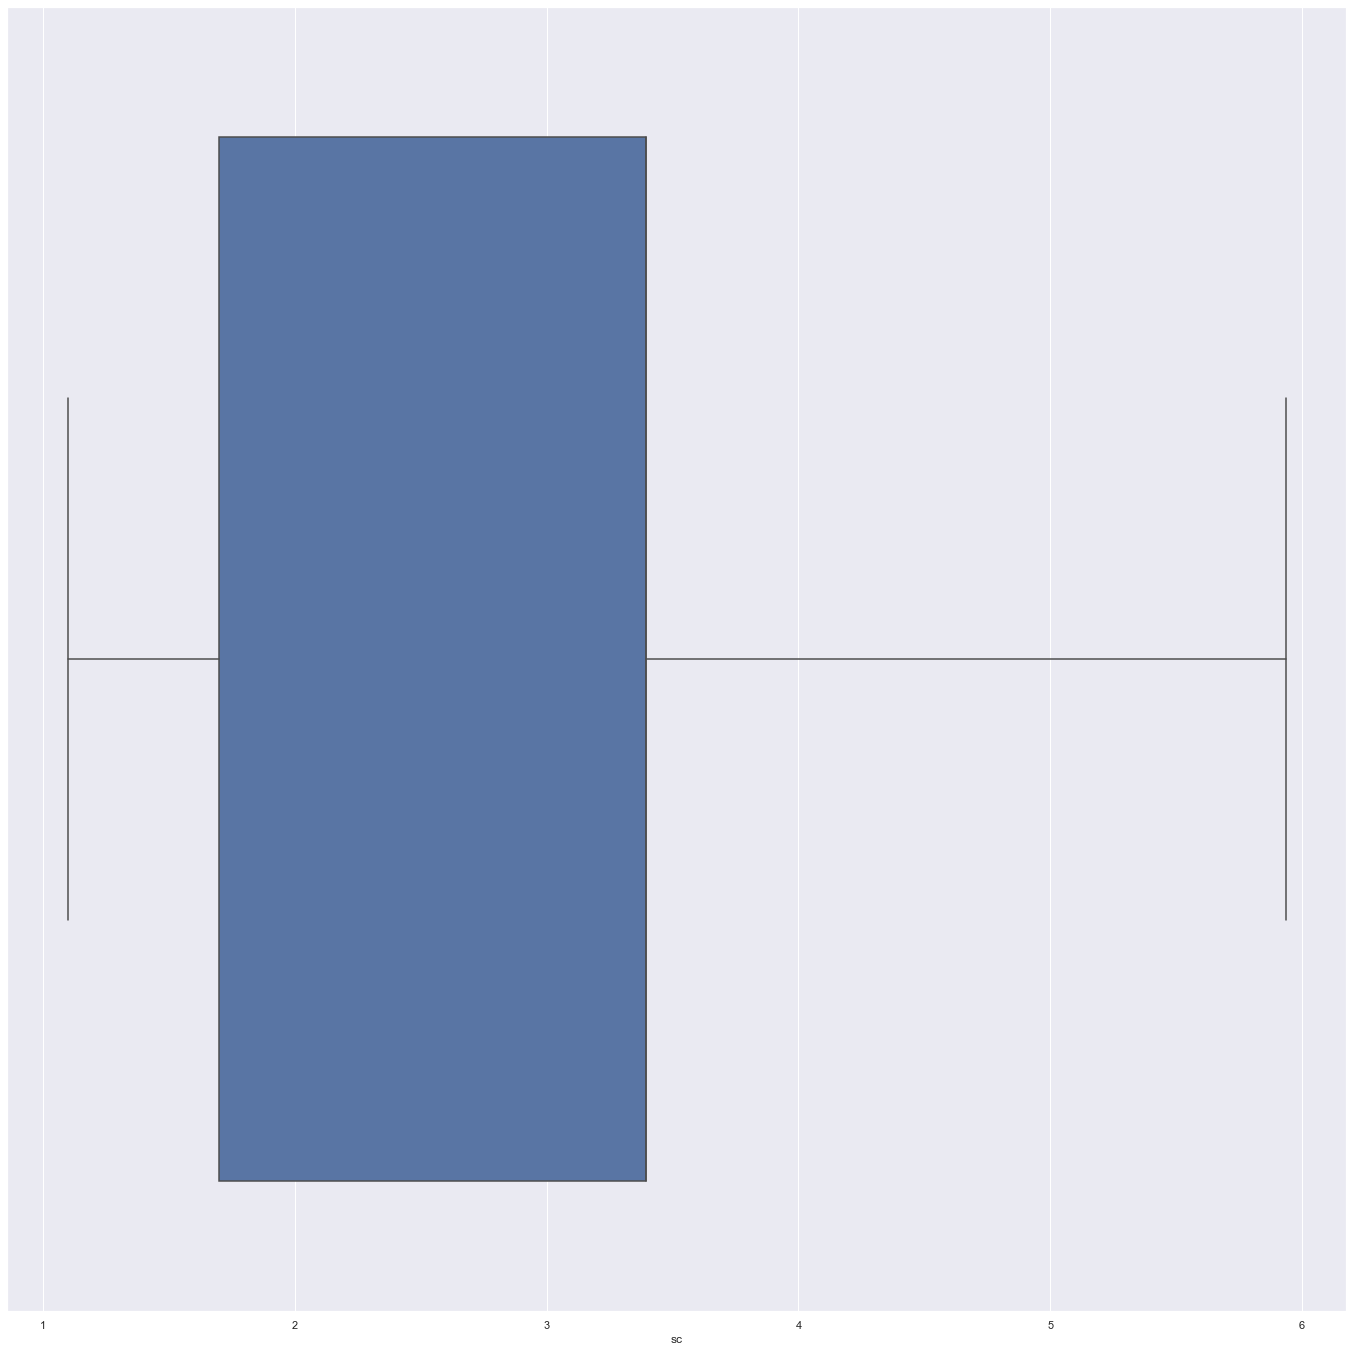

In [93]:
##detect outliers

sns.boxplot(x=df2['sc'])
plt.show()

In [94]:
##IQR pcc feature 
#sod
q1=df2['sod'].quantile(0.25)
q3=df2['sod'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)
min=q1-(1.5*iqr)
max=q3+(1.5*iqr)
print(min)
print(max)
df2.loc[(df2['sod']<min),'sod']=min
df2.loc[(df2['sod']>max),'sod']=max

135.0 141.0 6.0
126.0
150.0


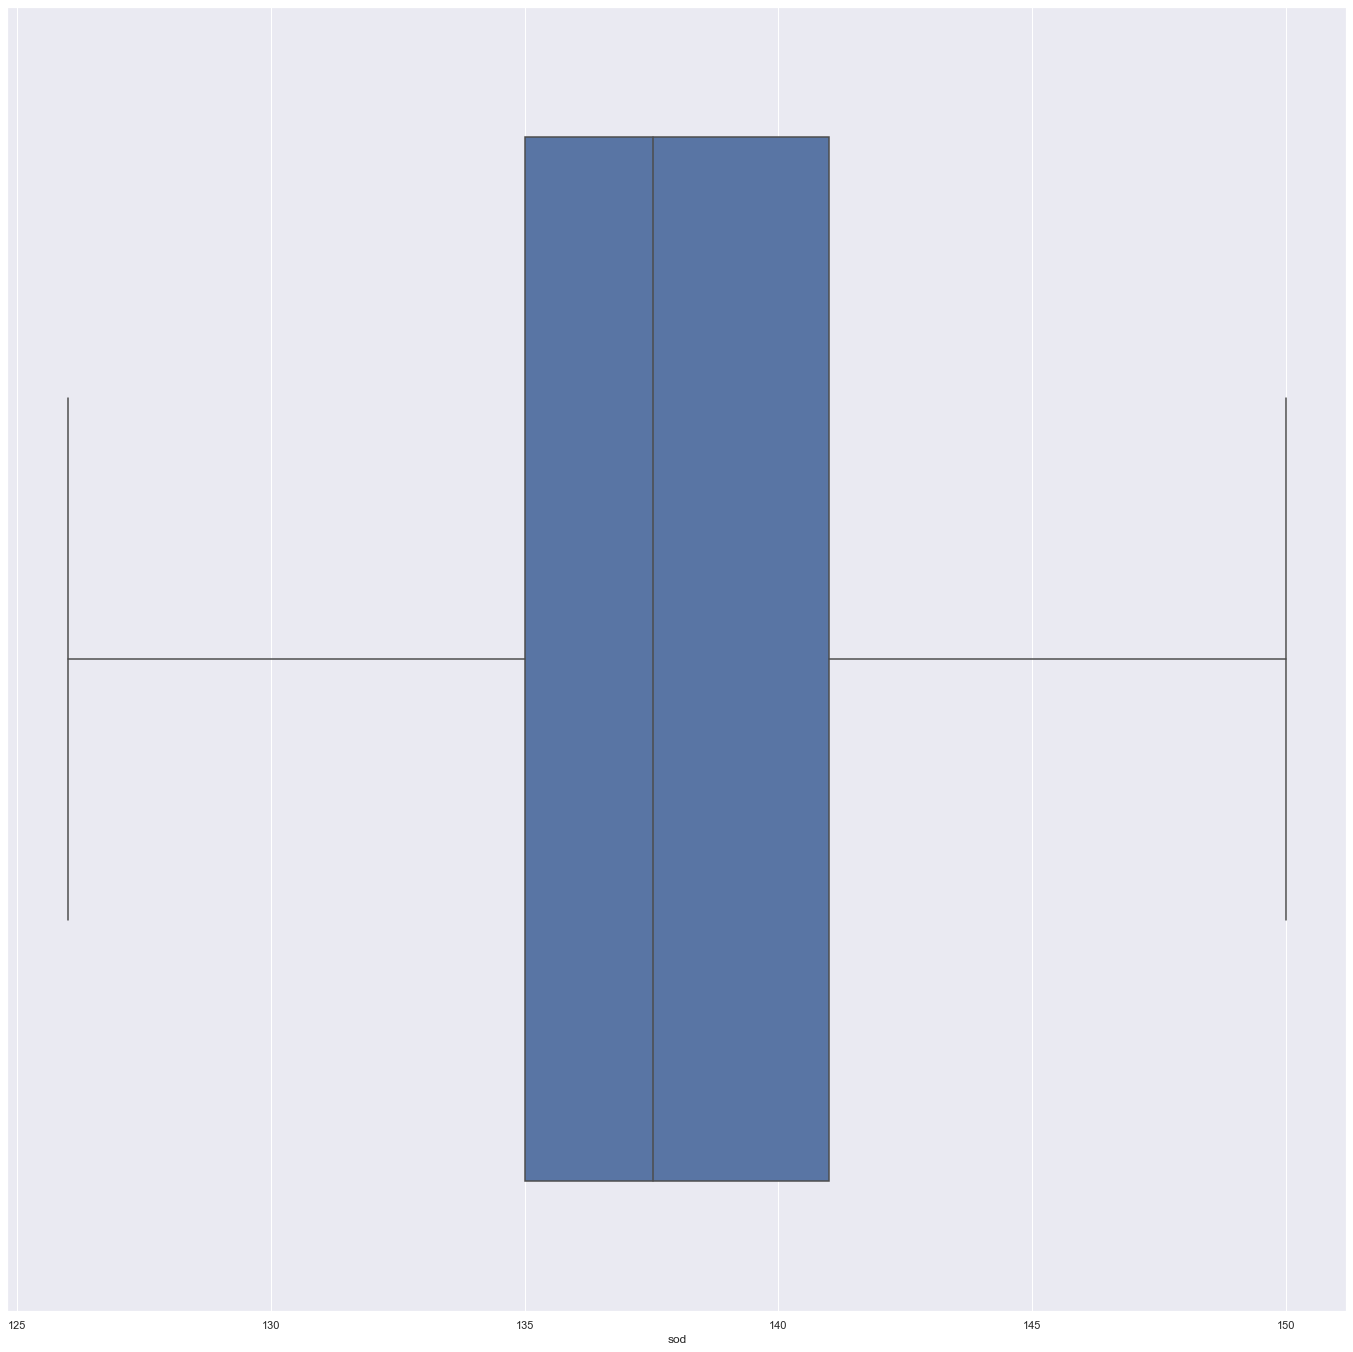

In [95]:
##detect outliers
sns.boxplot(x=df2['sod'])
plt.show()

In [96]:
##IQR ane feature 
#pot
q1=df2['pot'].quantile(0.25)
q3=df2['pot'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)
min=q1-(1.5*iqr)
max=q3+(1.5*iqr)
print(min)
print(max)
df2.loc[(df2['pot']<min),'pot']=min
df2.loc[(df2['pot']>max),'pot']=max

4.1 4.6 0.5
3.3499999999999996
5.35


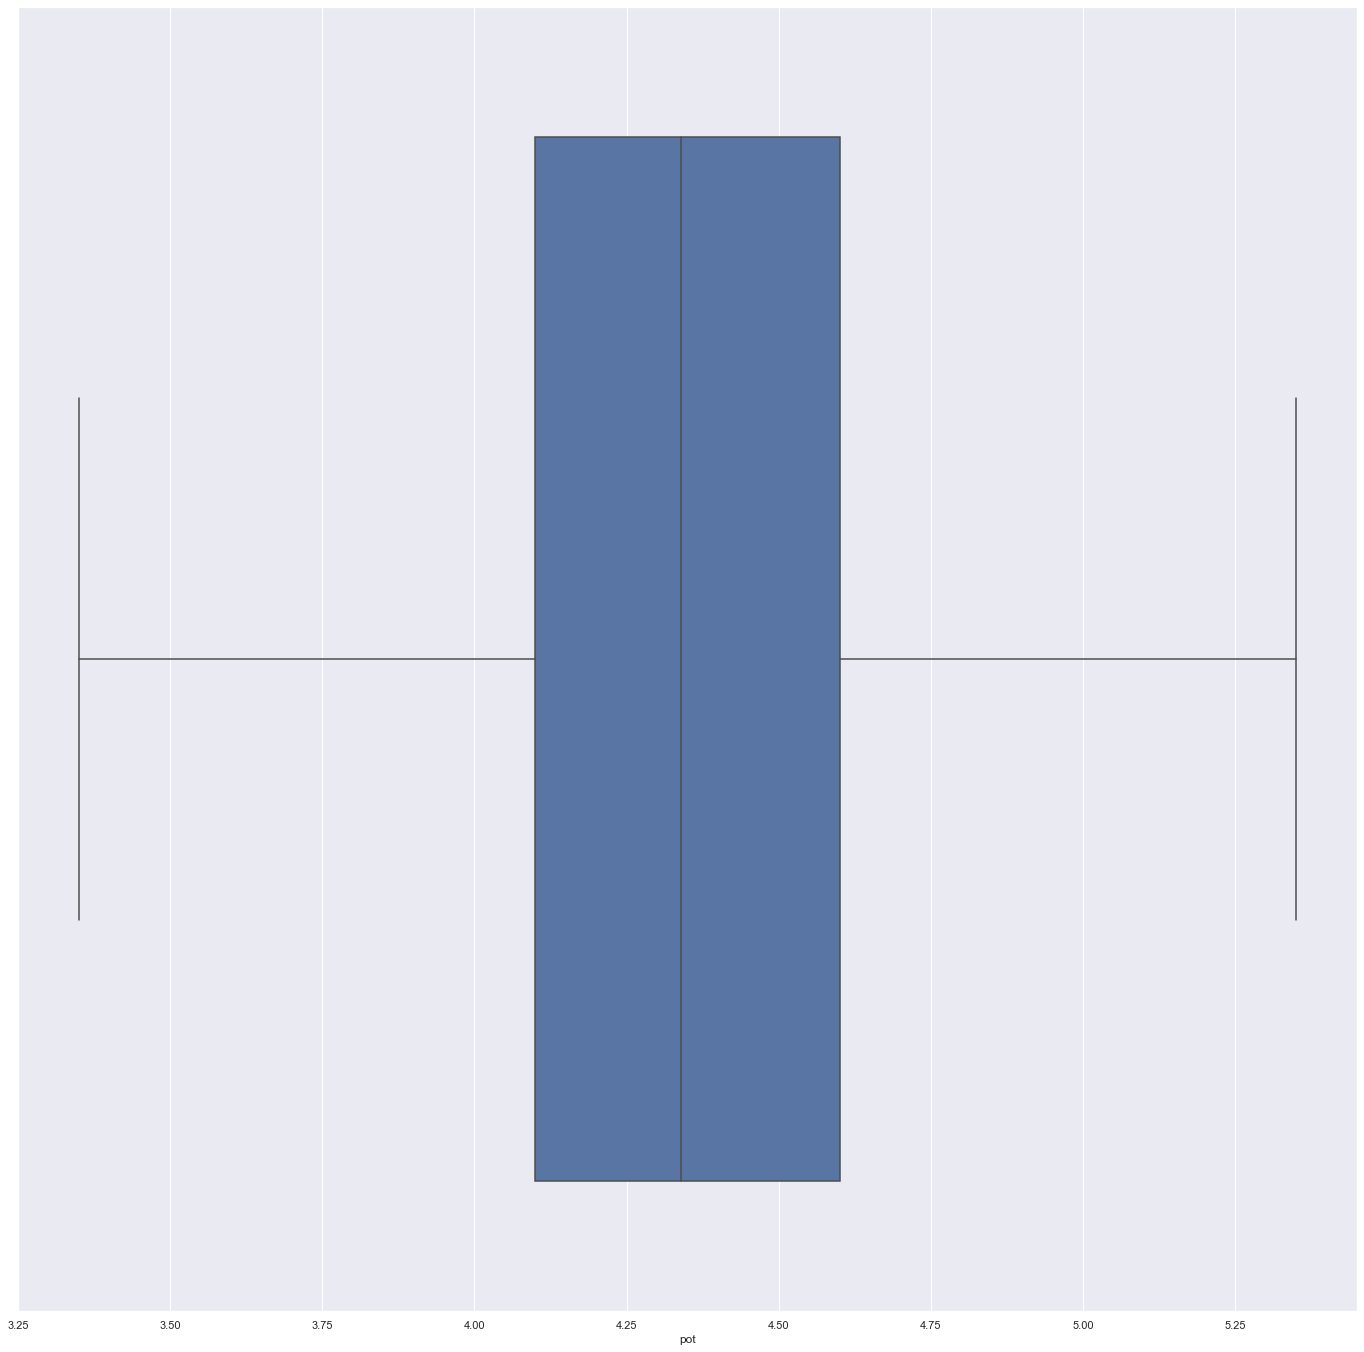

In [97]:
##detect outliers
sns.boxplot(x=df2['pot'])
plt.show()

In [98]:
##IQR ba feature 
#ba
q1=df2['hemo'].quantile(0.25)
q3=df2['hemo'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)
min=q1-(1.5*iqr)
max=q3+(1.5*iqr)
print(min)
print(max)
df2.loc[(df2['hemo']<min),'hemo']=min
df2.loc[(df2['hemo']>max),'hemo']=max

11.1 13.9 2.8000000000000007
6.899999999999999
18.1


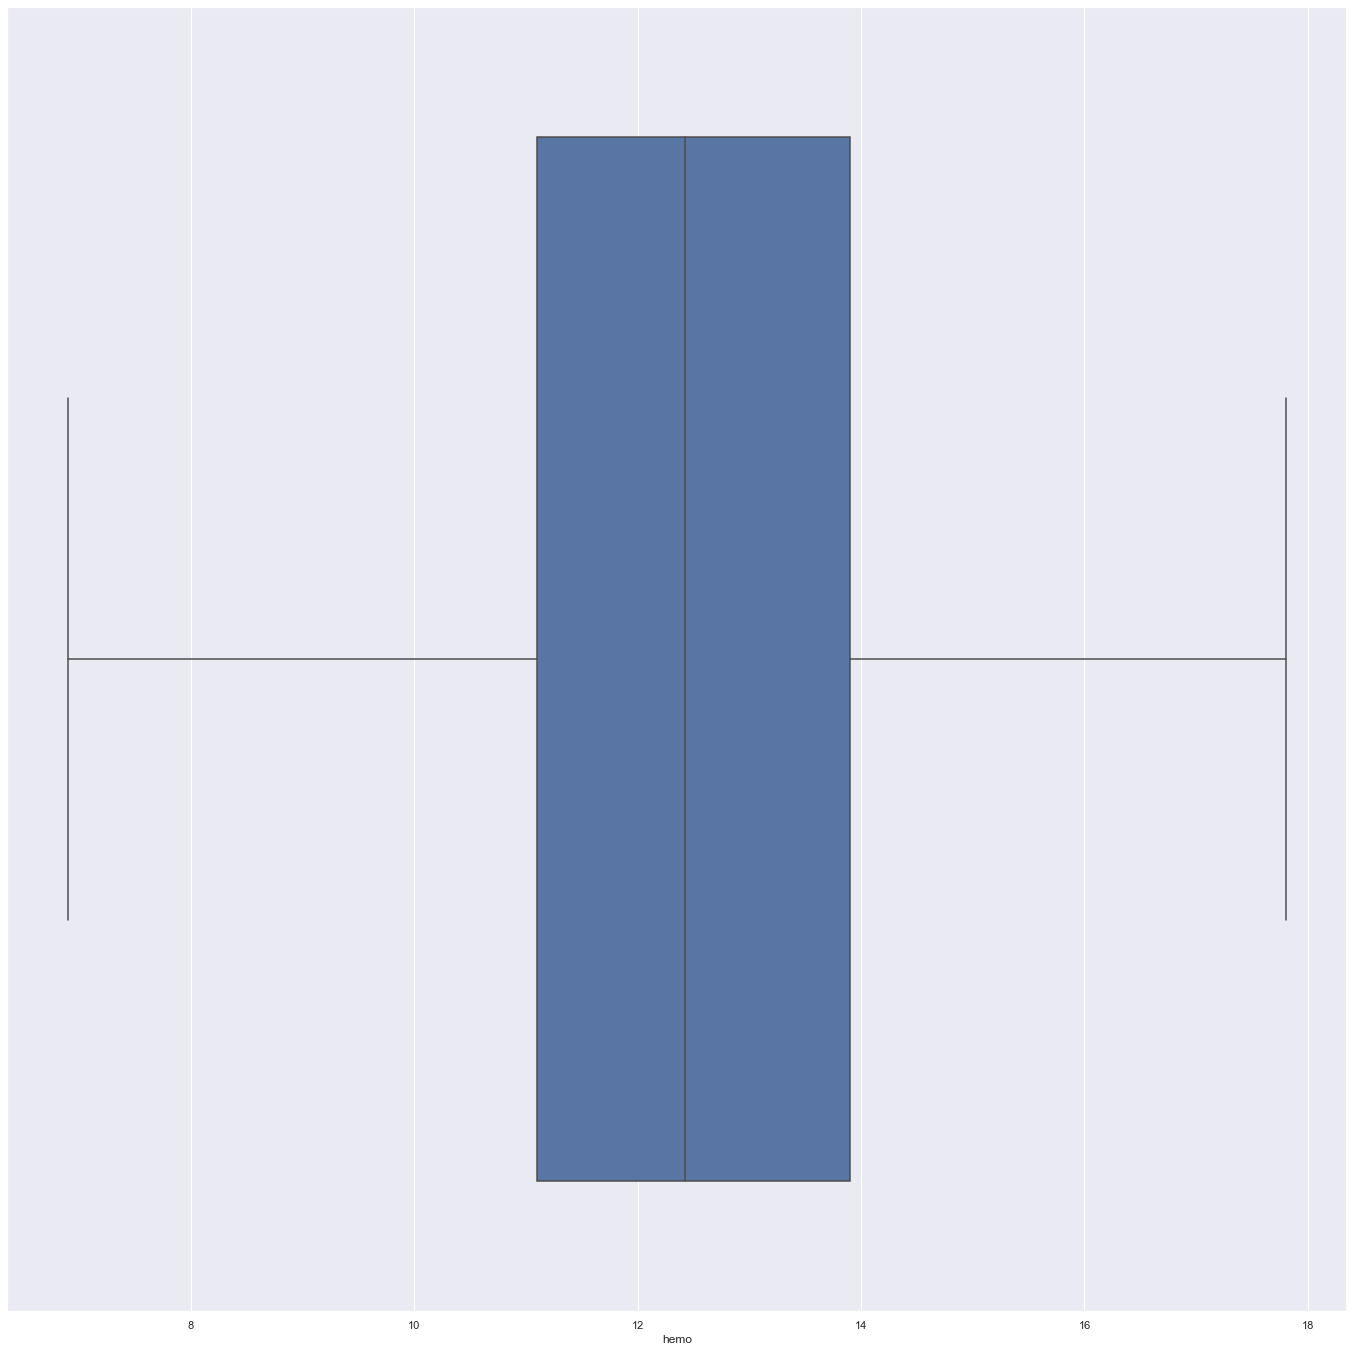

In [99]:
##detect outliers
sns.boxplot(x=df2['hemo'])
plt.show()

In [100]:
##IQR sod feature 
#sod
q1=df2['pcv'].quantile(0.25)
q3=df2['pcv'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)
min=q1-(1.5*iqr)
max=q3+(1.5*iqr)
print(min)
print(max)
df2.loc[(df2['pcv']<min),'pcv']=min
df2.loc[(df2['pcv']>max),'pcv']=max

34.0 44.0 10.0
19.0
59.0


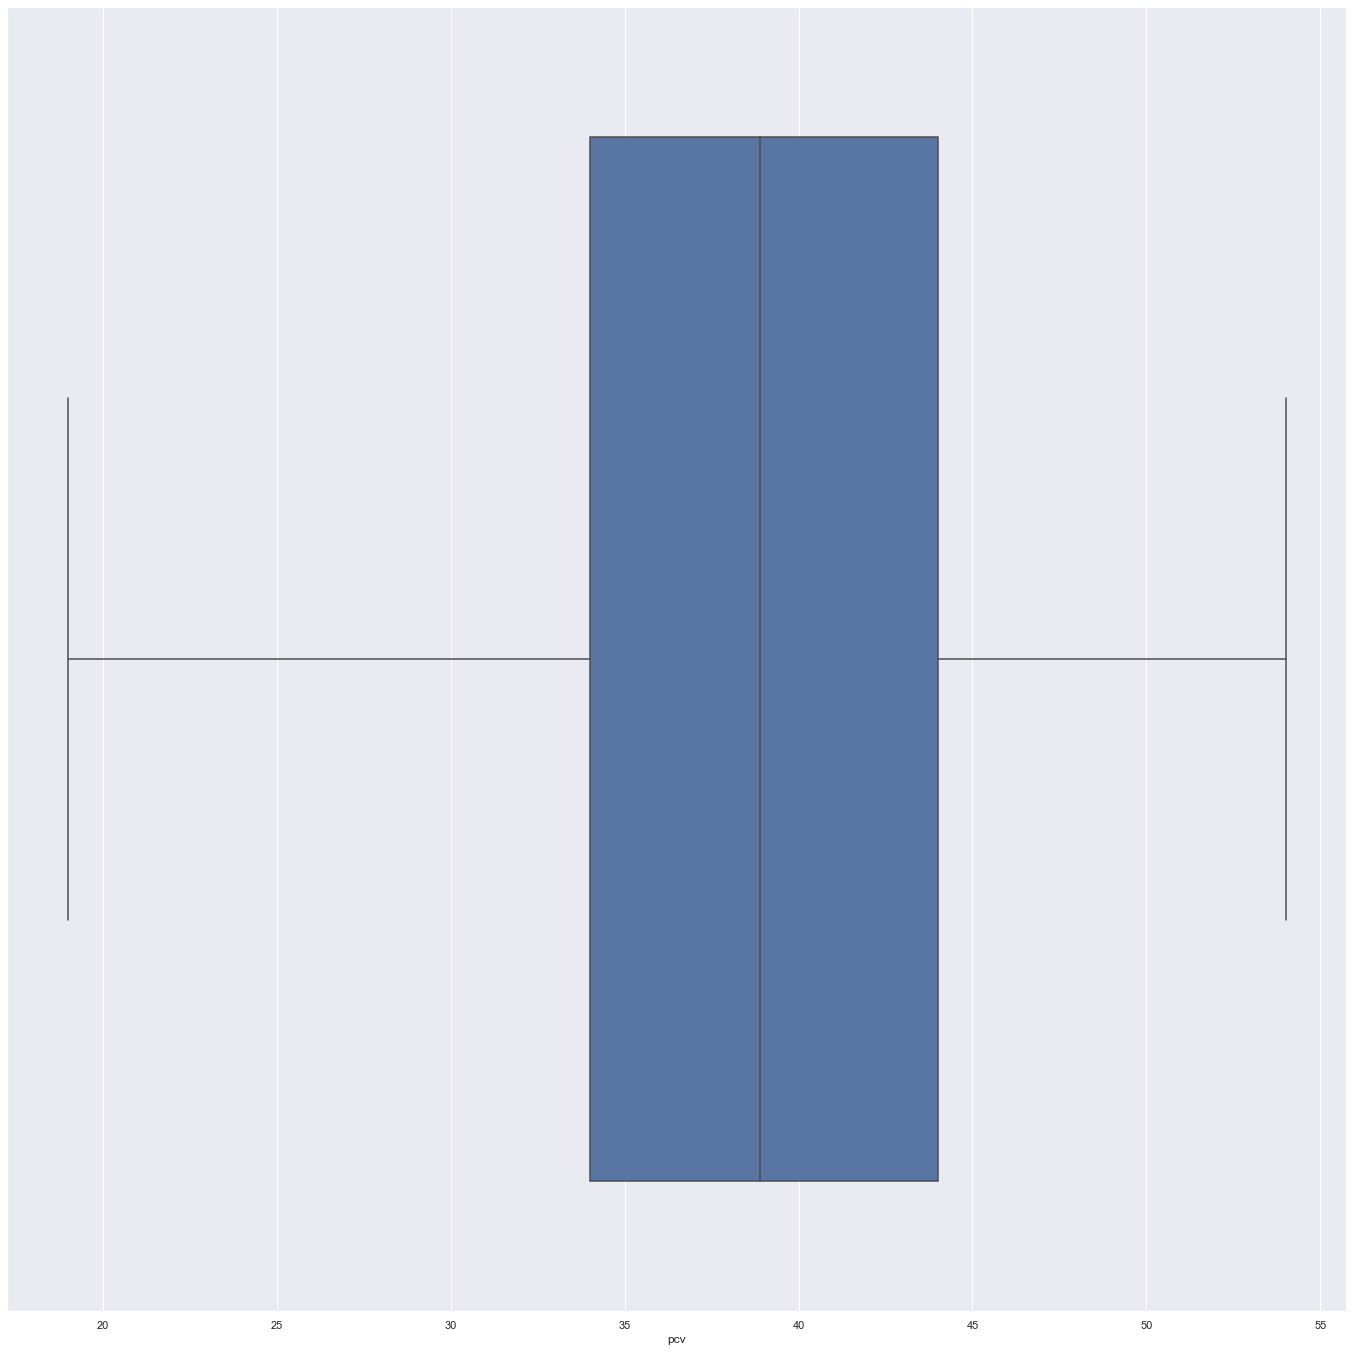

In [101]:
##detect outliers
sns.boxplot(x=df2['pcv'])
plt.show()

In [102]:
##IQR pcv feature 
#pcv
q1=df2['wbcc'].quantile(0.25)
q3=df2['wbcc'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)
min=q1-(1.5*iqr)
max=q3+(1.5*iqr)
print(min)
print(max)
df2.loc[(df2['wbcc']<min),'wbcc']=min
df2.loc[(df2['wbcc']>max),'wbcc']=max

6975.0 9400.0 2425.0
3337.5
13037.5


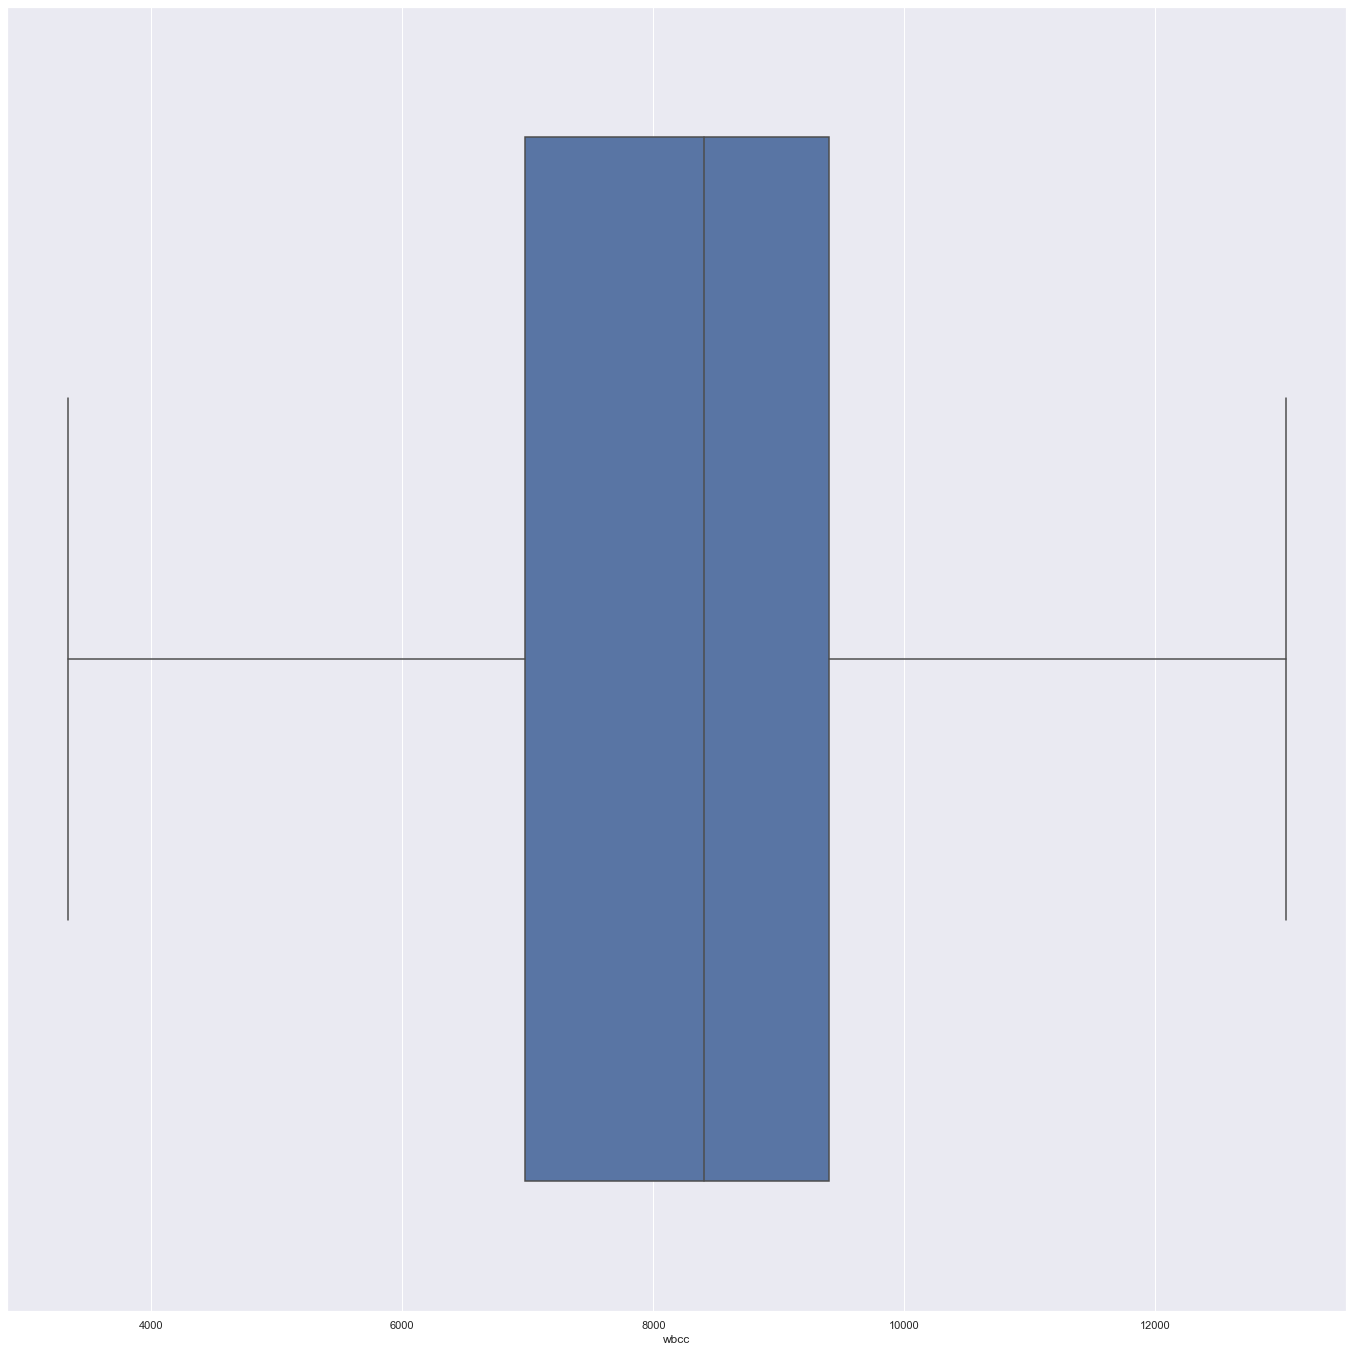

In [103]:
##detect outliers
sns.boxplot(x=df2['wbcc'])
plt.show()

## Data normalization

In [104]:
data_MinMaxScaler = df2.copy()

In [105]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_MinMaxScaler = scaler.fit_transform(data_MinMaxScaler)
data_MinMaxScaler=pd.DataFrame(data_MinMaxScaler,columns=df2.columns)

In [106]:
data_MinMaxScaler.head(10)

age        bp    sg   al   su  rbc   pc  pcc   ba       bgr  ...  \
0  0.481481  0.625000  0.75  0.2  0.0  1.0  1.0  0.0  0.0  0.477041  ...   
1  0.000000  0.000000  0.75  0.8  0.0  1.0  1.0  0.0  0.0  0.614982  ...   
2  0.654321  0.625000  0.25  0.4  1.0  1.0  1.0  0.0  0.0  1.000000  ...   
3  0.481481  0.375000  0.00  0.8  0.0  1.0  0.0  1.0  0.0  0.456633  ...   
4  0.518519  0.625000  0.25  0.4  0.0  1.0  1.0  0.0  0.0  0.400510  ...   
5  0.629630  0.875000  0.50  0.6  0.0  1.0  1.0  0.0  0.0  0.237245  ...   
6  0.728395  0.375000  0.25  0.0  0.0  1.0  1.0  0.0  0.0  0.369898  ...   
7  0.185185  0.536727  0.50  0.4  1.0  1.0  0.0  0.0  0.0  1.000000  ...   
8  0.530864  1.000000  0.50  0.6  0.0  1.0  0.0  1.0  0.0  0.563776  ...   
9  0.543210  0.875000  0.75  0.4  0.0  0.0  0.0  1.0  0.0  0.216837  ...   

        pcv      wbcc          rbcc  htn   dm  cad  appet   pe  ane  class  
0  0.714286  0.460052  8.125000e-01  1.0  1.0  0.0    0.0  0.5  0.0    0.0  
1  0.542857  0.274485  4.994898e-01  0.0  0.0  0.0    0.0  0.5  0.0    0.0  
2  0.342857  0.429124  4.994898e-01  0.0  1.0  0.0    1.0  0.5  1.0    0.0  
3  0.371429  0.346649  4.440892e-16  1.0  0.0  0.0    1.0  1.0  1.0    0.0  
4  0.457143  0.408505  4.375000e-01  0.0  0.0  0.0    0.0  0.5  0.0    0.0  
5  0.571429  0.460052  3.125000e-01  1.0  1.0  0.0    0.0  1.0  0.0    0.0  
6  0.485714  0.522538  4.994898e-01  0.0  0.0  0.0    0.0  0.5  0.0    0.0  
7  0.714286  0.367268  4.994898e-01  0.0  1.0  0.0    0.0  1.0  0.0    0.0  
8  0.400000  0.645619  4.994898e-01  1.0  1.0  0.0    0.0  0.5  1.0    0.0  
9  0.285714  0.903351  0.000000e+00  1.0  1.0  0.0    1.0  0.5  1.0    0.0  

[10 rows x 25 columns]

## Feature selection

Search for the unique values for each value

In [107]:
print("Unique values (per feature): \n{}\n".format(df2.nunique()))

Unique values (per feature): 
age       71
bp         7
sg         5
al         7
su         4
rbc        2
pc         2
pcc        2
ba         2
bgr      101
bu        80
sc        34
sod       24
pot       21
hemo      96
pcv       37
wbcc      78
rbcc      18
htn        2
dm         2
cad        2
appet      3
pe         3
ane        2
class      2
dtype: int64



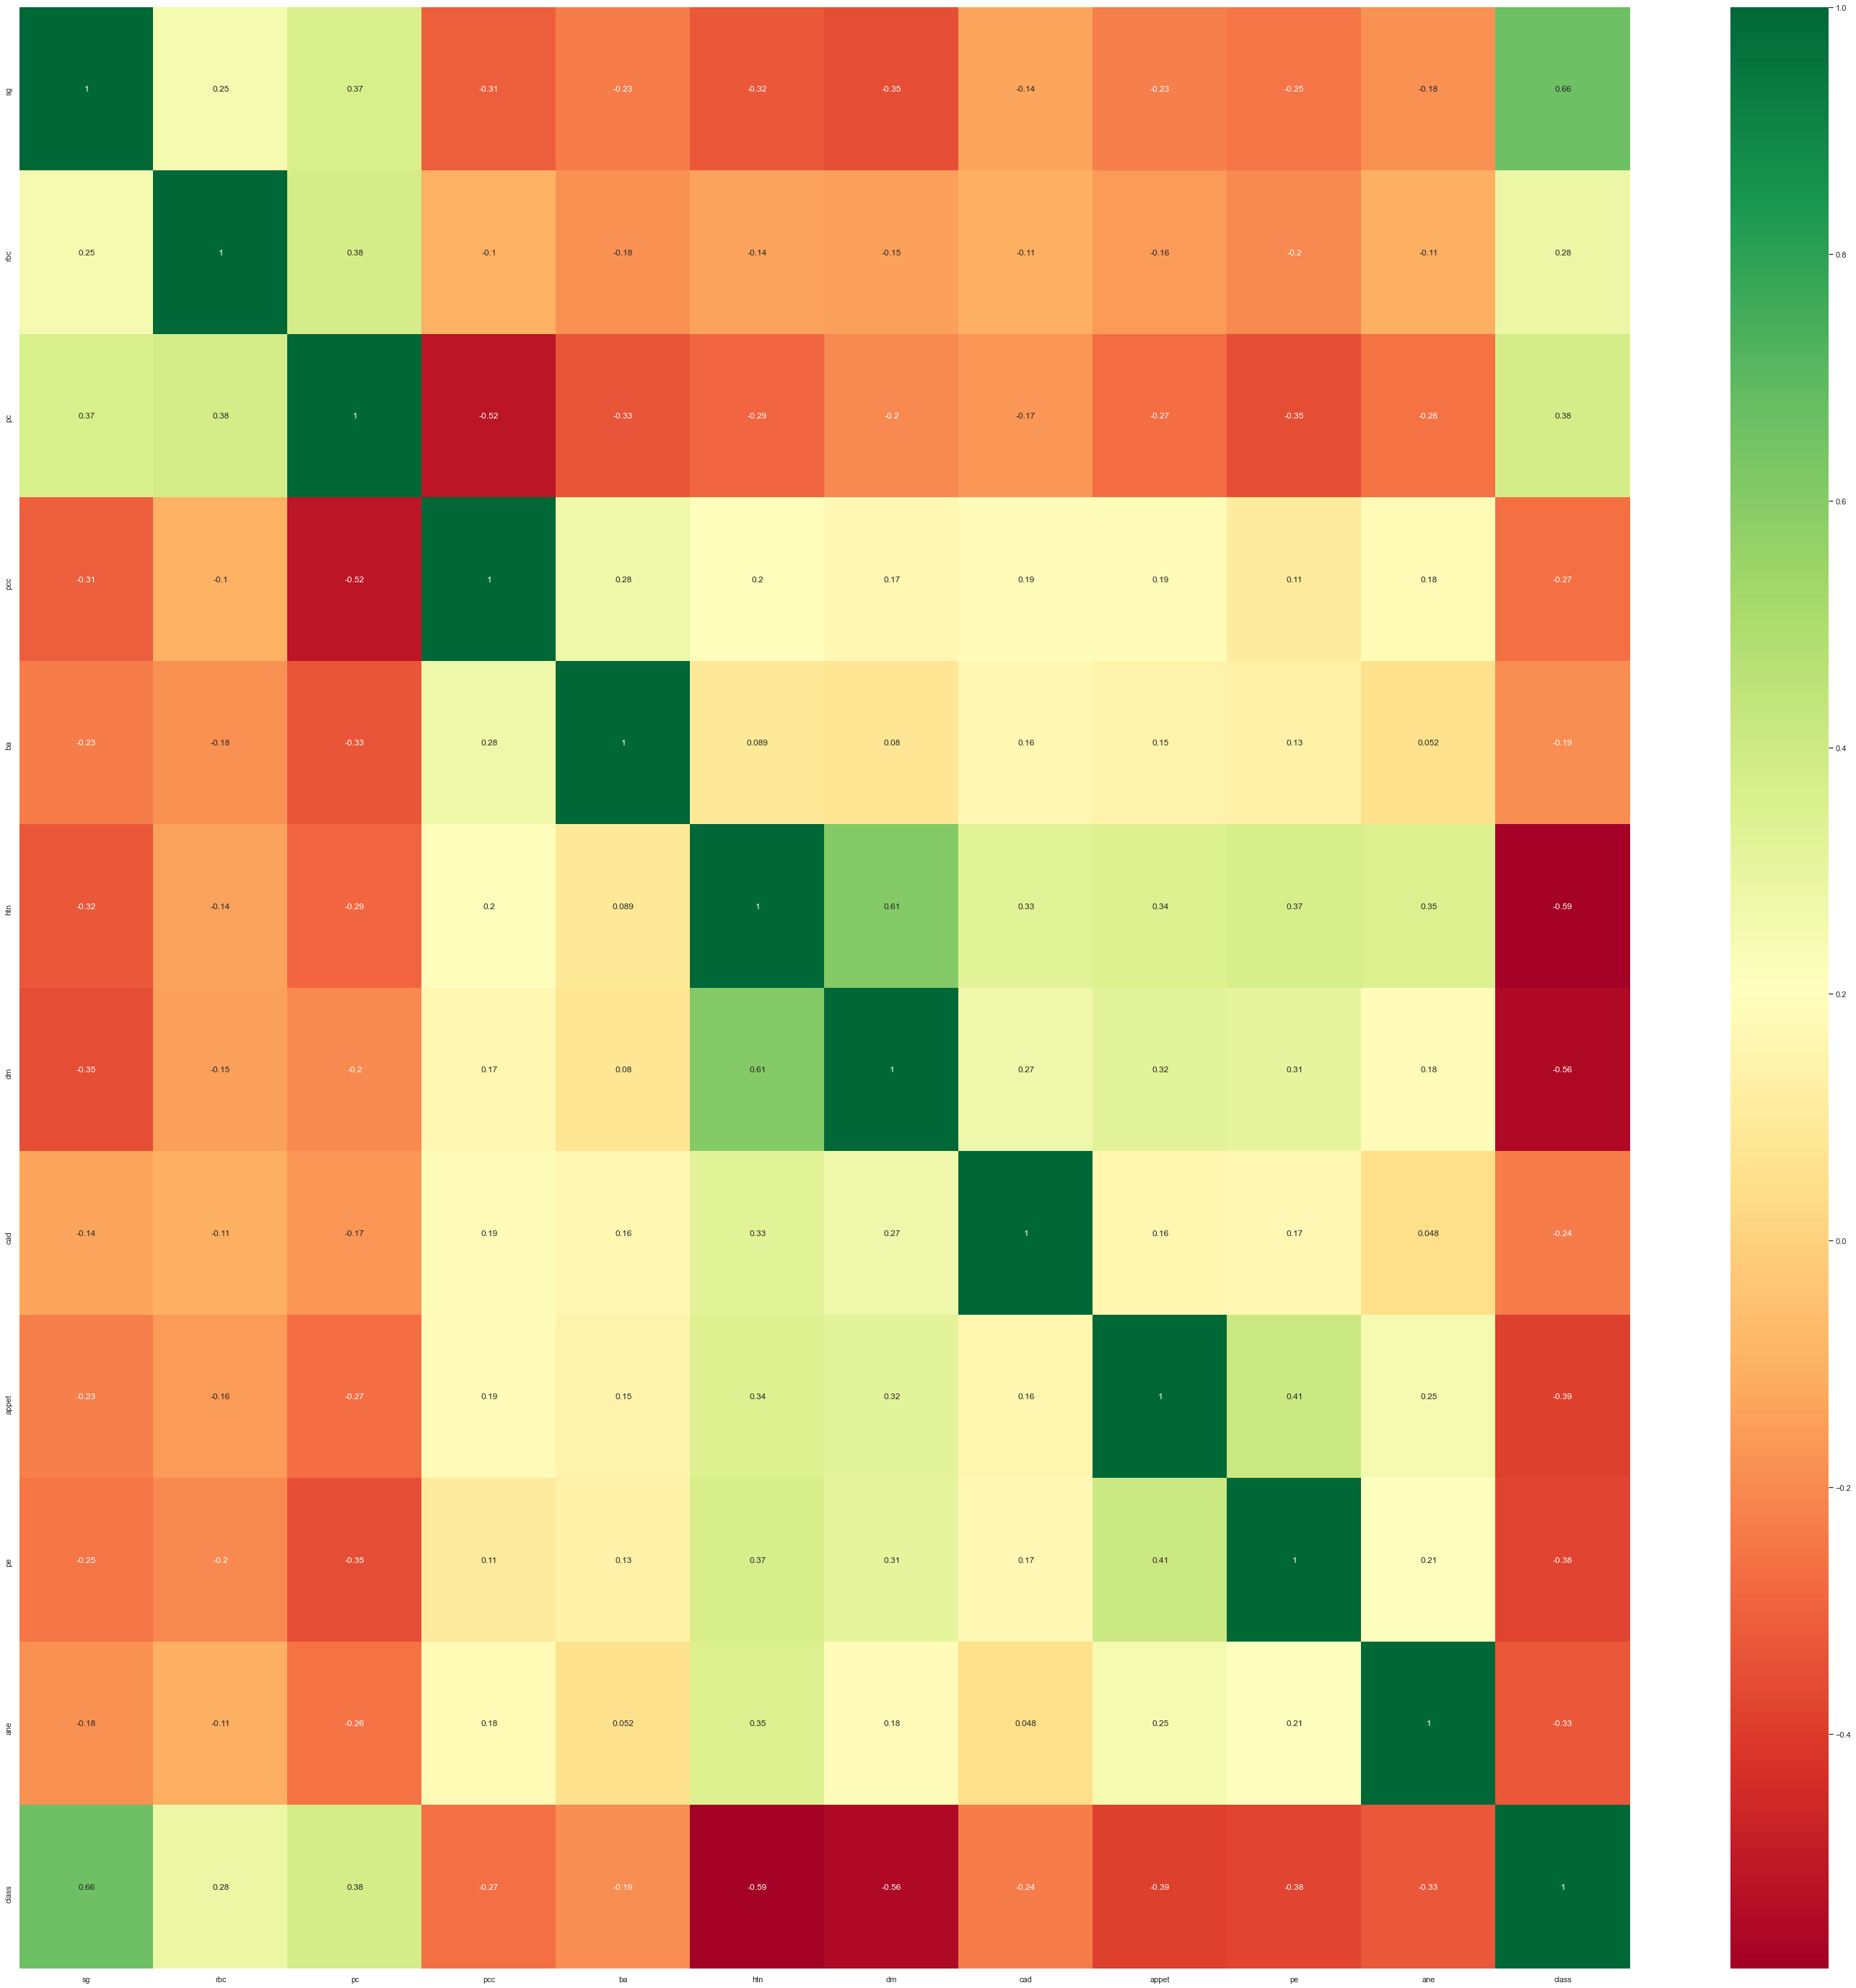

In [108]:
corrmat = df2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(50,50))
#plot heat map
g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

**RFE algorithm**

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [110]:
X=df2.iloc[:,0:24].values
X.shape
X1 = pd.DataFrame(X)

In [111]:
Y=df2['class']
Y.shape
Y.head

<bound method NDFrame.head of 0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int32>

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [113]:
#RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
#from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [114]:
svc = SVC(kernel="linear")
selector=RFECV(estimator=svc,step=1,cv=5,scoring='accuracy')
selector.fit(X_train, y_train)
selector.ranking_
selector.support_

array([False, False,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
        True,  True, False,  True,  True, False])

In [115]:
#to calculate the importance of selected features
np.absolute(selector.estimator_.coef_)

array([[1.52236702, 0.96625204, 0.89807889, 0.15341316, 0.44987009,
        0.56405838, 1.00151704, 1.00000112, 1.        ]])

Optimal number of features : 9
Best features : Int64Index([2, 3, 4, 15, 17, 18, 19, 21, 22], dtype='int64')
Original features : RangeIndex(start=0, stop=24, step=1)


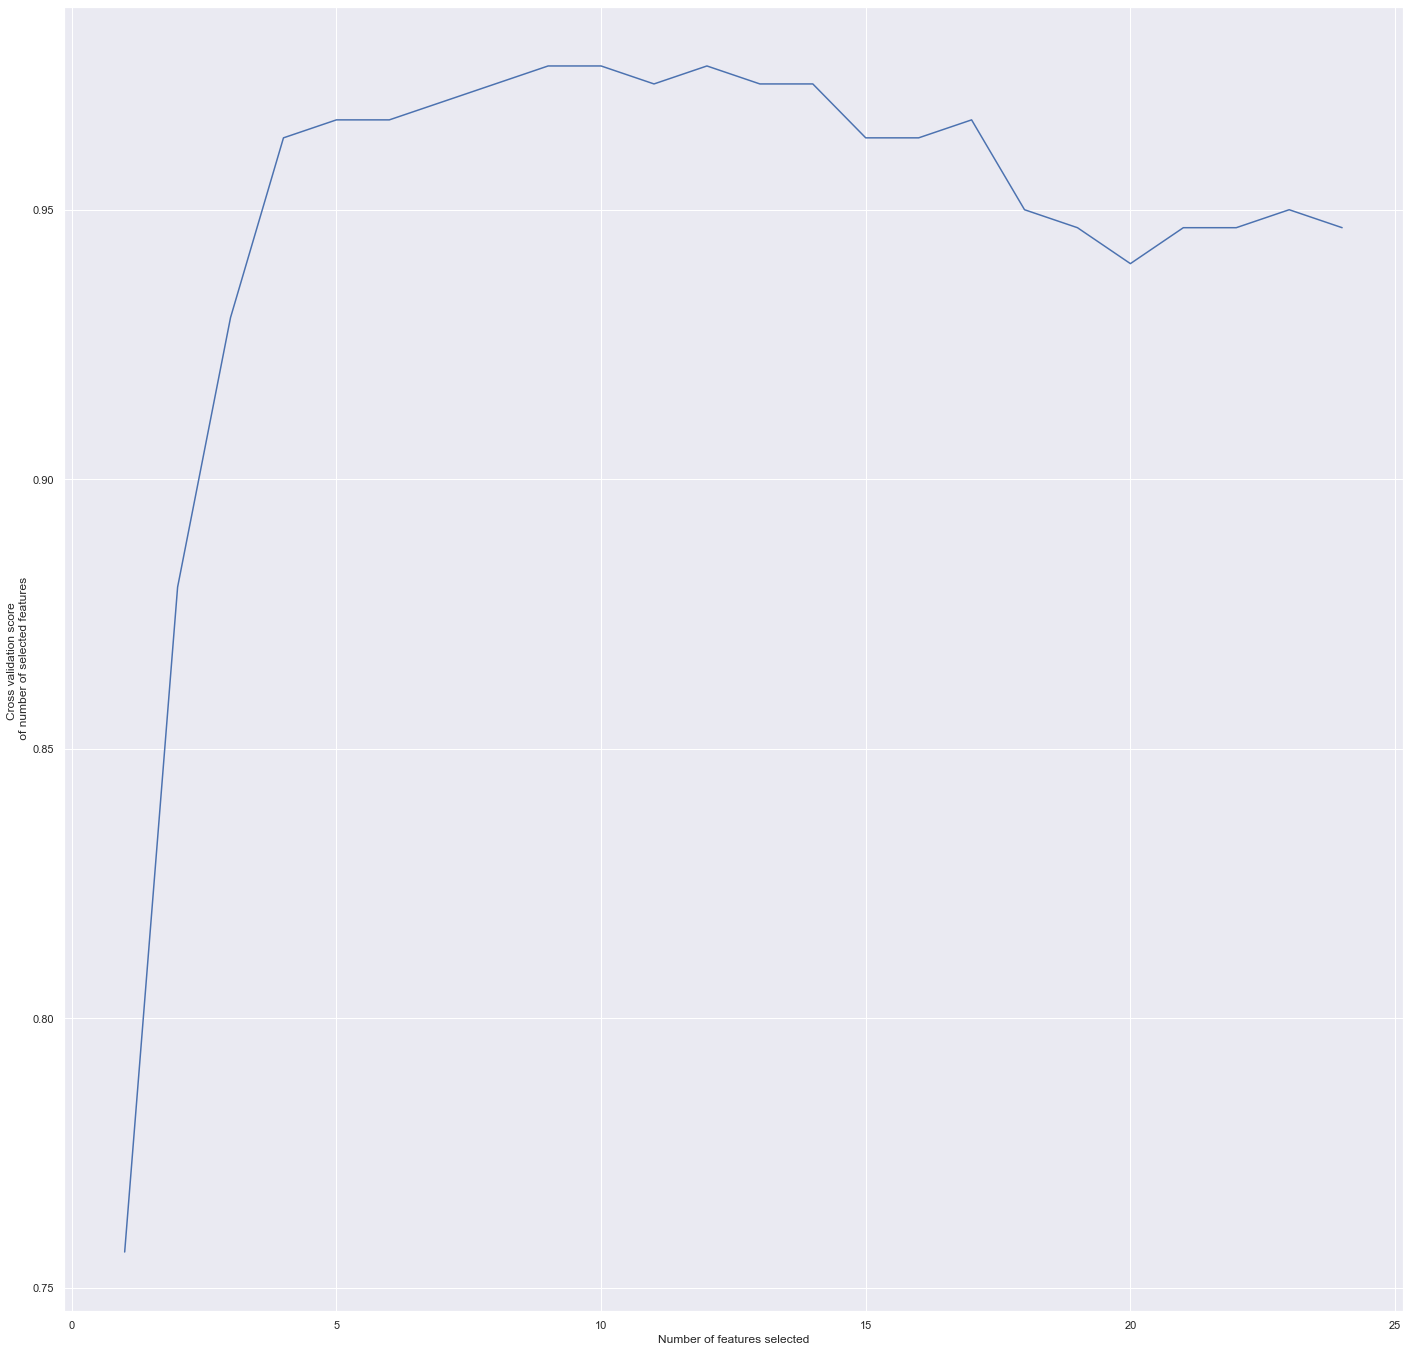

In [116]:
print('Optimal number of features :', selector.n_features_)
print('Best features :', X1.columns[selector.support_])
print('Original features :', X1.columns)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score \n of number of selected features")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

From the RFE method we have detected that we have 7 best features : bp, sg, wbcc, rbcc, htn, cad, appet.

# Modeling and Evaluation

In [117]:
df2

age    bp  sg   al        su  rbc  pc  pcc  ba         bgr  ...   pcv  \
0    48.0  80.0   3  1.0       0.0    1   1    0   0       121.0  ...  44.0   
1     9.0  55.0   3  4.0       0.0    1   1    0   0  148.036517  ...  38.0   
2    62.0  80.0   1  2.0  1.125356    1   1    0   0       223.5  ...  31.0   
3    48.0  70.0   0  4.0       0.0    1   0    1   0       117.0  ...  32.0   
4    51.0  80.0   1  2.0       0.0    1   1    0   0       106.0  ...  35.0   
..    ...   ...  ..  ...       ...  ...  ..  ...  ..         ...  ...   ...   
395  55.0  80.0   3  0.0       0.0    1   1    0   0       140.0  ...  47.0   
396  42.0  70.0   4  0.0       0.0    1   1    0   0        75.0  ...  54.0   
397  12.0  80.0   3  0.0       0.0    1   1    0   0       100.0  ...  49.0   
398  17.0  60.0   4  0.0       0.0    1   1    0   0       114.0  ...  51.0   
399  58.0  80.0   4  0.0       0.0    1   1    0   0       131.0  ...  53.0   

       wbcc      rbcc htn dm cad appet pe  ane  class  
0    7800.0       5.2   1  1   0     0  1    0      0  
1    6000.0  4.699184   0  0   0     0  1    0      0  
2    7500.0  4.699184   0  1   0     2  1    1      0  
3    6700.0       3.9   1  0   0     2  2    1      0  
4    7300.0       4.6   0  0   0     0  1    0      0  
..      ...       ...  .. ..  ..   ... ..  ...    ...  
395  6700.0       4.9   0  0   0     0  1    0      1  
396  7800.0       5.5   0  0   0     0  1    0      1  
397  6600.0       5.4   0  0   0     0  1    0      1  
398  7200.0       5.5   0  0   0     0  1    0      1  
399  6800.0       5.5   0  0   0     0  1    0      1  

[400 rows x 25 columns]

In [118]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     400 non-null    object
 1   bp      400 non-null    object
 2   sg      400 non-null    int32 
 3   al      400 non-null    object
 4   su      400 non-null    object
 5   rbc     400 non-null    int32 
 6   pc      400 non-null    int32 
 7   pcc     400 non-null    int32 
 8   ba      400 non-null    int32 
 9   bgr     400 non-null    object
 10  bu      400 non-null    object
 11  sc      400 non-null    object
 12  sod     400 non-null    object
 13  pot     400 non-null    object
 14  hemo    400 non-null    object
 15  pcv     400 non-null    object
 16  wbcc    400 non-null    object
 17  rbcc    400 non-null    object
 18  htn     400 non-null    int32 
 19  dm      400 non-null    int32 
 20  cad     400 non-null    int32 
 21  appet   400 non-null    int32 
 22  pe      400 non-null    in

In [119]:
df2.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [120]:
#Separate label from features
X= df2.iloc[:,0:24].values

In [121]:
y= df2['class'].values

In [122]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [123]:
# Splitting train_set, test_set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [124]:
X_train.shape

(300, 24)

In [125]:
X.shape

(400, 24)

In [126]:
X_test.shape

(100, 24)

In [127]:
#Normalization MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# KNN Model

In [128]:
#Import k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'Score')

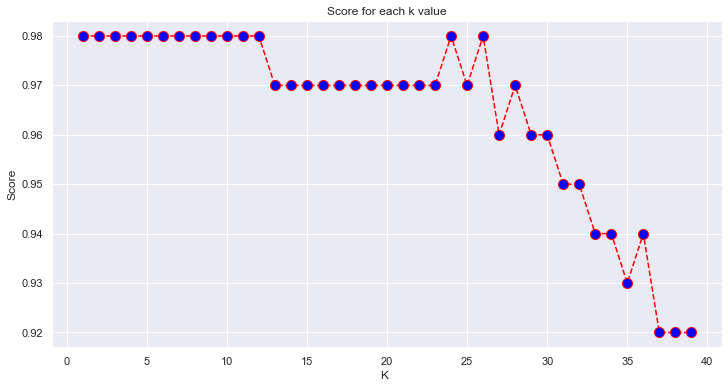

In [129]:
score = []
# Calculate score for k between 1 and 40 

for i in range(1, 40):
    knn = KNeighborsClassifier(i,metric='manhattan')
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    score.append(knn_model.score(X_test, y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), score, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Score for each k value')
plt.xlabel('K ')
plt.ylabel('Score')

In [130]:
#retrain the model with the best value k
knn = KNeighborsClassifier(10)
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [131]:
#Accuracy
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.98
Accuracy of K-NN classifier on test set: 0.98


In [132]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        62
           1       0.95      1.00      0.97        38

    accuracy                           0.98       100
   macro avg       0.97      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



#cross validation Knn

In [133]:
from sklearn.model_selection import cross_val_score

In [134]:
cross_val_score(KNeighborsClassifier(10), X_train, y_train, cv=5)

array([0.98333333, 0.96666667, 0.98333333, 0.96666667, 0.95      ])

#Grid Search for KNN

In [135]:
from sklearn.model_selection import GridSearchCV

In [136]:
param_grid = {'n_neighbors': [5, 10, 15, 20],  
              'metric': ['euclidean', 'manhattan']} 

In [137]:
gs=GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

In [138]:
gs

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [5, 10, 15, 20]})

In [139]:
gs_result=gs.fit(X_train,y_train)

In [140]:
gs_result

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [5, 10, 15, 20]})

In [141]:
gs_result.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=10)

In [142]:
gs_result.best_score_

0.9766666666666666

In [143]:
gs_result.best_params_

{'metric': 'manhattan', 'n_neighbors': 10}

#  Naive Bayes NB Model

In [144]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [145]:
#searching for the best parameters
nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB()}
scores = {}
for key, model in nb.items():
    s = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    scores[key] = np.mean(s)
scores

{'gaussian': 0.9366666666666668, 'bernoulli': 0.9166666666666667}

In [146]:
model=GaussianNB()

In [147]:
#retrain the model with the best parameter
model=GaussianNB()
model_NB = model.fit(X_train, y_train)
y_pred_NB = model_NB.predict(X_test)

In [148]:
print('Accuracy of NB classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of NB classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))

Accuracy of NB classifier on training set: 0.94
Accuracy of NB classifier on test set: 0.95


In [149]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        62
           1       0.90      0.97      0.94        38

    accuracy                           0.95       100
   macro avg       0.94      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



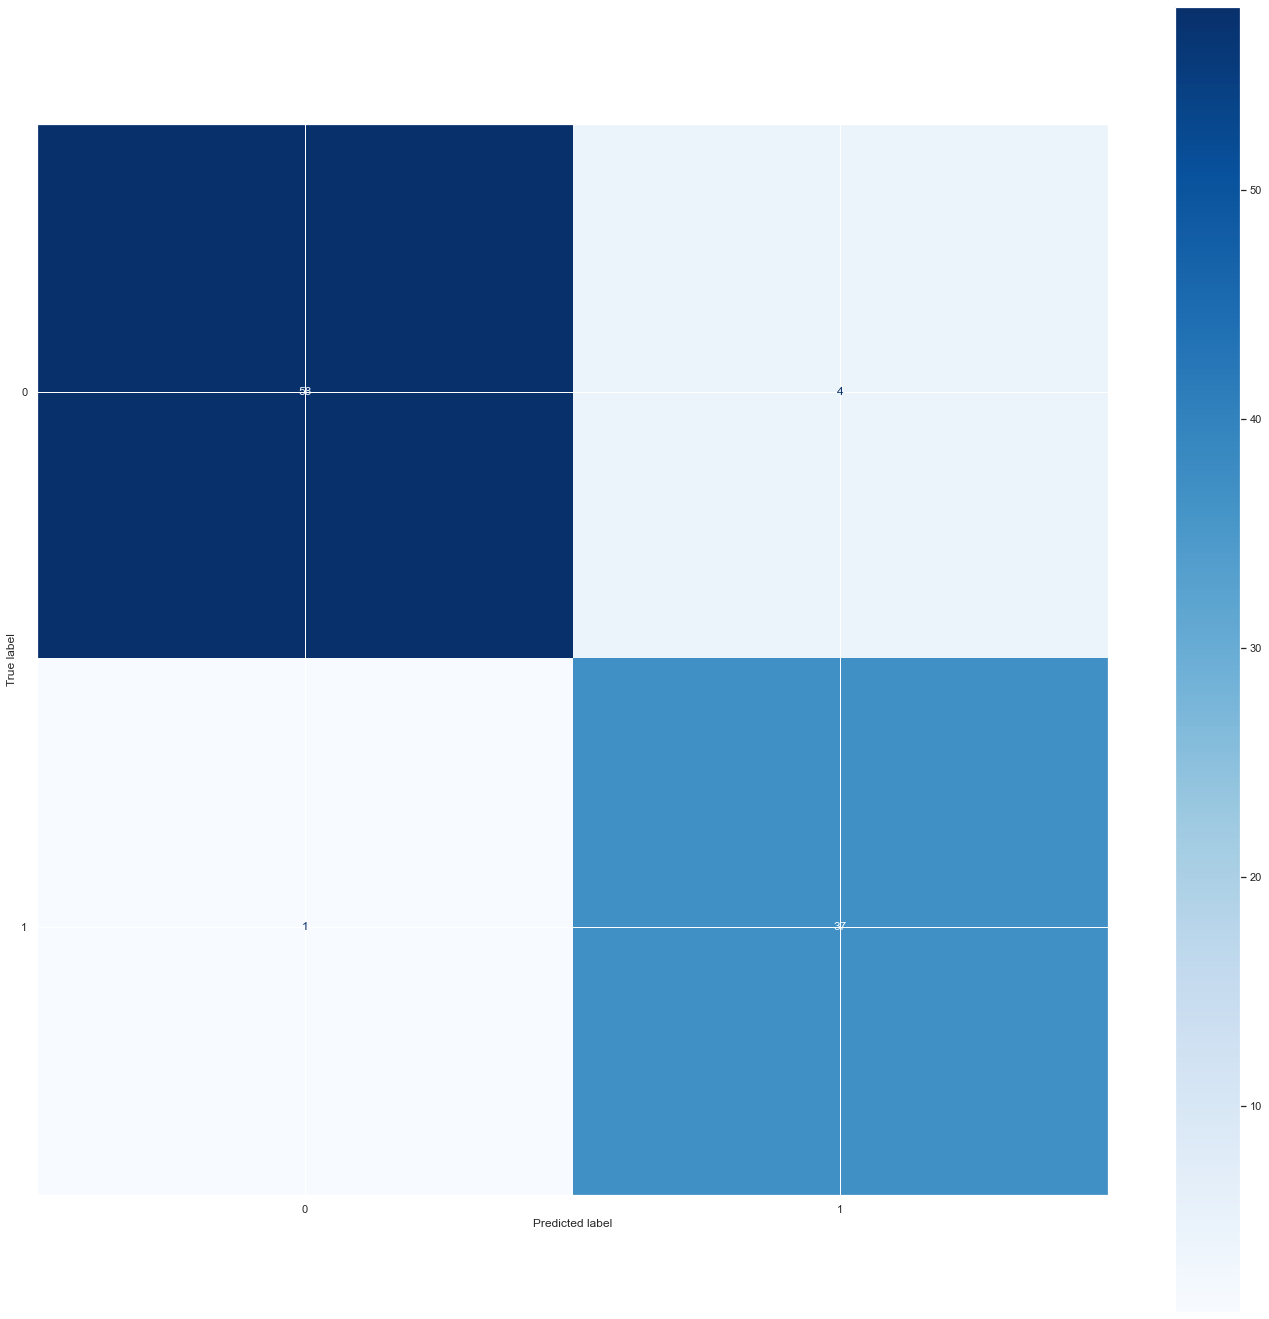

In [150]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_NB, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

# SVM with different Kernel

In [151]:
#Import SVC
from sklearn.svm import SVC

In [152]:
#train model
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [153]:
y_pred_svc_1 = svm.predict(X_test)

In [154]:
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.99
Accuracy of SVM classifier on test set: 0.99


In [155]:
#Model performance
from sklearn.metrics import classification_report
print(classification_report(y_pred_svc_1, y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        61
           1       1.00      0.97      0.99        39

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



#### Linear kernel

In [156]:
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred_svc_2 = svm.predict(X_test)
print(classification_report(y_pred_svc_2, y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        61
           1       1.00      0.97      0.99        39

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



#### Polynomial kernel

In [157]:
svm = SVC(kernel="poly")
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred_svc_3 = svm.predict(X_test)
print(classification_report(y_pred_svc_3, y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        61
           1       1.00      0.97      0.99        39

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



#### Sigmoid kernel

In [158]:
svm = SVC(kernel="sigmoid")
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred_svc_4 = svm.predict(X_test)
print(classification_report(y_pred_svc_4, y_test))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84        45
           1       1.00      0.69      0.82        55

    accuracy                           0.83       100
   macro avg       0.86      0.85      0.83       100
weighted avg       0.88      0.83      0.83       100



#### Gaussian RBF model

In [159]:
svm = SVC(kernel="rbf")
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred = svm.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        61
           1       1.00      0.97      0.99        39

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



#### Results SVM with different noyau

In [160]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

s1=accuracy_score(y_test, y_pred_svc_1)
s2=accuracy_score(y_test, y_pred_svc_2)
s3=accuracy_score(y_test, y_pred_svc_3)
s4=accuracy_score(y_test, y_pred_svc_4) 
s5=accuracy_score(y_test, y_pred)

models = pd.DataFrame({
    'Model': ['Support Vector Machines ', 'Support Vector Machines Linear','Support Vector Machines polynomial',
              'Support Vector Machines sigmoïd','Support Vector Machines RBF'],
    'Score': [s1,s2, s3, 
              s4,s5]})
models.sort_values(by="Score",ascending=False)

Model  Score
0            Support Vector Machines    0.99
1      Support Vector Machines Linear   0.99
2  Support Vector Machines polynomial   0.99
4         Support Vector Machines RBF   0.99
3     Support Vector Machines sigmoïd   0.83

### Logistic Regression

In [161]:
from sklearn.linear_model import LogisticRegression


In [162]:
logreg = LogisticRegression()

In [163]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [164]:
y_pred_rl = logreg.predict(X_test)

In [165]:
print('Accuracy of LR classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of LR classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of LR classifier on training set: 0.99
Accuracy of LR classifier on test set: 0.99


In [166]:
print(classification_report(y_test, y_pred_rl))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        62
           1       0.97      1.00      0.99        38

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



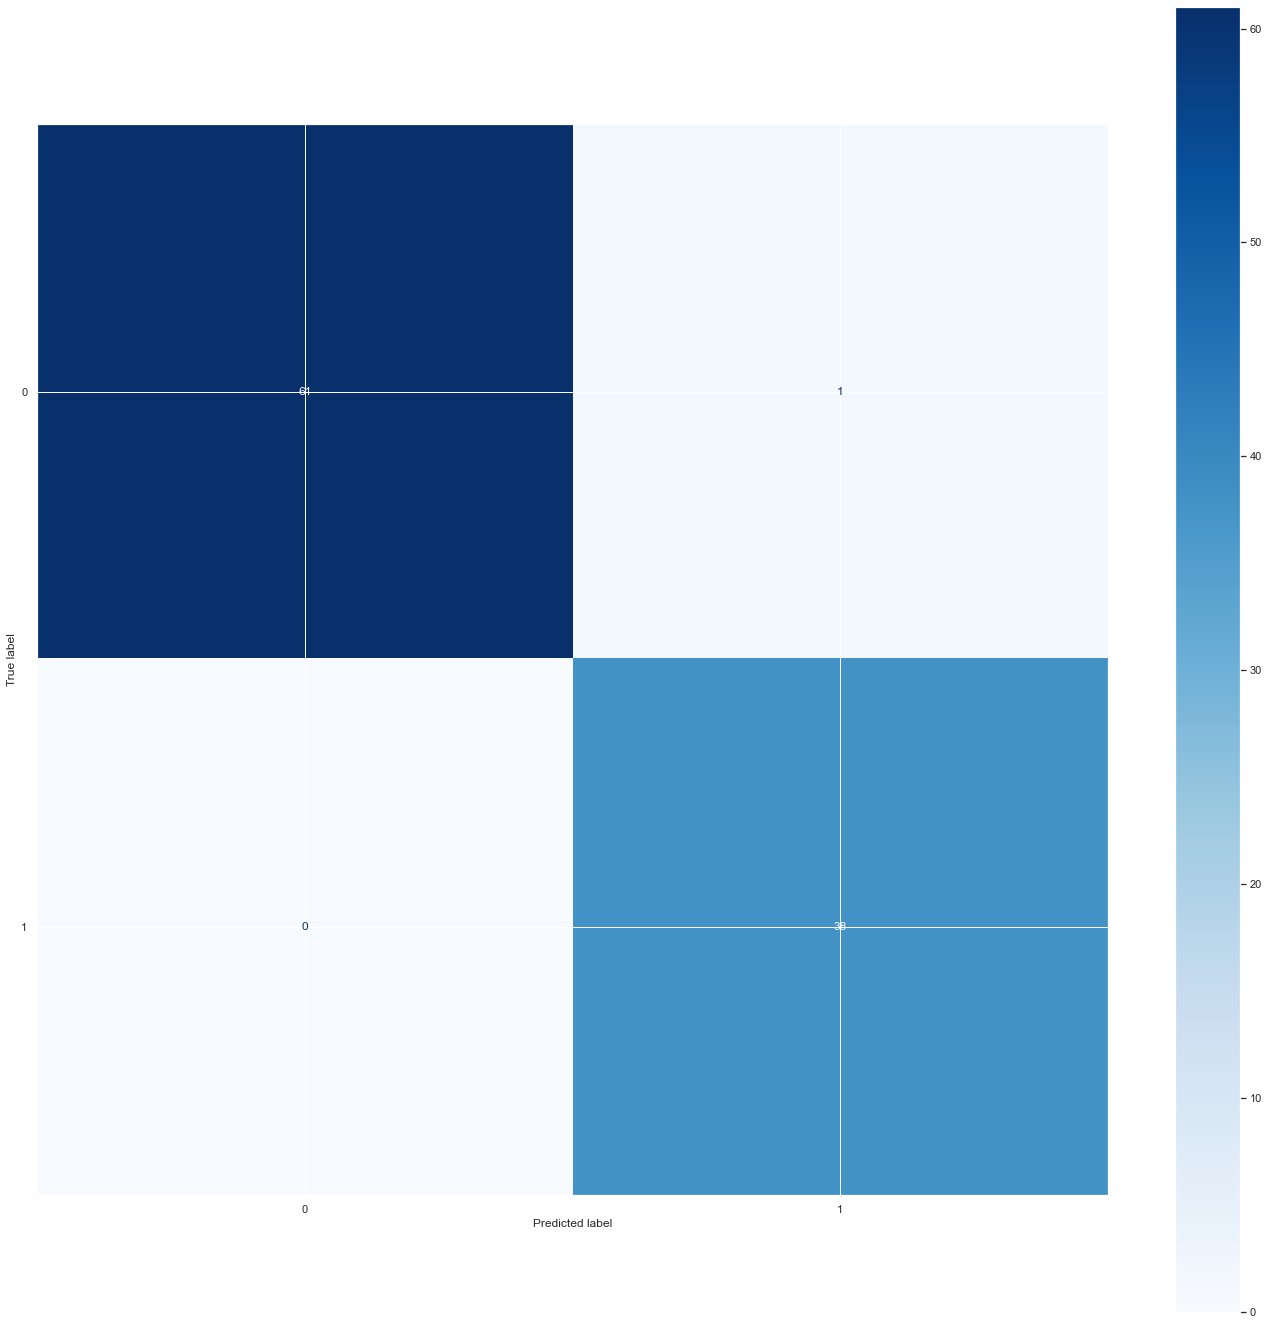

In [167]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

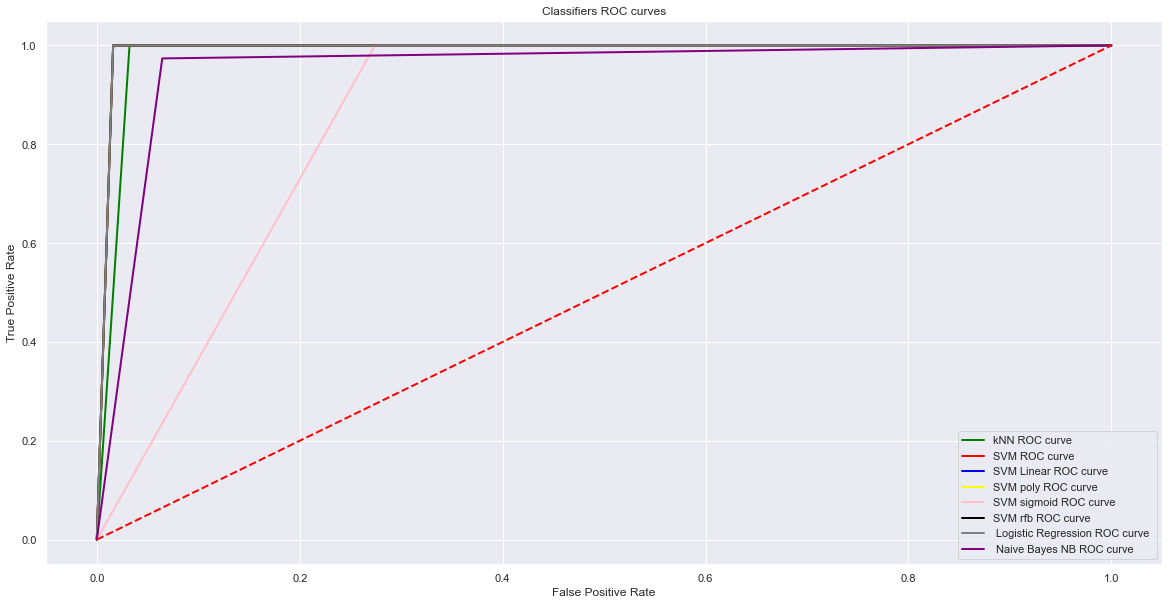

In [168]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
#KNN roc curve
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_knn, pos_label=1)
roc_auc1 = auc(fpr1, tpr1)
precision_knn, recall_knn, th_knn = precision_recall_curve(y_test, y_pred_knn, pos_label=1)
#SVM standard roc curve
fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred_svc_1, pos_label=1)
roc_auc2 = auc(fpr2, tpr2)
precision_knn, recall_knn, th_knn = precision_recall_curve(y_test, y_pred_svc_1, pos_label=1)

fpr3, tpr3, threshold3 = roc_curve(y_test, y_pred_svc_2, pos_label=1)
roc_auc3 = auc(fpr3, tpr3)
precision_knn, recall_knn, th_knn = precision_recall_curve(y_test, y_pred_svc_2, pos_label=1)

fpr4, tpr4, threshold4 = roc_curve(y_test, y_pred_svc_3, pos_label=1)
roc_auc4 = auc(fpr4, tpr4)
precision_knn, recall_knn, th_knn = precision_recall_curve(y_test, y_pred_svc_3, pos_label=1)

fpr5, tpr5, threshold5 = roc_curve(y_test, y_pred_svc_4, pos_label=1)
roc_auc5 = auc(fpr5, tpr5)
precision_knn, recall_knn, th_knn = precision_recall_curve(y_test, y_pred_svc_4, pos_label=1)

fpr6, tpr6, threshold6 = roc_curve(y_test, y_pred, pos_label=1)
roc_auc6 = auc(fpr6, tpr6)
precision_knn, recall_knn, th_knn = precision_recall_curve(y_test, y_pred, pos_label=1)

fpr7, tpr7, threshold7 = roc_curve(y_test, y_pred_rl, pos_label=1)
roc_auc7 = auc(fpr7, tpr7)
precision_knn, recall_knn, th_knn = precision_recall_curve(y_test, y_pred_rl, pos_label=1)

fpr8, tpr8, threshold8 = roc_curve(y_test, y_pred_NB, pos_label=1)
roc_auc8 = auc(fpr8, tpr8)
precision_knn, recall_knn, th_knn = precision_recall_curve(y_test, y_pred_NB, pos_label=1)

plt.figure(figsize=(20,10))

plt.plot(fpr1, tpr1, color='green', lw=2, label='kNN ROC curve'% roc_auc1)
plt.plot(fpr2, tpr2, color='red', lw=2, label='SVM ROC curve '% roc_auc2)
plt.plot(fpr3, tpr3, color='blue', lw=2, label='SVM Linear ROC curve '% roc_auc3)
plt.plot(fpr4, tpr3, color='yellow', lw=2, label='SVM poly ROC curve'% roc_auc4)
plt.plot(fpr5, tpr5, color='pink', lw=2, label='SVM sigmoid ROC curve '% roc_auc5)
plt.plot(fpr6, tpr6, color='black', lw=2, label='SVM rfb ROC curve '% roc_auc6)
plt.plot(fpr7, tpr7, color='gray', lw=2, label=' Logistic Regression ROC curve '% roc_auc7)
plt.plot(fpr8, tpr8, color='purple', lw=2, label=' Naive Bayes NB ROC curve '% roc_auc8)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classifiers ROC curves')
plt.legend(loc = "best")
plt.show()

In [169]:
#*****
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

s1=accuracy_score(y_test, y_pred_knn )
s2=accuracy_score(y_test, y_pred_svc_1)
s3=accuracy_score(y_test, y_pred_svc_2)
s4=accuracy_score(y_test, y_pred_svc_3)
s5=accuracy_score(y_test, y_pred_svc_4)
s6=accuracy_score(y_test, y_pred)
s7=accuracy_score(y_test,y_pred_rl)
s8=accuracy_score(y_test,y_pred_NB)
models = pd.DataFrame({
    'Model': ['KNN','svm','svm linear kernel','svm polynomial kernel','svm sigmoid kernel',
              'svm rbf kernel','logistic regression','Naive Bayes NB'],
    'Score': [s1,s2, s3, s4, s5, s6,s7,s8]})
models.sort_values(by="Score",ascending=False)

Model  Score
1                    svm   0.99
2      svm linear kernel   0.99
3  svm polynomial kernel   0.99
5         svm rbf kernel   0.99
6    logistic regression   0.99
0                    KNN   0.98
7         Naive Bayes NB   0.95
4     svm sigmoid kernel   0.83

# Model Ensembliste

## DecisionTree

In [170]:
from sklearn.tree import DecisionTreeClassifier

In [171]:
dt = DecisionTreeClassifier(random_state=0)

In [172]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [173]:
print('Le train score est :', dt.score(X_train, y_train))
print('Le test score est :', dt.score(X_test, y_test))

Le train score est : 1.0
Le test score est : 0.98


In [174]:
y_pred_dt = dt.predict(X_test)


In [175]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        62
           1       1.00      0.95      0.97        38

    accuracy                           0.98       100
   macro avg       0.98      0.97      0.98       100
weighted avg       0.98      0.98      0.98       100



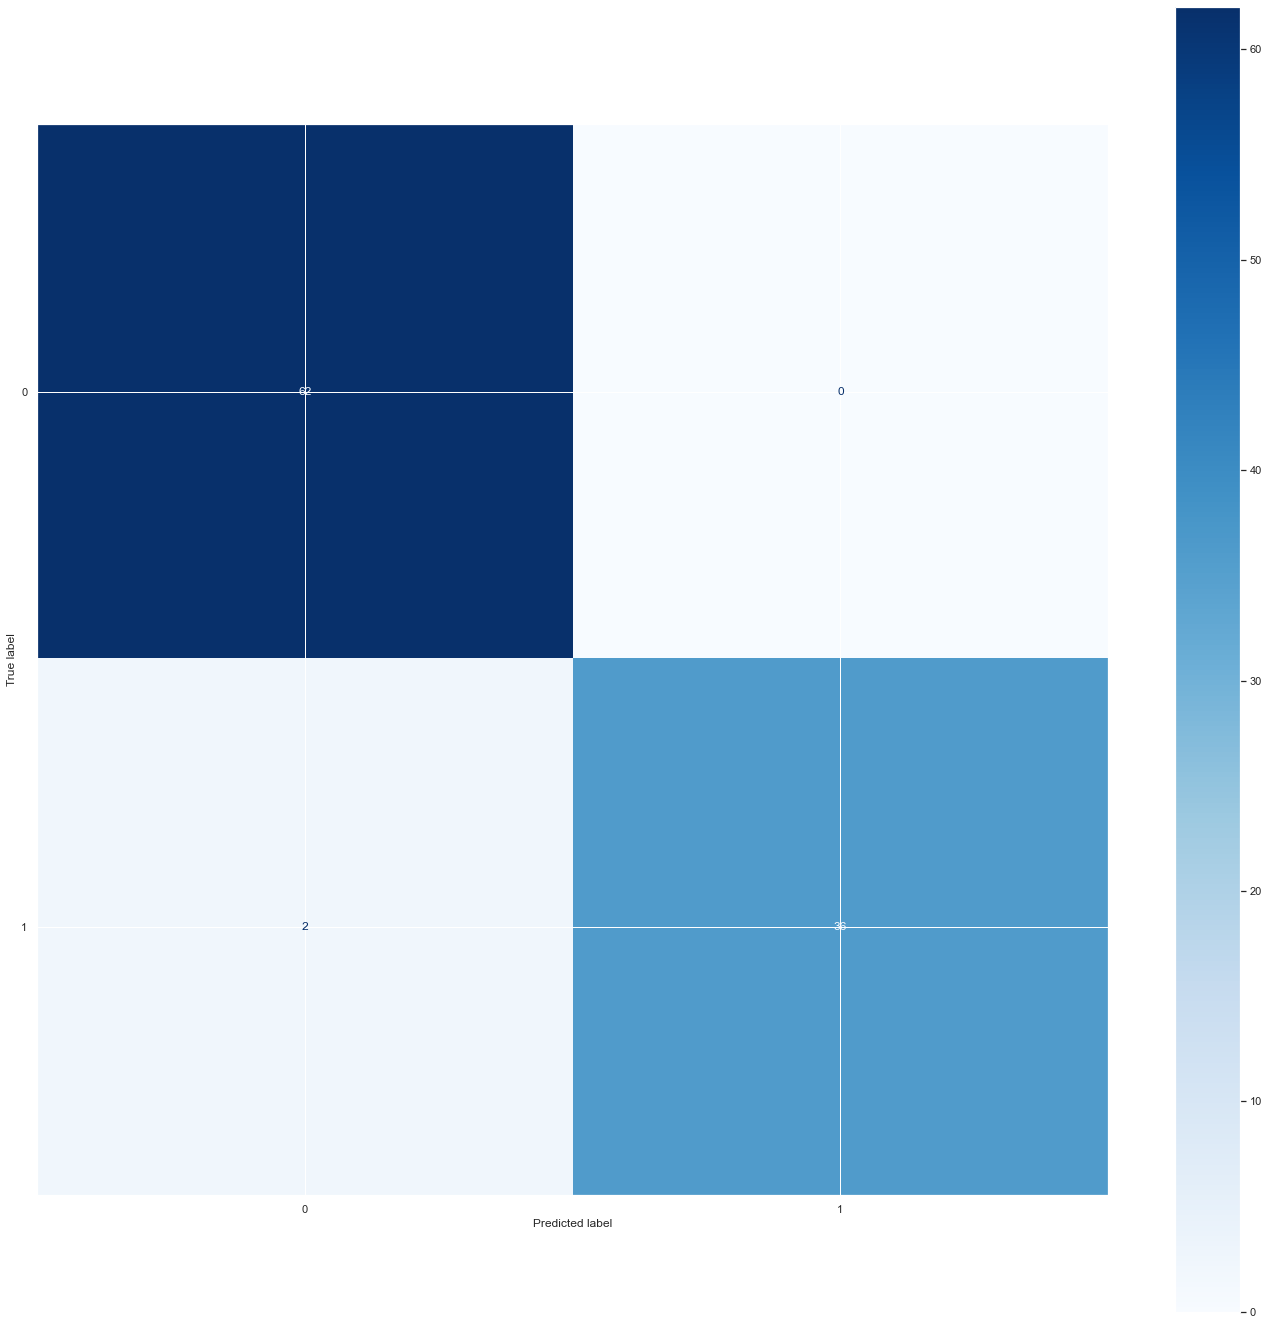

In [176]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

## Random Forest

In [177]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=100,random_state=0)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=100, random_state=0)

In [178]:
ypred_RF=clf.predict(X_test)

In [179]:
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.99


In [180]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_RF))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        62
           1       0.97      1.00      0.99        38

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



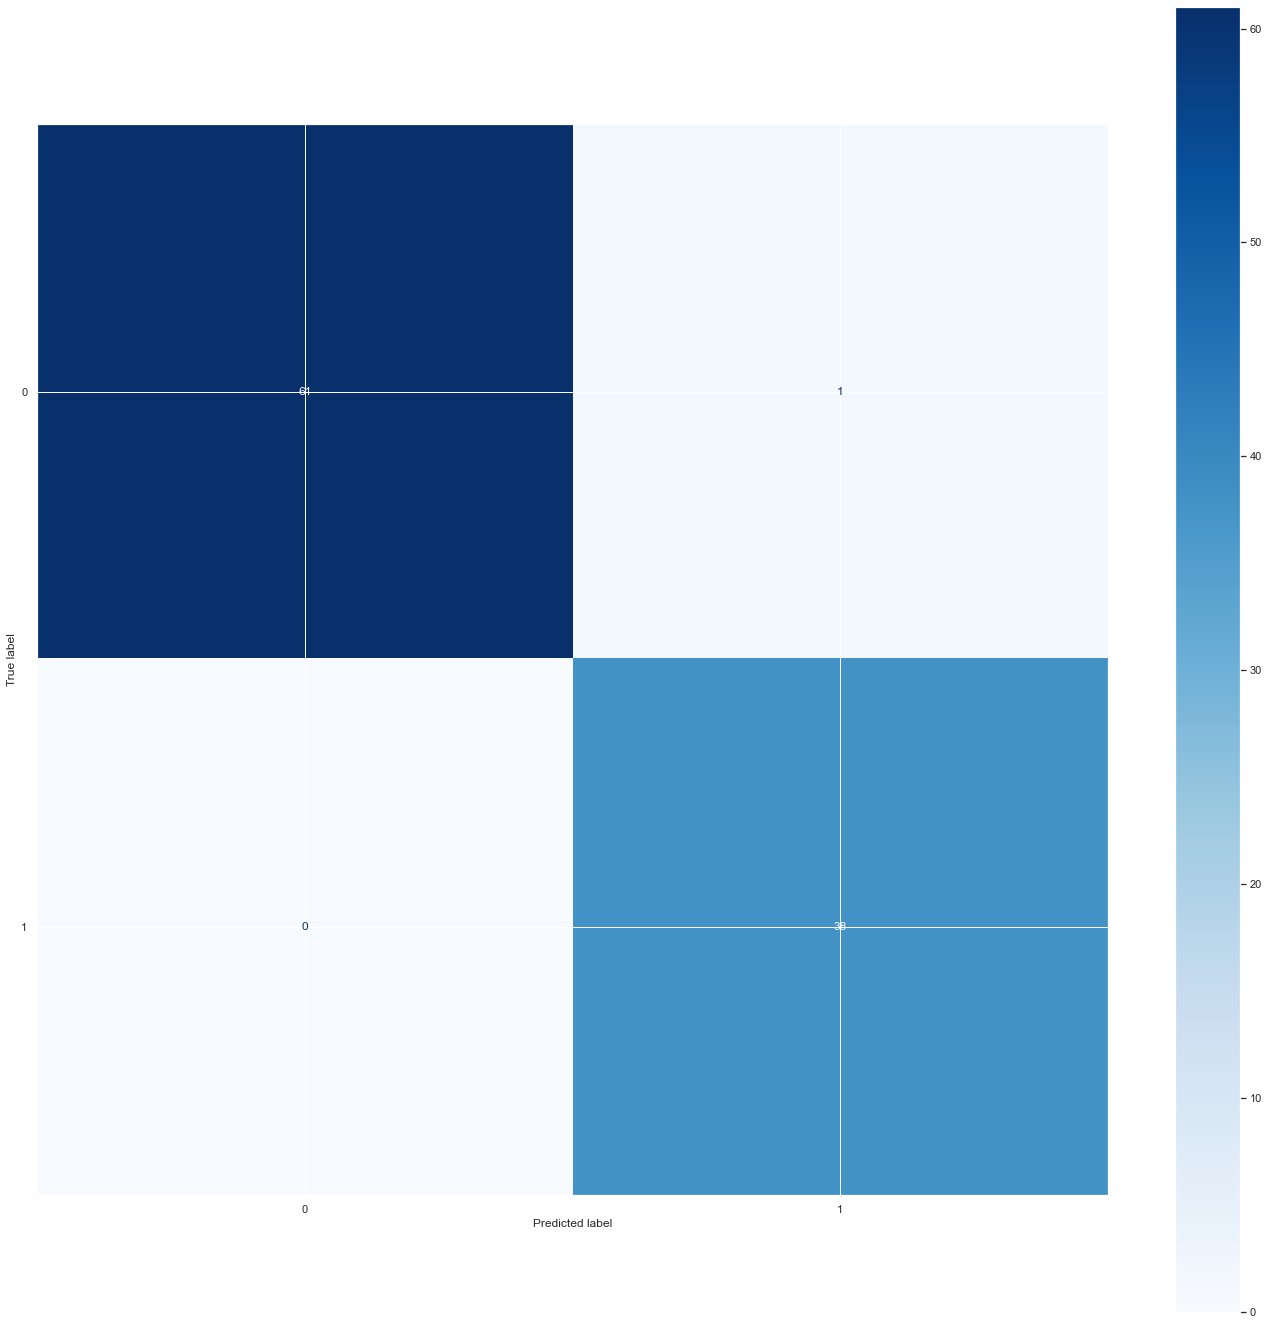

In [181]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

## Adaboost

In [182]:
from sklearn.ensemble import AdaBoostClassifier

In [183]:
ad = AdaBoostClassifier(n_estimators=1) #base_estimator=dt2
ad.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1)

In [184]:
y_predad = ad.predict(X_test)

In [185]:
print('Accuracy of Adaboost classifier on training set: {:.2f}'
     .format(ad.score(X_train, y_train)))
print('Accuracy of Adaboost classifier on test set: {:.2f}'
     .format(ad.score(X_test, y_test)))

Accuracy of Adaboost classifier on training set: 0.91
Accuracy of Adaboost classifier on test set: 0.90


In [186]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predad))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        62
           1       0.85      0.89      0.87        38

    accuracy                           0.90       100
   macro avg       0.89      0.90      0.89       100
weighted avg       0.90      0.90      0.90       100



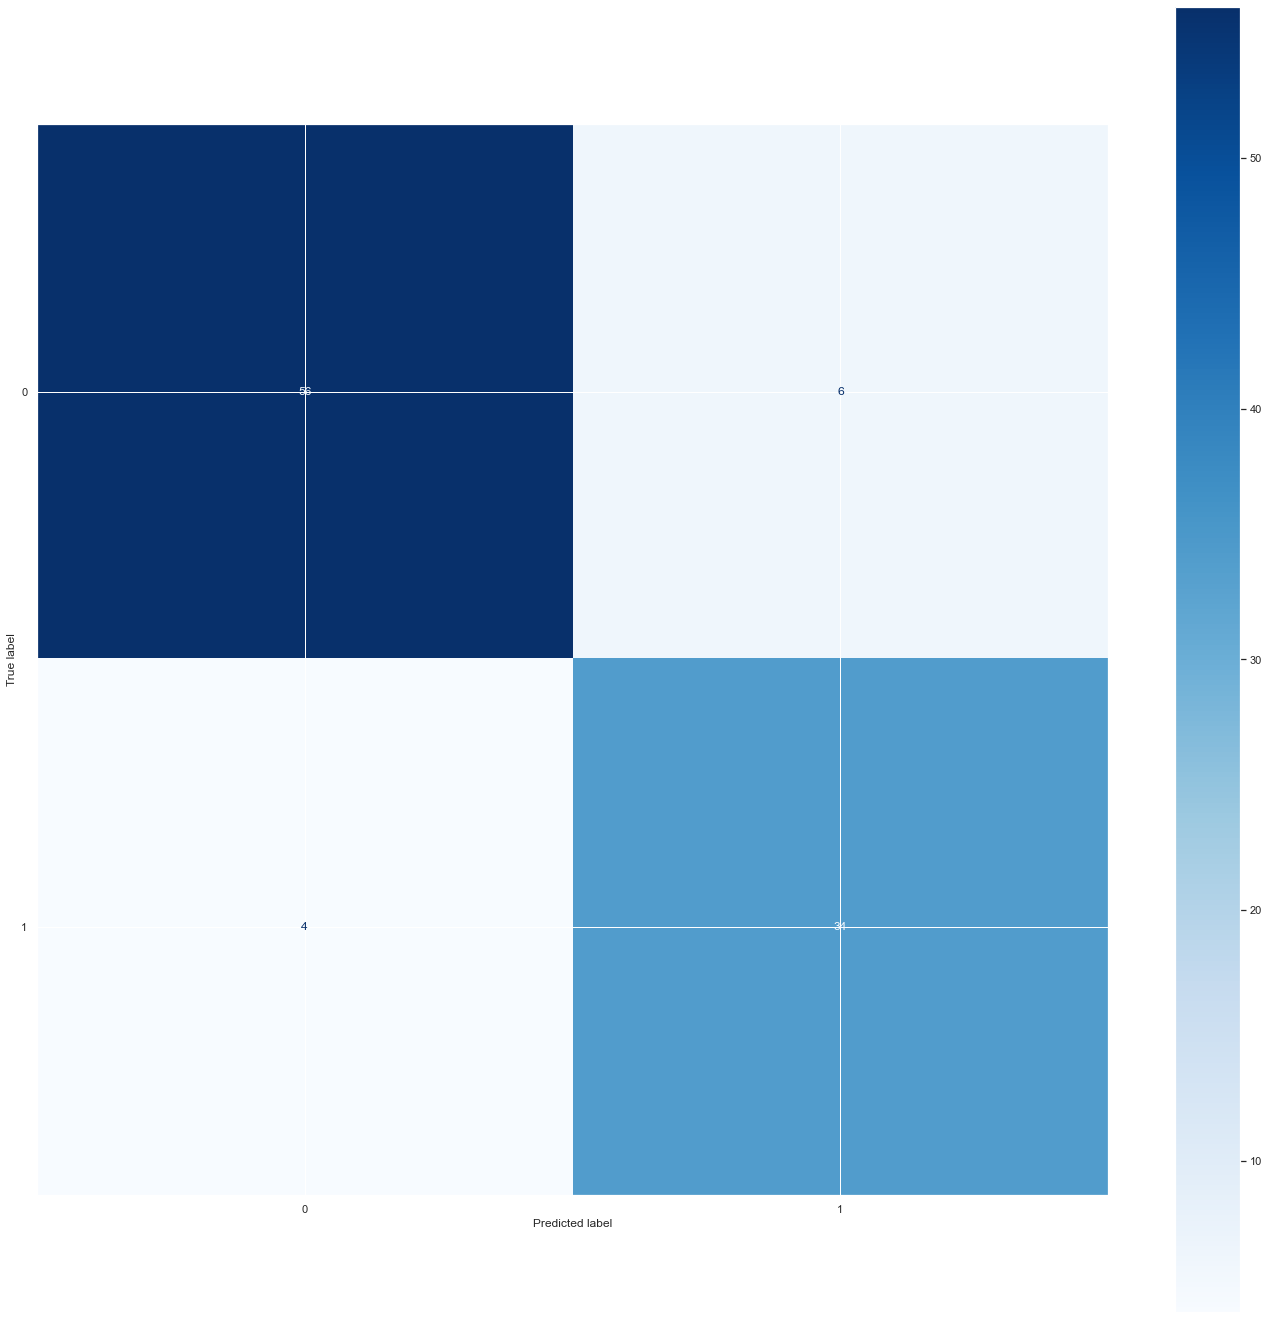

In [187]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(ad, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

## Adaboost with DecisionTree

In [188]:
adDT = AdaBoostClassifier(base_estimator=dt) 
adDT.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=0))

In [189]:
y_predadDT = adDT.predict(X_test)

In [190]:
print('Accuracy of Adaboost classifier on training set: {:.2f}'
     .format(adDT.score(X_train, y_train)))
print('Accuracy of Adaboost classifier on test set: {:.2f}'
     .format(adDT.score(X_test, y_test)))

Accuracy of Adaboost classifier on training set: 1.00
Accuracy of Adaboost classifier on test set: 0.98


In [191]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predadDT))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        62
           1       0.97      0.97      0.97        38

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



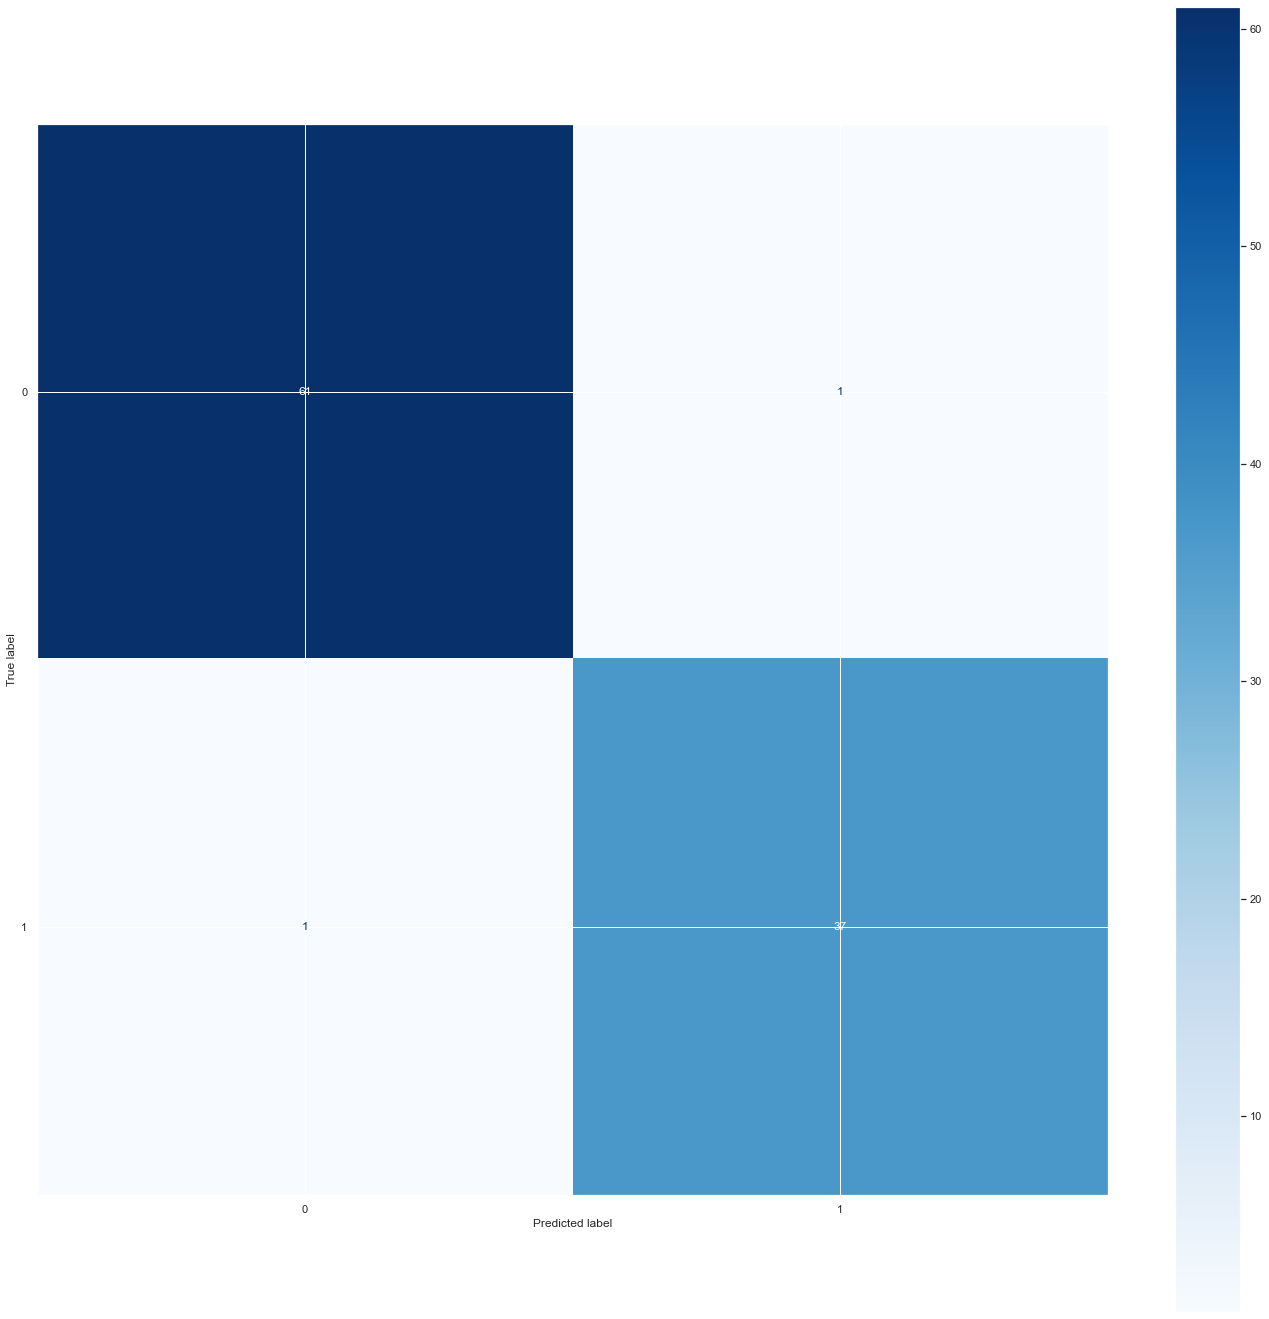

In [192]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(adDT, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

## Adaboost with RandomForest

In [193]:
adRF = AdaBoostClassifier(base_estimator=clf) 
adRF.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=100,
                                                         random_state=0))

In [194]:
y_predadRF = adRF.predict(X_test)

In [195]:
print('Accuracy of Adaboost classifier on training set: {:.2f}'
     .format(adRF.score(X_train, y_train)))
print('Accuracy of Adaboost classifier on test set: {:.2f}'
     .format(adRF.score(X_test, y_test)))

Accuracy of Adaboost classifier on training set: 1.00
Accuracy of Adaboost classifier on test set: 0.99


In [196]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predadRF))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        62
           1       0.97      1.00      0.99        38

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



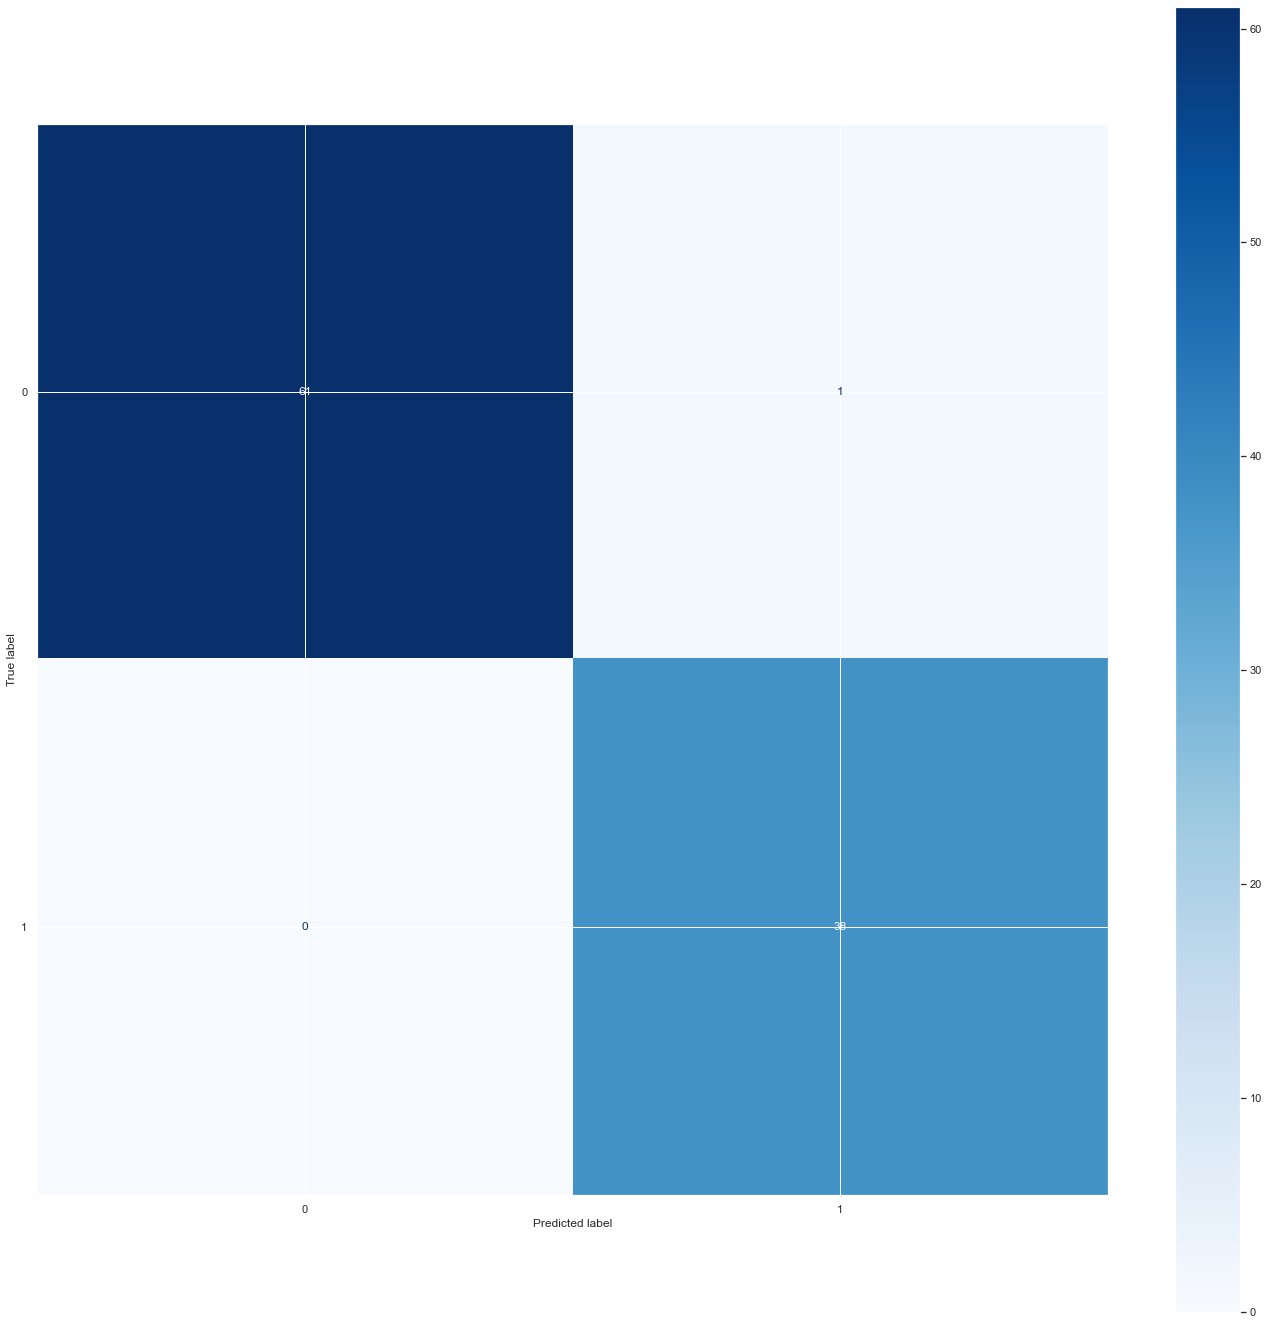

In [197]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(adRF, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

## Xgboost

In [198]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [199]:
import xgboost as xgb
from xgboost import XGBClassifier

In [200]:
xgb_cl = xgb.XGBClassifier()
print(type(xgb_cl))

<class 'xgboost.sklearn.XGBClassifier'>


In [201]:
xgb_cl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [202]:
preds = xgb_cl.predict(X_test)

In [203]:
print('Accuracy of Xgboost classifier on training set: {:.2f}'
     .format(xgb_cl.score(X_train, y_train)))
print('Accuracy of Xgboost classifier on test set: {:.2f}'
     .format(xgb_cl.score(X_test, y_test)))

Accuracy of Xgboost classifier on training set: 1.00
Accuracy of Xgboost classifier on test set: 0.98


In [204]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        62
           1       0.97      0.97      0.97        38

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



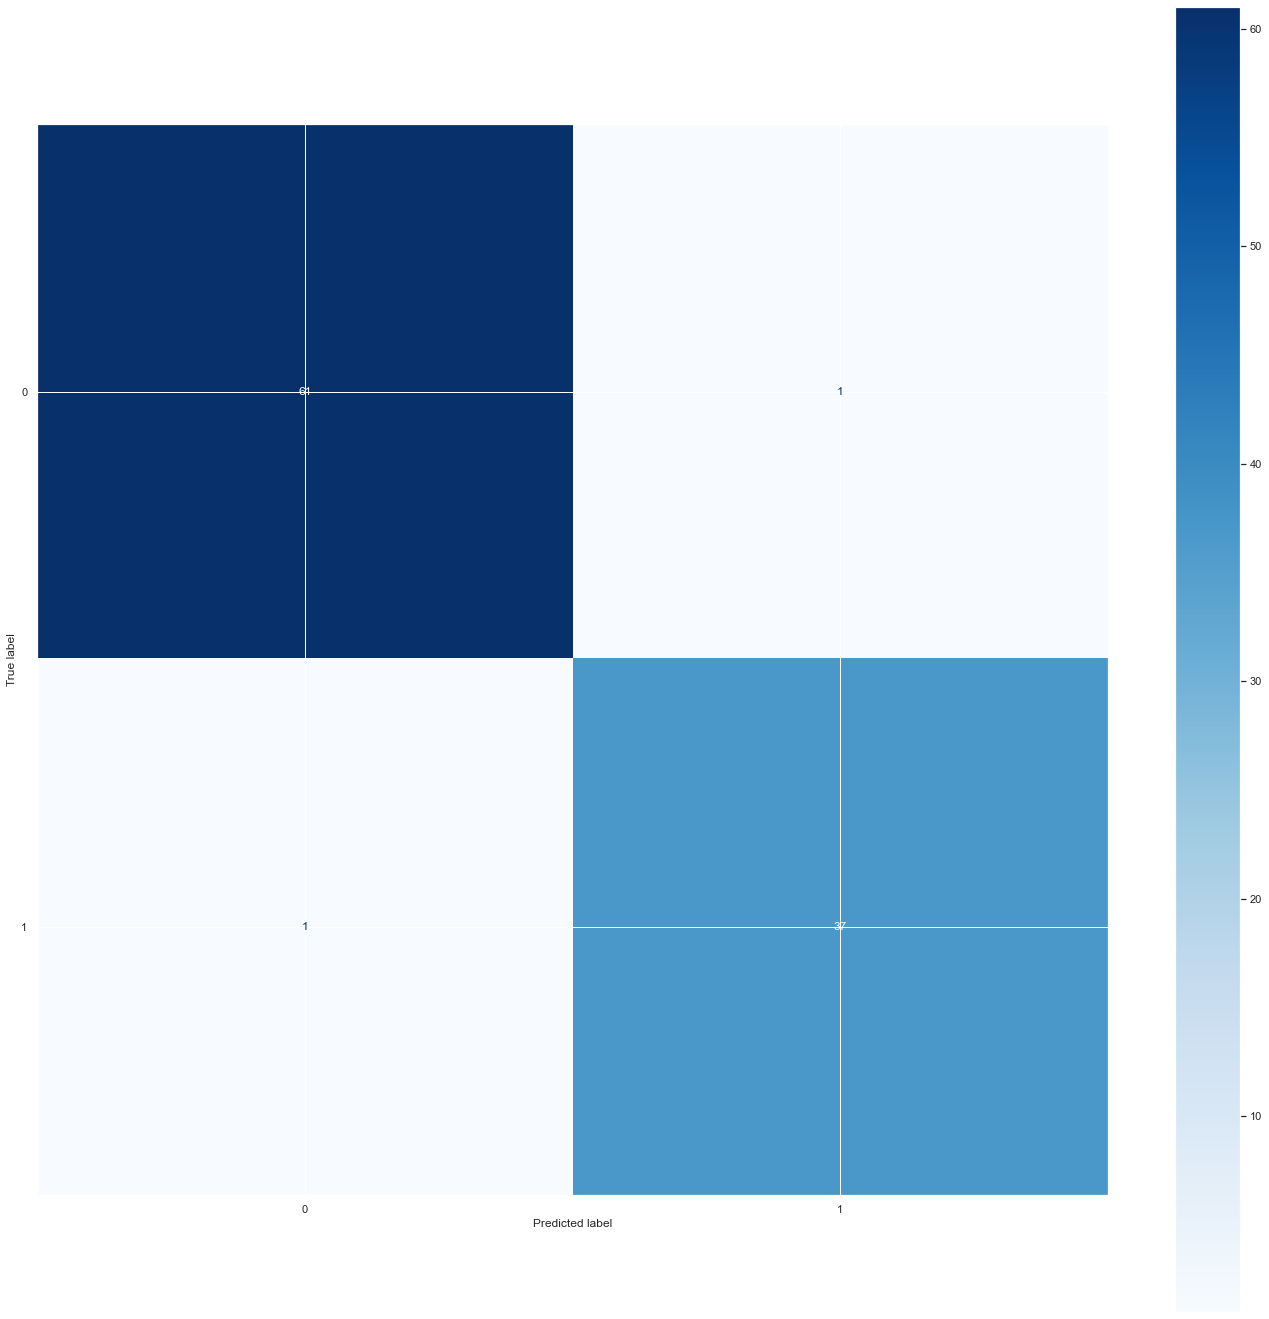

In [205]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb_cl, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

## Catboost

In [206]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [207]:
from catboost import CatBoostClassifier

In [208]:
cat = CatBoostClassifier()

In [209]:
cat.fit(X_train, y_train)

Learning rate set to 0.006161
0:	learn: 0.6824838	total: 148ms	remaining: 2m 27s
1:	learn: 0.6725023	total: 150ms	remaining: 1m 14s
2:	learn: 0.6607084	total: 152ms	remaining: 50.6s
3:	learn: 0.6538395	total: 154ms	remaining: 38.4s
4:	learn: 0.6436092	total: 156ms	remaining: 31s
5:	learn: 0.6334746	total: 157ms	remaining: 26.1s
6:	learn: 0.6241138	total: 159ms	remaining: 22.6s
7:	learn: 0.6151803	total: 161ms	remaining: 19.9s
8:	learn: 0.6066435	total: 163ms	remaining: 17.9s
9:	learn: 0.5985057	total: 165ms	remaining: 16.3s
10:	learn: 0.5908769	total: 166ms	remaining: 14.9s
11:	learn: 0.5830922	total: 168ms	remaining: 13.8s
12:	learn: 0.5749800	total: 169ms	remaining: 12.8s
13:	learn: 0.5668447	total: 171ms	remaining: 12s
14:	learn: 0.5584856	total: 172ms	remaining: 11.3s
15:	learn: 0.5492034	total: 174ms	remaining: 10.7s
16:	learn: 0.5417211	total: 175ms	remaining: 10.1s
17:	learn: 0.5357221	total: 177ms	remaining: 9.64s
18:	learn: 0.5291215	total: 179ms	remaining: 9.22s
19:	learn: 0.

247:	learn: 0.0690637	total: 506ms	remaining: 1.53s
248:	learn: 0.0687462	total: 507ms	remaining: 1.53s
249:	learn: 0.0684331	total: 509ms	remaining: 1.52s
250:	learn: 0.0681055	total: 510ms	remaining: 1.52s
251:	learn: 0.0677793	total: 511ms	remaining: 1.52s
252:	learn: 0.0673966	total: 513ms	remaining: 1.51s
253:	learn: 0.0670287	total: 514ms	remaining: 1.51s
254:	learn: 0.0668141	total: 515ms	remaining: 1.5s
255:	learn: 0.0663906	total: 517ms	remaining: 1.5s
256:	learn: 0.0660040	total: 518ms	remaining: 1.5s
257:	learn: 0.0655914	total: 520ms	remaining: 1.49s
258:	learn: 0.0652257	total: 521ms	remaining: 1.49s
259:	learn: 0.0650095	total: 522ms	remaining: 1.49s
260:	learn: 0.0646618	total: 524ms	remaining: 1.48s
261:	learn: 0.0643352	total: 525ms	remaining: 1.48s
262:	learn: 0.0640072	total: 527ms	remaining: 1.48s
263:	learn: 0.0636815	total: 528ms	remaining: 1.47s
264:	learn: 0.0633601	total: 529ms	remaining: 1.47s
265:	learn: 0.0632368	total: 530ms	remaining: 1.46s
266:	learn: 0.0

508:	learn: 0.0249934	total: 858ms	remaining: 828ms
509:	learn: 0.0249169	total: 860ms	remaining: 826ms
510:	learn: 0.0248494	total: 861ms	remaining: 824ms
511:	learn: 0.0247830	total: 863ms	remaining: 822ms
512:	learn: 0.0247071	total: 864ms	remaining: 820ms
513:	learn: 0.0246436	total: 865ms	remaining: 818ms
514:	learn: 0.0245682	total: 867ms	remaining: 816ms
515:	learn: 0.0245009	total: 868ms	remaining: 814ms
516:	learn: 0.0244086	total: 870ms	remaining: 812ms
517:	learn: 0.0243429	total: 871ms	remaining: 811ms
518:	learn: 0.0242767	total: 872ms	remaining: 809ms
519:	learn: 0.0241738	total: 874ms	remaining: 807ms
520:	learn: 0.0241205	total: 875ms	remaining: 805ms
521:	learn: 0.0240615	total: 877ms	remaining: 803ms
522:	learn: 0.0240029	total: 878ms	remaining: 801ms
523:	learn: 0.0239320	total: 879ms	remaining: 799ms
524:	learn: 0.0238514	total: 881ms	remaining: 797ms
525:	learn: 0.0237702	total: 882ms	remaining: 795ms
526:	learn: 0.0237065	total: 883ms	remaining: 793ms
527:	learn: 

772:	learn: 0.0133501	total: 1.23s	remaining: 363ms
773:	learn: 0.0133197	total: 1.24s	remaining: 361ms
774:	learn: 0.0132919	total: 1.24s	remaining: 359ms
775:	learn: 0.0132613	total: 1.24s	remaining: 358ms
776:	learn: 0.0132378	total: 1.24s	remaining: 356ms
777:	learn: 0.0132135	total: 1.24s	remaining: 355ms
778:	learn: 0.0131842	total: 1.24s	remaining: 353ms
779:	learn: 0.0131594	total: 1.25s	remaining: 351ms
780:	learn: 0.0131487	total: 1.25s	remaining: 350ms
781:	learn: 0.0131169	total: 1.25s	remaining: 348ms
782:	learn: 0.0130733	total: 1.25s	remaining: 347ms
783:	learn: 0.0130471	total: 1.25s	remaining: 345ms
784:	learn: 0.0130151	total: 1.25s	remaining: 343ms
785:	learn: 0.0129905	total: 1.25s	remaining: 342ms
786:	learn: 0.0129668	total: 1.26s	remaining: 340ms
787:	learn: 0.0129426	total: 1.26s	remaining: 338ms
788:	learn: 0.0129181	total: 1.26s	remaining: 337ms
789:	learn: 0.0128928	total: 1.26s	remaining: 335ms
790:	learn: 0.0128493	total: 1.26s	remaining: 334ms
791:	learn: 

In [210]:
ypred_cat = cat.predict(X_test)

In [211]:
print('Accuracy of Xgboost classifier on training set: {:.2f}'
     .format(cat.score(X_train, y_train)))
print('Accuracy of Xgboost classifier on test set: {:.2f}'
     .format(cat.score(X_test, y_test)))

Accuracy of Xgboost classifier on training set: 1.00
Accuracy of Xgboost classifier on test set: 1.00


In [212]:
print(classification_report(y_test, ypred_cat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        38

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



<Figure size 480x480 with 0 Axes>

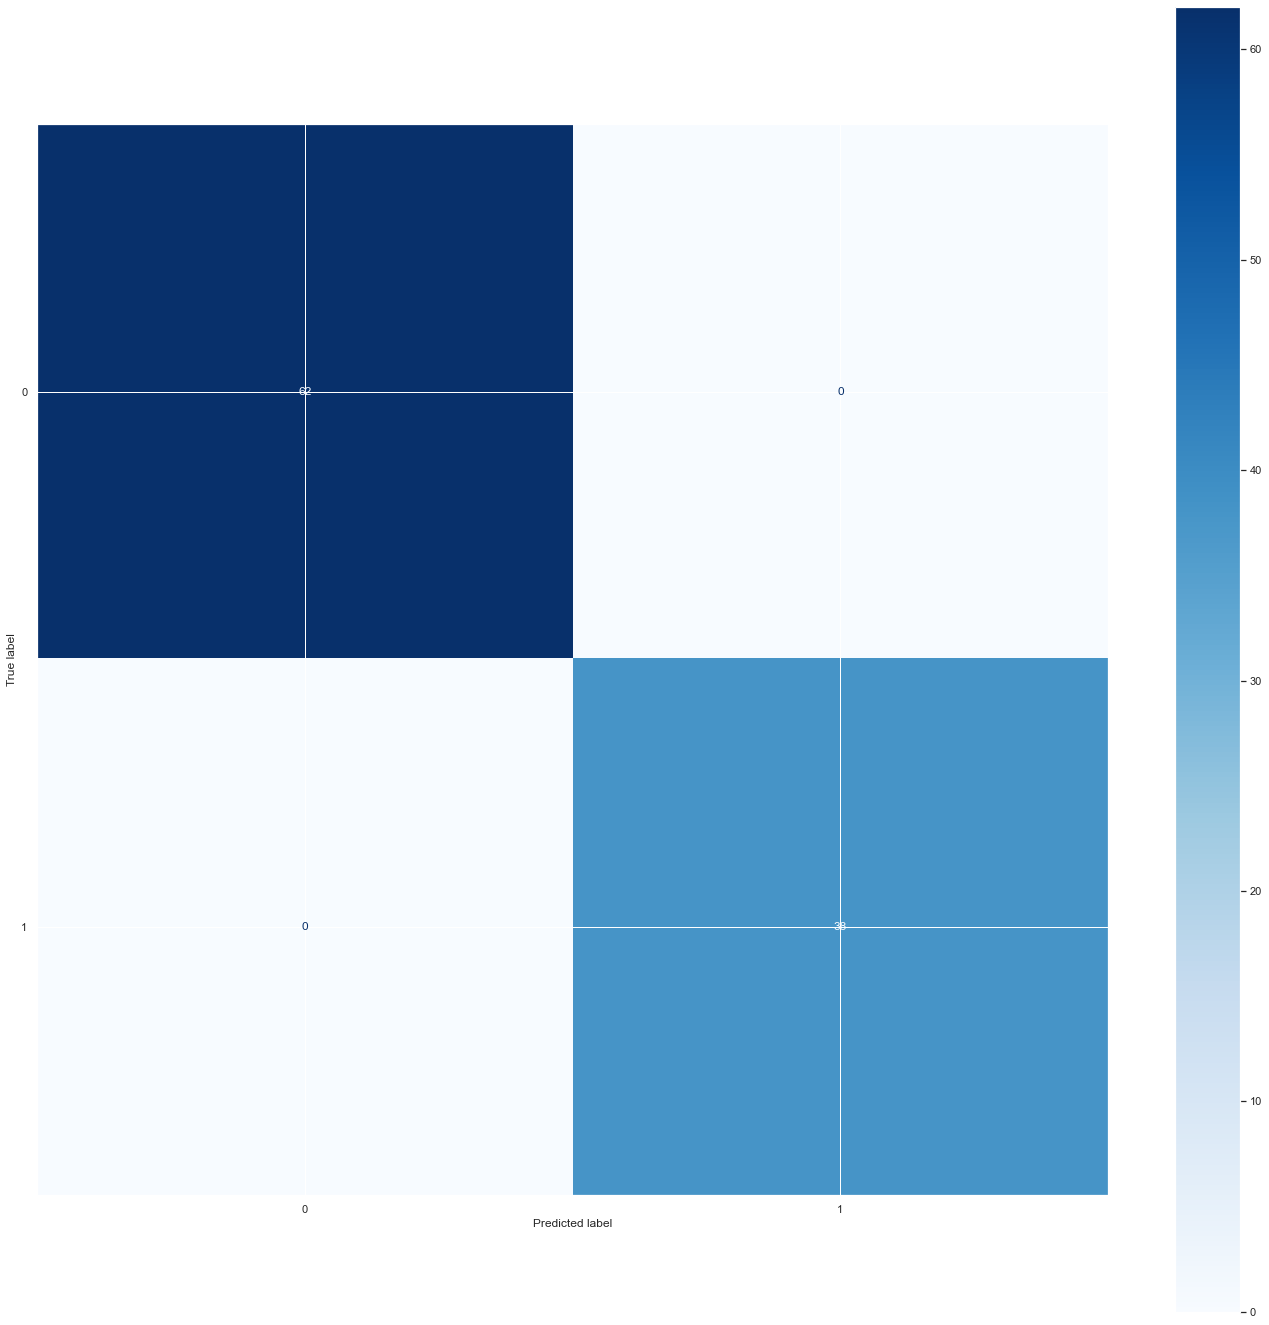

In [213]:
from sklearn.metrics import plot_confusion_matrix
from matplotlib.pyplot import figure
figure(figsize=(6, 6), dpi=80)
plot_confusion_matrix(cat, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

### ROC curve

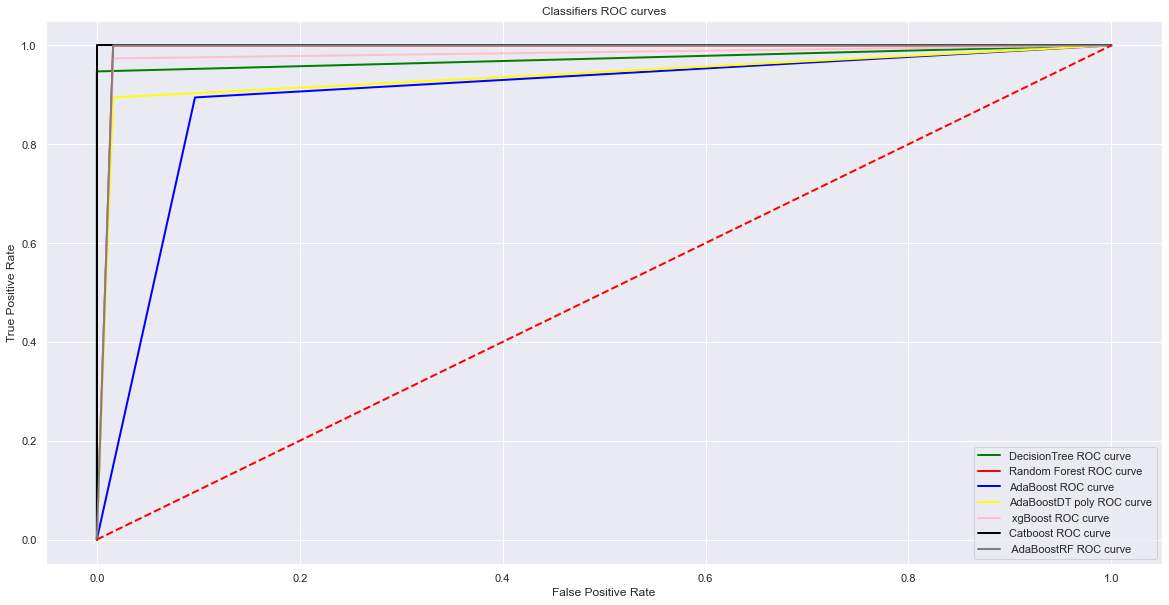

In [214]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_dt, pos_label=1)
roc_auc1 = auc(fpr1, tpr1)
precision_dt, recall_dt, th_dt = precision_recall_curve(y_test, y_pred_dt, pos_label=1)

fpr2, tpr2, threshold2 = roc_curve(y_test, ypred_RF, pos_label=1)
roc_auc2 = auc(fpr2, tpr2)
precision_RF, recall_RF, th_RF = precision_recall_curve(y_test, ypred_RF, pos_label=1)

fpr3, tpr3, threshold3 = roc_curve(y_test, y_predad, pos_label=1)
roc_auc3 = auc(fpr3, tpr3)
precision_ad, recall_ad, th_ad = precision_recall_curve(y_test, y_predad, pos_label=1)

fpr4, tpr4, threshold4 = roc_curve(y_test, y_predadDT, pos_label=1)
roc_auc4 = auc(fpr4, tpr4)
precision_DT, recall_DT, th_DT = precision_recall_curve(y_test, y_predadDT, pos_label=1)

fpr5, tpr5, threshold5 = roc_curve(y_test, preds, pos_label=1)
roc_auc5 = auc(fpr5, tpr5)
precision_preds, recall_preds, th_preds = precision_recall_curve(y_test, preds, pos_label=1)

fpr6, tpr6, threshold6 = roc_curve(y_test, ypred_cat, pos_label=1)
roc_auc6 = auc(fpr6, tpr6)
precision_cat, recall_cat, th_cat = precision_recall_curve(y_test, ypred_cat, pos_label=1)

fpr7, tpr7, threshold7 = roc_curve(y_test, y_predadRF, pos_label=1)
roc_auc7 = auc(fpr7, tpr7)
precision_adRF, recall_adRF, th_adRF = precision_recall_curve(y_test, y_predadRF, pos_label=1)



plt.figure(figsize=(20,10))

plt.plot(fpr1, tpr1, color='green', lw=2, label='DecisionTree ROC curve'% roc_auc1)
plt.plot(fpr2, tpr2, color='red', lw=2, label='Random Forest ROC curve '% roc_auc2)
plt.plot(fpr3, tpr3, color='blue', lw=2, label='AdaBoost ROC curve '% roc_auc3)
plt.plot(fpr4, tpr3, color='yellow', lw=2, label='AdaBoostDT poly ROC curve'% roc_auc4)
plt.plot(fpr5, tpr5, color='pink', lw=2, label=' xgBoost ROC curve '% roc_auc5)
plt.plot(fpr6, tpr6, color='black', lw=2, label='Catboost ROC curve '% roc_auc6)
plt.plot(fpr7, tpr7, color='gray', lw=2, label=' AdaBoostRF ROC curve '% roc_auc7)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classifiers ROC curves')
plt.legend(loc = "best")
plt.show()

### Precision vs. Recall

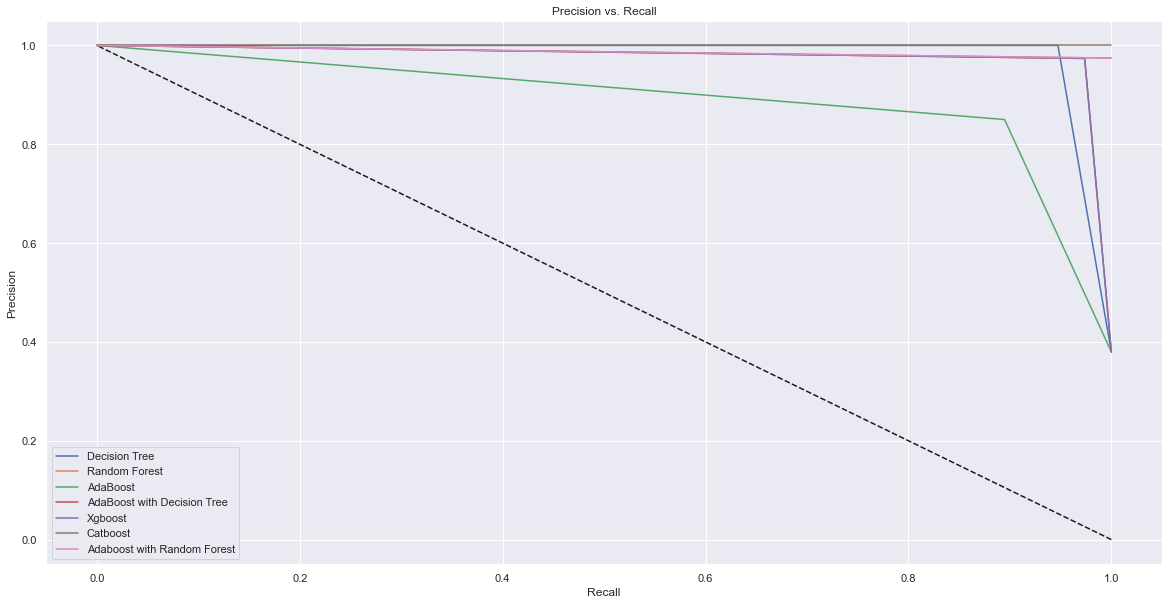

In [215]:
plt.figure(figsize=(20,10))
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(recall_dt, precision_dt, label='Decision Tree')
plt.plot(recall_RF, precision_RF, label='Random Forest')
plt.plot(recall_ad, precision_ad, label='AdaBoost')
plt.plot(recall_DT, precision_DT, label='AdaBoost with Decision Tree')
plt.plot(recall_preds, precision_preds, label='Xgboost')
plt.plot(recall_cat, precision_cat, label='Catboost')
plt.plot(recall_adRF, precision_adRF, label='Adaboost with Random Forest')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

In [216]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

s1=accuracy_score(y_test, y_pred_dt )
s2=accuracy_score(y_test, ypred_RF)
s3=accuracy_score(y_test, y_predad)
s4=accuracy_score(y_test, y_predadDT)
s5=accuracy_score(y_test, preds)
s6=accuracy_score(y_test, ypred_cat)
s7=accuracy_score(y_test, y_predadRF)
models = pd.DataFrame({
    'Model': ['DecisionTree ','Random Forest','AdaBoost','AdaBoostDT','xgBoost',
              'Catboost','AdaBoostRF'],
    'Score': [s1,s2, s3, s4, s5, s6,s7]})
models.sort_values(by="Score",ascending=False)


Model  Score
5       Catboost   1.00
1  Random Forest   0.99
6     AdaBoostRF   0.99
0  DecisionTree    0.98
3     AdaBoostDT   0.98
4        xgBoost   0.98
2       AdaBoost   0.90

## feature selection: CFS method

Correlation-based Feature Selection

In [217]:
df2

age    bp  sg   al        su  rbc  pc  pcc  ba         bgr  ...   pcv  \
0    48.0  80.0   3  1.0       0.0    1   1    0   0       121.0  ...  44.0   
1     9.0  55.0   3  4.0       0.0    1   1    0   0  148.036517  ...  38.0   
2    62.0  80.0   1  2.0  1.125356    1   1    0   0       223.5  ...  31.0   
3    48.0  70.0   0  4.0       0.0    1   0    1   0       117.0  ...  32.0   
4    51.0  80.0   1  2.0       0.0    1   1    0   0       106.0  ...  35.0   
..    ...   ...  ..  ...       ...  ...  ..  ...  ..         ...  ...   ...   
395  55.0  80.0   3  0.0       0.0    1   1    0   0       140.0  ...  47.0   
396  42.0  70.0   4  0.0       0.0    1   1    0   0        75.0  ...  54.0   
397  12.0  80.0   3  0.0       0.0    1   1    0   0       100.0  ...  49.0   
398  17.0  60.0   4  0.0       0.0    1   1    0   0       114.0  ...  51.0   
399  58.0  80.0   4  0.0       0.0    1   1    0   0       131.0  ...  53.0   

       wbcc      rbcc htn dm cad appet pe  ane  class  
0    7800.0       5.2   1  1   0     0  1    0      0  
1    6000.0  4.699184   0  0   0     0  1    0      0  
2    7500.0  4.699184   0  1   0     2  1    1      0  
3    6700.0       3.9   1  0   0     2  2    1      0  
4    7300.0       4.6   0  0   0     0  1    0      0  
..      ...       ...  .. ..  ..   ... ..  ...    ...  
395  6700.0       4.9   0  0   0     0  1    0      1  
396  7800.0       5.5   0  0   0     0  1    0      1  
397  6600.0       5.4   0  0   0     0  1    0      1  
398  7200.0       5.5   0  0   0     0  1    0      1  
399  6800.0       5.5   0  0   0     0  1    0      1  

[400 rows x 25 columns]

In [218]:
df3=df2.copy()

HeatMap

In [219]:
print("Unique values (per feature): \n{}\n".format(df3.nunique()))

Unique values (per feature): 
age       71
bp         7
sg         5
al         7
su         4
rbc        2
pc         2
pcc        2
ba         2
bgr      101
bu        80
sc        34
sod       24
pot       21
hemo      96
pcv       37
wbcc      78
rbcc      18
htn        2
dm         2
cad        2
appet      3
pe         3
ane        2
class      2
dtype: int64



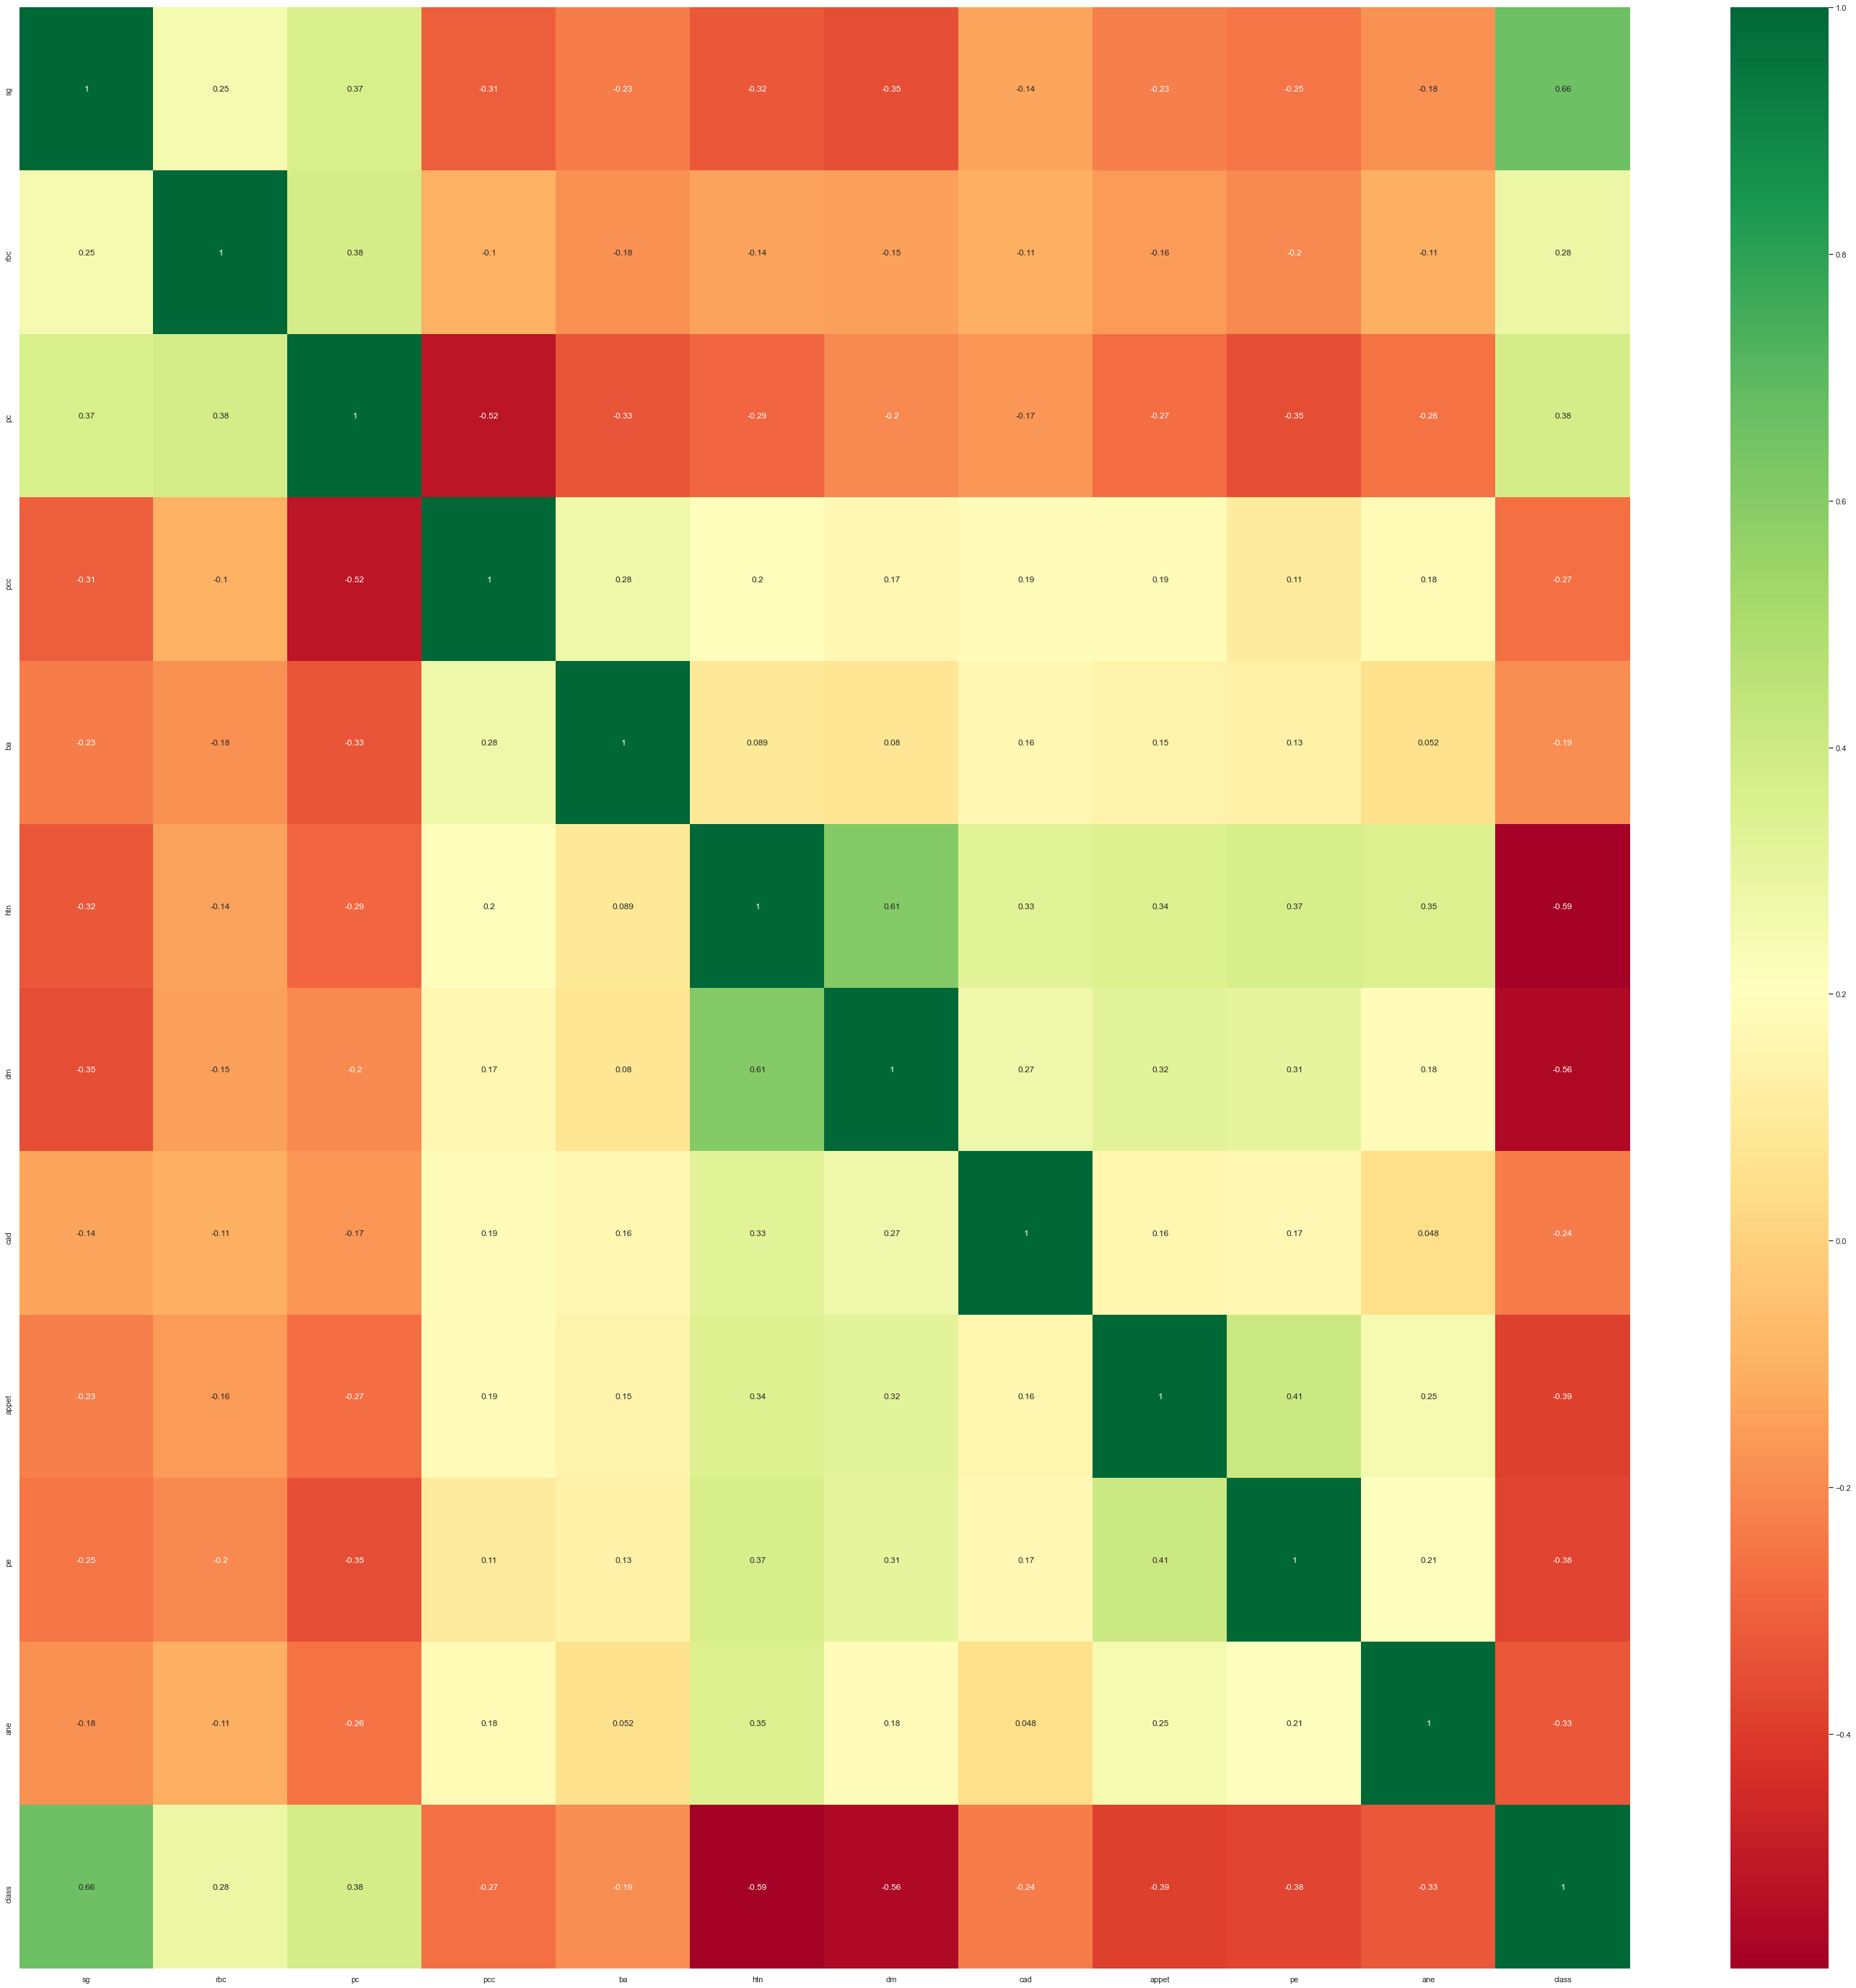

In [220]:
corrmat = df3.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(50,50))
#plot heat map
g=sns.heatmap(df3[top_corr_features].corr(),annot=True,cmap="RdYlGn")

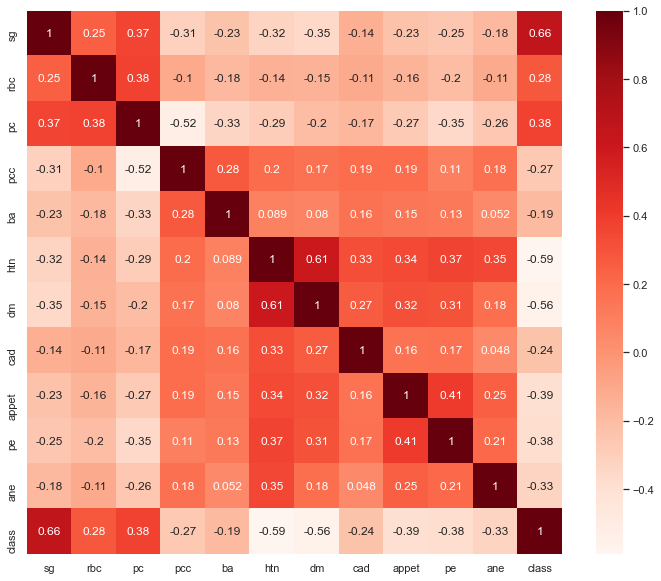

In [221]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [222]:
df2.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [223]:
#Correlation with output variable
cor_target = abs(cor["class"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

sg       0.659504
htn      0.590438
dm       0.559060
class    1.000000
Name: class, dtype: float64

In [224]:
df_cfs = df2[['sg', 'htn', 'dm', 'class']]

In [225]:
df_cfs

sg  htn  dm  class
0     3    1   1      0
1     3    0   0      0
2     1    0   1      0
3     0    1   0      0
4     1    0   0      0
..   ..  ...  ..    ...
395   3    0   0      1
396   4    0   0      1
397   3    0   0      1
398   4    0   0      1
399   4    0   0      1

[400 rows x 4 columns]

In [226]:
#Separate label from features
Xcfs= df_cfs.iloc[:,0:3].values

In [227]:
Xcfs

array([[3, 1, 1],
       [3, 0, 0],
       [1, 0, 1],
       ...,
       [3, 0, 0],
       [4, 0, 0],
       [4, 0, 0]])

In [228]:
ycfs= df_cfs['class'].values

In [229]:
ycfs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [230]:
# Splitting train_set, test_set
from sklearn.model_selection import train_test_split
X_traincfs, X_testcfs, y_traincfs, y_testcfs = train_test_split(Xcfs, ycfs, random_state=0)

In [231]:
X_traincfs.shape

(300, 3)

In [232]:
Xcfs.shape

(400, 3)

In [233]:
X_testcfs.shape

(100, 3)

In [234]:
#Normalization MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_traincfs = scaler.fit_transform(X_traincfs)
X_testcfs = scaler.fit_transform(X_testcfs)

## KNN Model with CFS Feature Selection

In [235]:
#Import k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'Score')

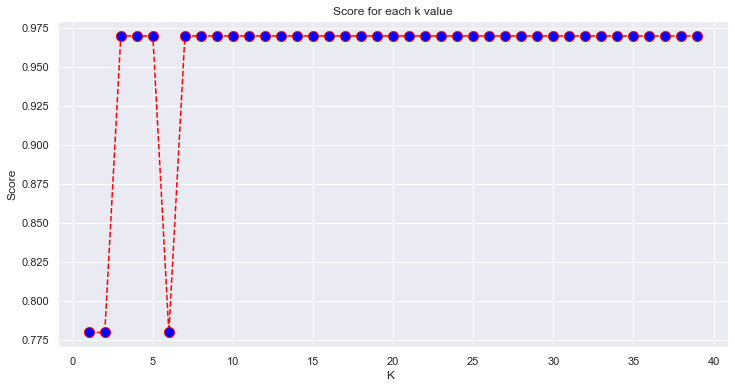

In [236]:
score = []
# Calculate score for k between 1 and 40 

for i in range(1, 40):
    knn = KNeighborsClassifier(i,metric='manhattan')
    knn_model = knn.fit(X_traincfs, y_traincfs)
    pred_i = knn_model.predict(X_testcfs)
    score.append(knn_model.score(X_testcfs, y_testcfs))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), score, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Score for each k value')
plt.xlabel('K ')
plt.ylabel('Score')

In [237]:
#retrain the model with the best value k
knncfs = KNeighborsClassifier(10)
knn_modelcfs = knncfs.fit(X_traincfs, y_traincfs)
y_pred_knncfs = knn_modelcfs.predict(X_testcfs)

In [238]:
#Accuracy
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knncfs.score(X_traincfs, y_traincfs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knncfs.score(X_testcfs, y_testcfs)))

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 0.97


In [239]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_testcfs, y_pred_knncfs))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        62
           1       0.93      1.00      0.96        38

    accuracy                           0.97       100
   macro avg       0.96      0.98      0.97       100
weighted avg       0.97      0.97      0.97       100



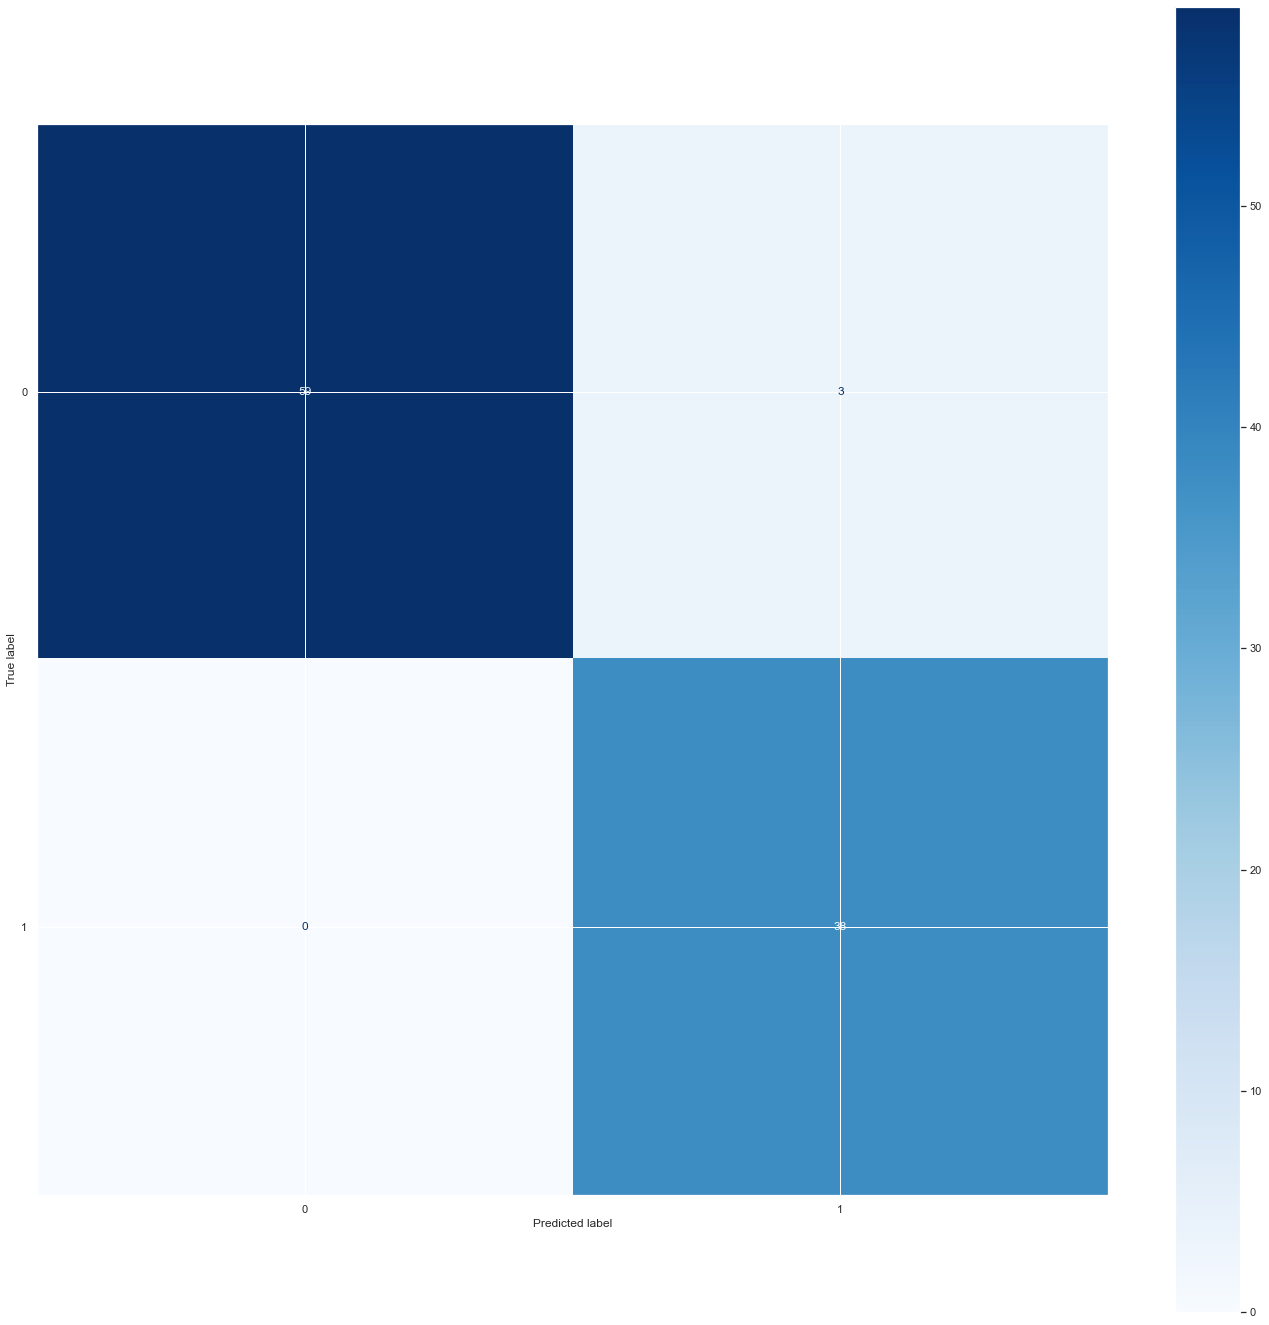

In [240]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knncfs, X_testcfs, y_testcfs, cmap=plt.cm.Blues)
plt.show()

## Naive Bayes NB Model with CFS feature Selection

In [241]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB


In [242]:
#searching for the best parameters
nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB()}
scores = {}
for key, model in nb.items():
    s = cross_val_score(model, X_traincfs, y_traincfs, cv=5, scoring='accuracy')
    scores[key] = np.mean(s)
scores

{'gaussian': 0.8233333333333333, 'bernoulli': 0.8233333333333333}

In [243]:
modelcfs=BernoulliNB(alpha=0, binarize=0, fit_prior=True, class_prior=None)

In [244]:
#retrain the model with the best value k
modelcfs=BernoulliNB(alpha=0, binarize=0, fit_prior=True, class_prior=None)
model_NBcfs = modelcfs.fit(X_traincfs, y_traincfs)
y_pred_NBcfs = model_NBcfs.predict(X_testcfs)

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



In [245]:
print('Accuracy of NB cfs classifier on training set: {:.2f}'
     .format(modelcfs.score(X_traincfs, y_traincfs)))
print('Accuracy of NB cfs classifier on test set: {:.2f}'
     .format(modelcfs.score(X_testcfs, y_testcfs)))

Accuracy of NB cfs classifier on training set: 0.83
Accuracy of NB cfs classifier on test set: 0.82


In [246]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_testcfs, y_pred_NBcfs))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        62
           1       0.68      1.00      0.81        38

    accuracy                           0.82       100
   macro avg       0.84      0.85      0.82       100
weighted avg       0.88      0.82      0.82       100



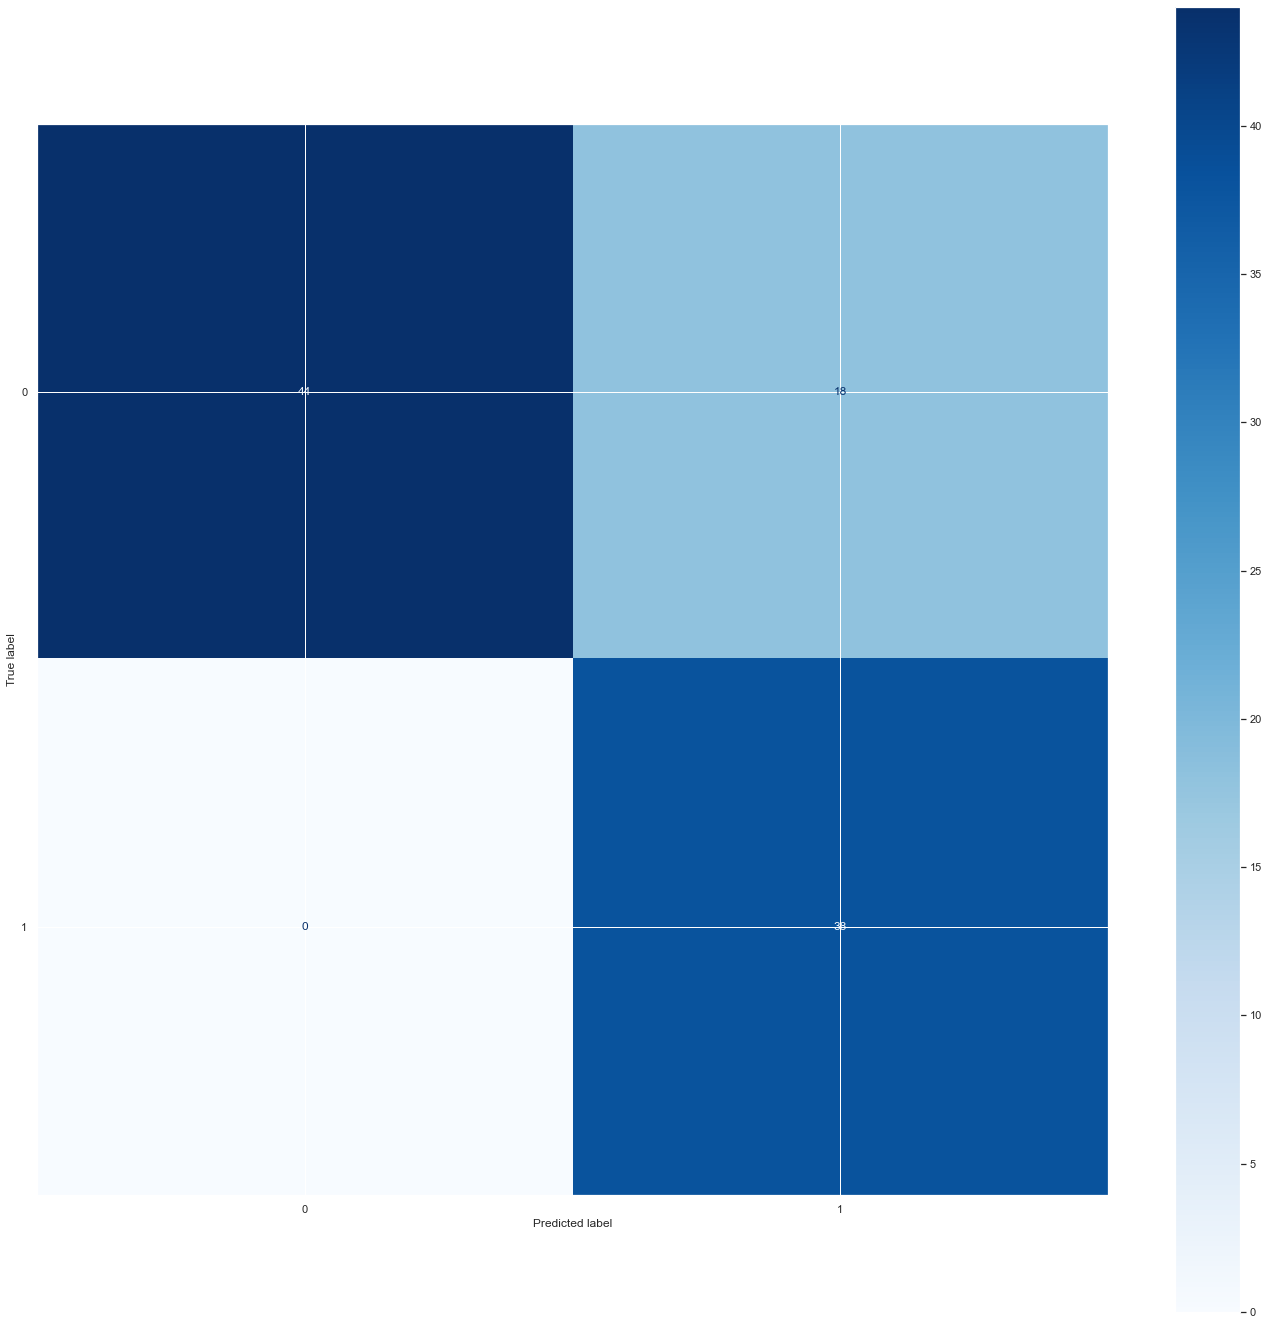

In [247]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(modelcfs, X_testcfs, y_testcfs, cmap=plt.cm.Blues)
plt.show()

## SVM with different Kernel with CFS feature selection

In [248]:
#Import SVC
from sklearn.svm import SVC

In [249]:
#train model
svmcfs = SVC()
svmcfs.fit(X_traincfs, y_traincfs)

SVC()

In [250]:
y_pred_svc_1cfs = svmcfs.predict(X_testcfs)

In [251]:
#print('Accuracy of SVM classifier on training set: {:.2f}'
     #.format(svm.score(X_traincfs, y_traincfs)))
#print('Accuracy of SVM classifier on test set: {:.2f}'
     #.format(svm.score(X_testcfs, y_testcfs)))

In [252]:
#Model performance
from sklearn.metrics import classification_report
print(classification_report(y_pred_svc_1cfs, y_testcfs))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        59
           1       1.00      0.93      0.96        41

    accuracy                           0.97       100
   macro avg       0.98      0.96      0.97       100
weighted avg       0.97      0.97      0.97       100



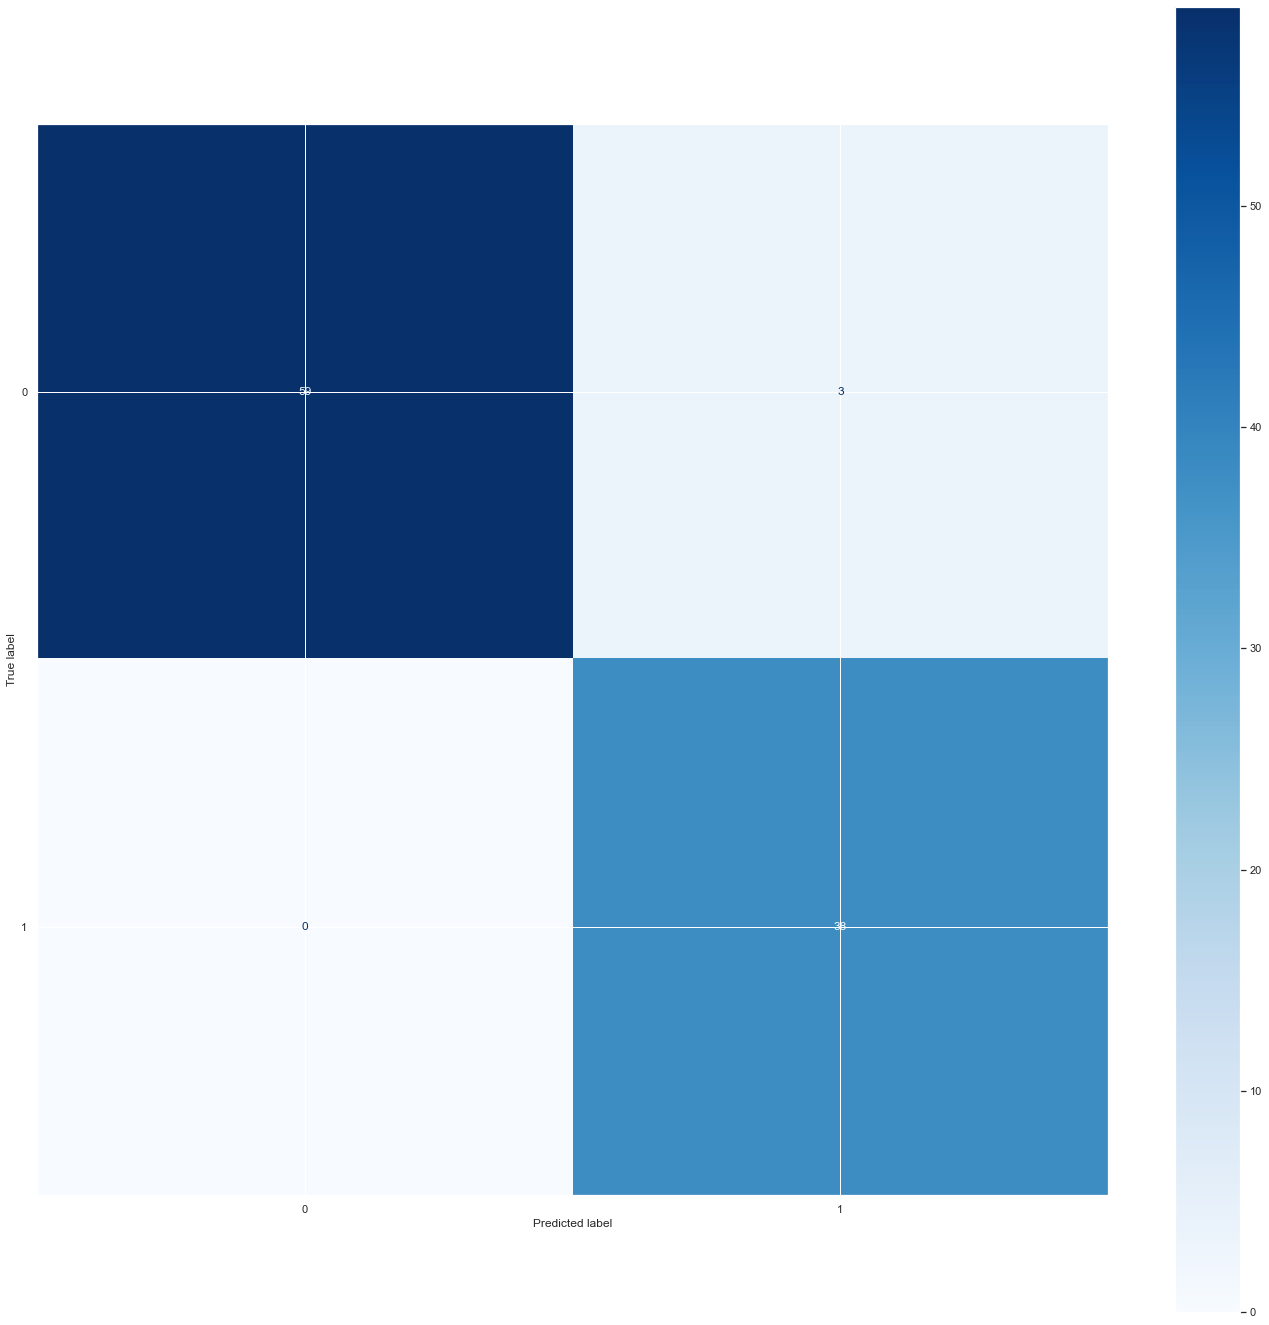

In [253]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svmcfs, X_testcfs, y_testcfs, cmap=plt.cm.Blues)
plt.show()

#### Linear kernel

In [254]:
svmcfs_linear = SVC(kernel="linear")
svmcfs_linear.fit(X_traincfs, y_traincfs)
from sklearn.metrics import classification_report
y_pred_svc_2cfs = svmcfs_linear.predict(X_testcfs)
print(classification_report(y_pred_svc_2cfs, y_testcfs))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        55
           1       1.00      0.84      0.92        45

    accuracy                           0.93       100
   macro avg       0.94      0.92      0.93       100
weighted avg       0.94      0.93      0.93       100



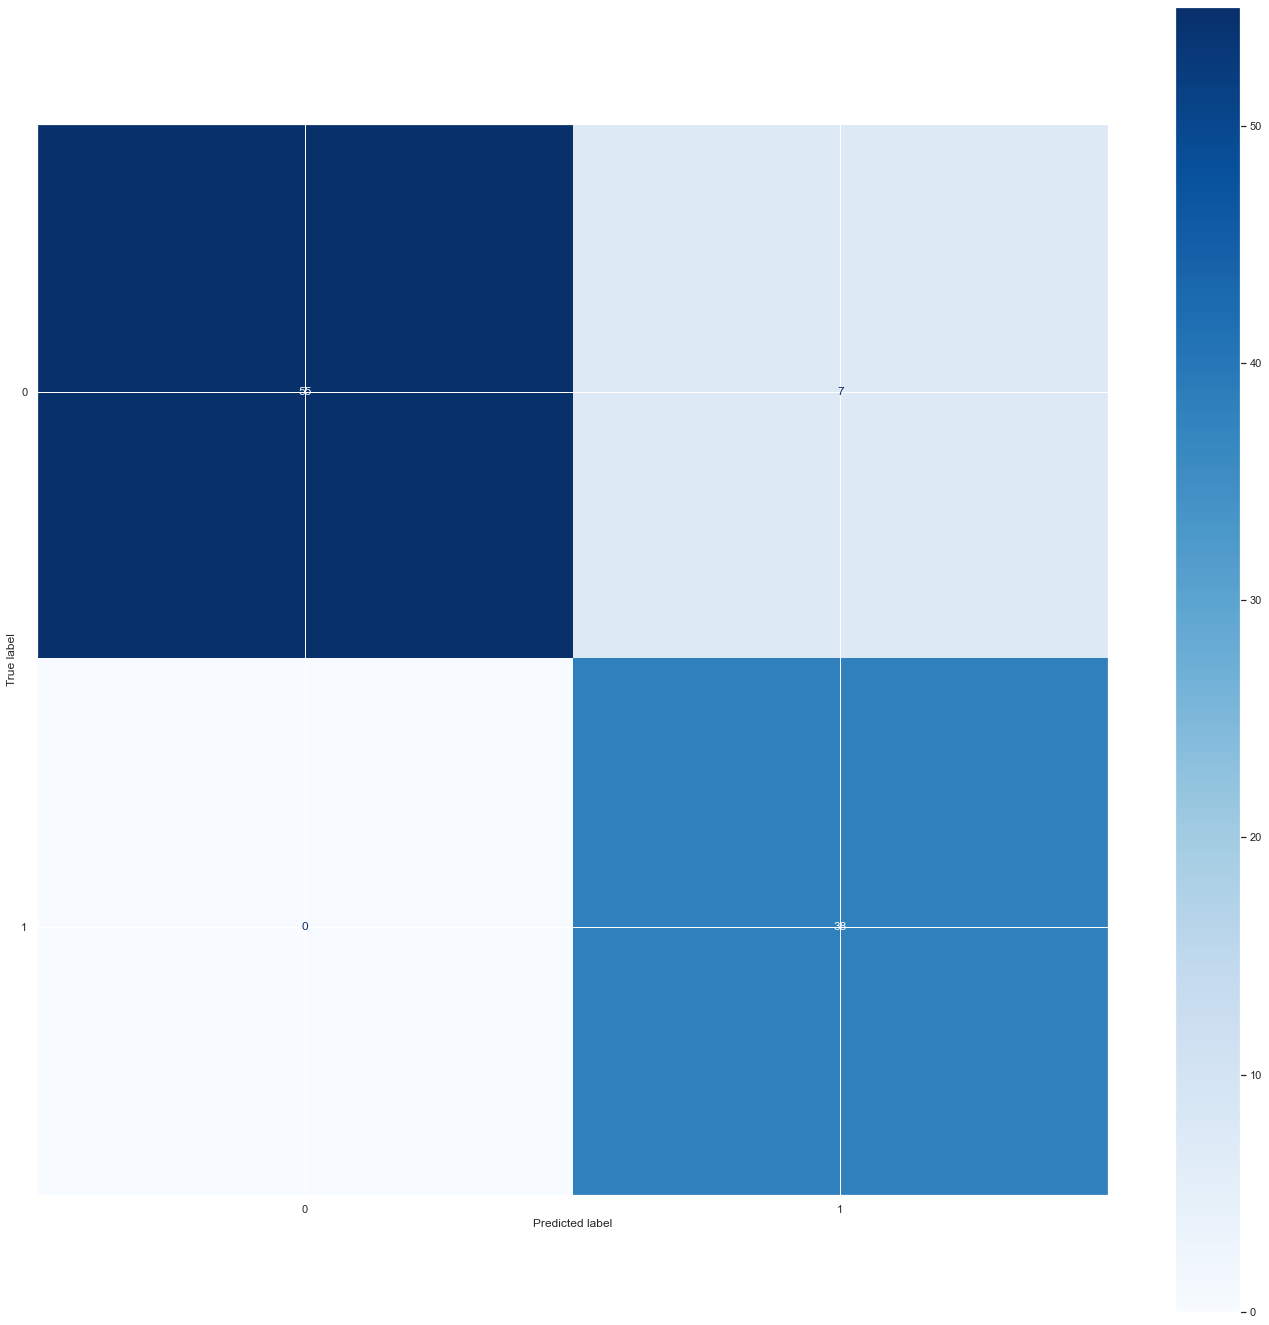

In [255]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svmcfs_linear, X_testcfs, y_testcfs, cmap=plt.cm.Blues)
plt.show()

#### Polynomial kernel

In [256]:
svmcfs_poly = SVC(kernel="poly")
svmcfs_poly.fit(X_traincfs, y_traincfs)
from sklearn.metrics import classification_report
y_pred_svc_3cfs = svmcfs_poly.predict(X_testcfs)
print(classification_report(y_pred_svc_3cfs, y_testcfs))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        59
           1       1.00      0.93      0.96        41

    accuracy                           0.97       100
   macro avg       0.98      0.96      0.97       100
weighted avg       0.97      0.97      0.97       100



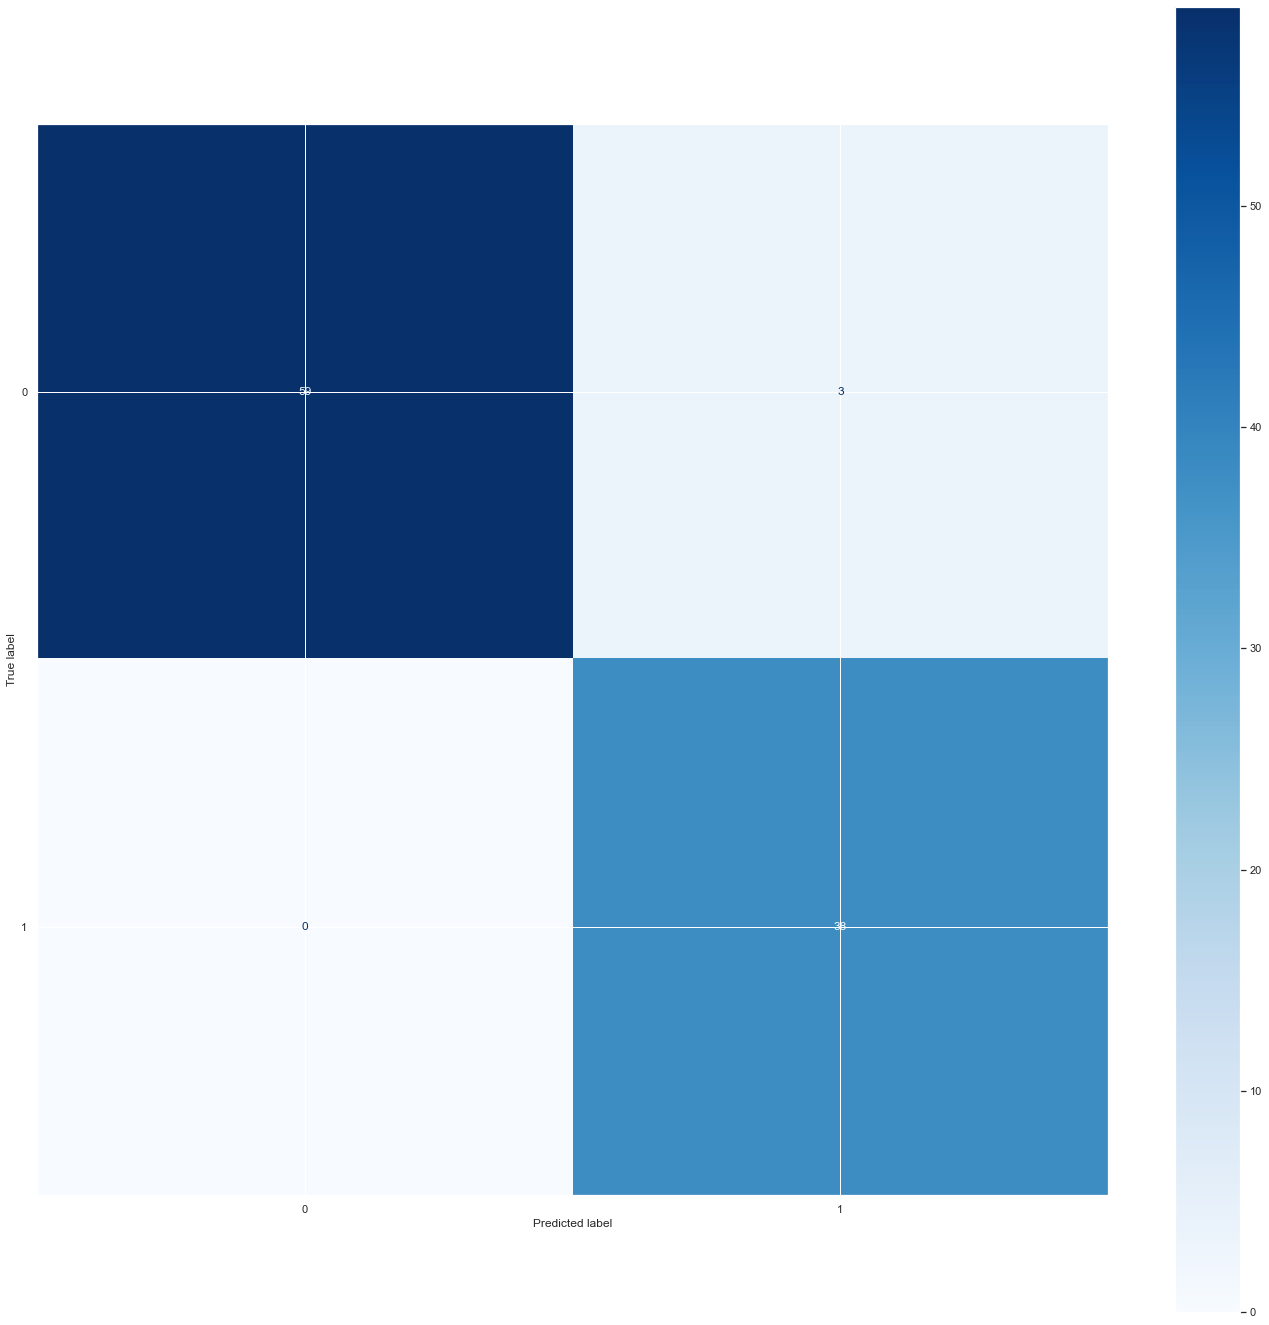

In [257]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svmcfs_poly, X_testcfs, y_testcfs, cmap=plt.cm.Blues)
plt.show()

#### Sigmoid kernel

In [258]:
svmcfs_sigmoid = SVC(kernel="sigmoid")
svmcfs_sigmoid.fit(X_traincfs, y_traincfs)
from sklearn.metrics import classification_report
y_pred_svc_4cfs = svmcfs_sigmoid.predict(X_testcfs)
print(classification_report(y_pred_svc_4cfs, y_testcfs))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83        73
           1       0.55      0.78      0.65        27

    accuracy                           0.77       100
   macro avg       0.73      0.77      0.74       100
weighted avg       0.81      0.77      0.78       100



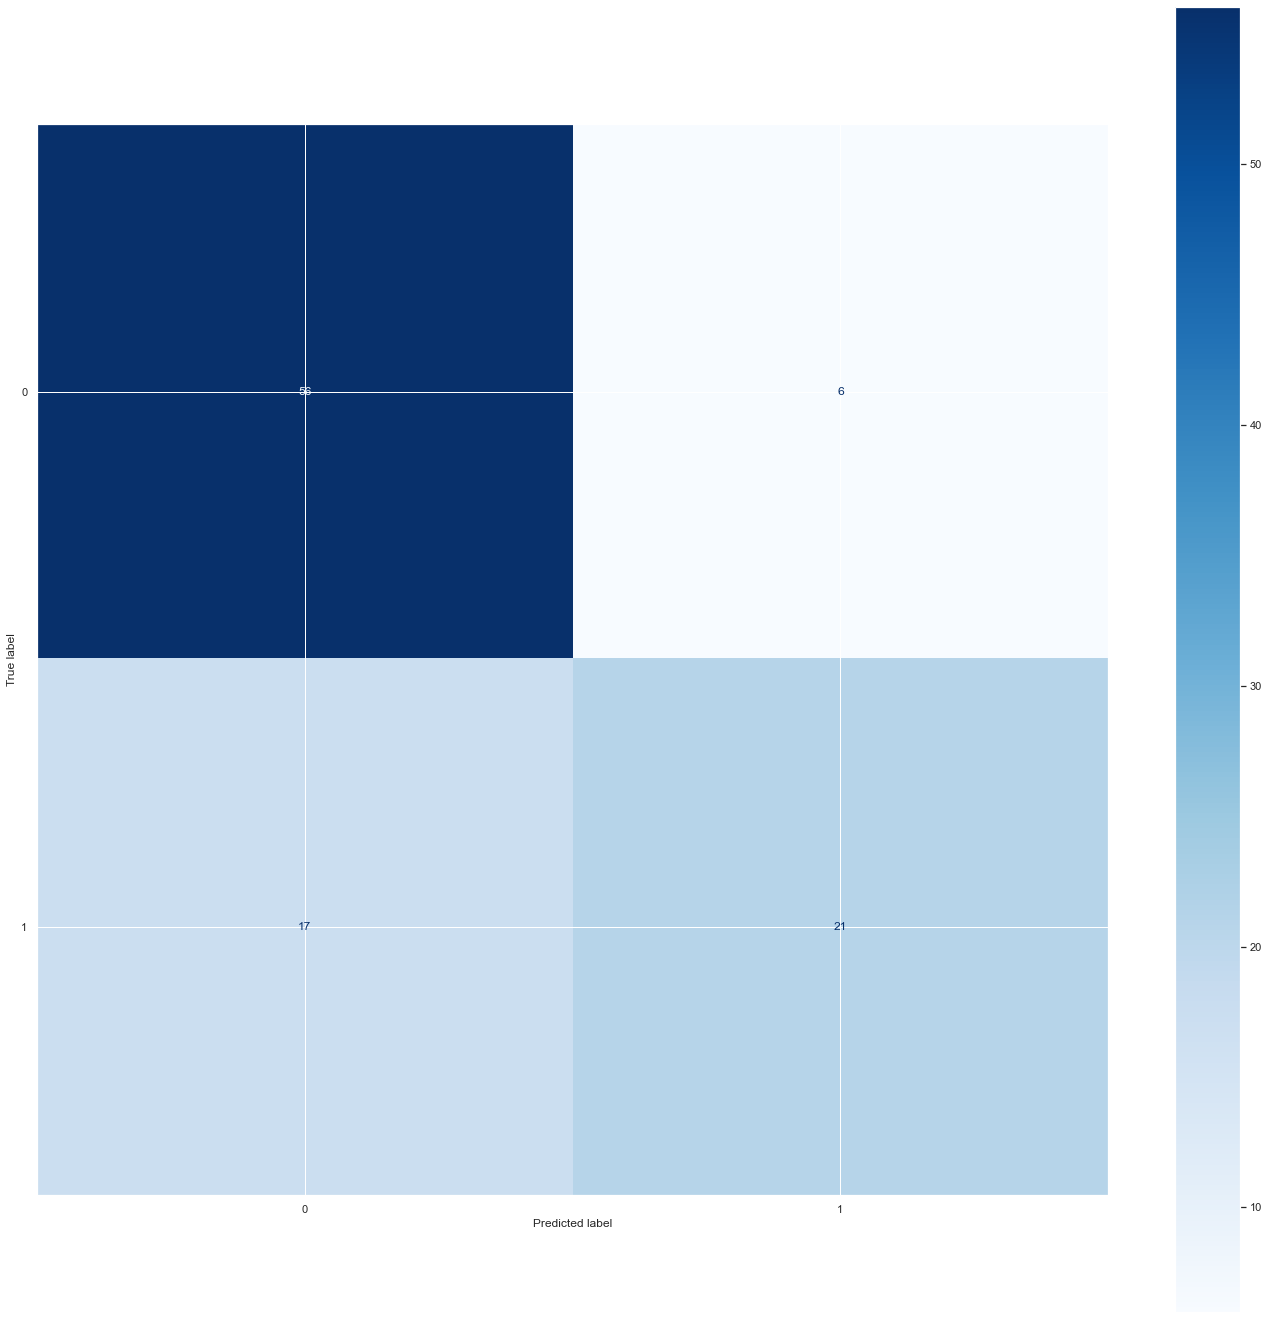

In [259]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svmcfs_sigmoid, X_testcfs, y_testcfs, cmap=plt.cm.Blues)
plt.show()

#### Gaussian RBF model

In [260]:
svmcfs_rbf = SVC(kernel="rbf")
svmcfs_rbf.fit(X_traincfs, y_traincfs)
from sklearn.metrics import classification_report
y_predcfs = svmcfs_rbf.predict(X_testcfs)
print(classification_report(y_predcfs, y_testcfs))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        59
           1       1.00      0.93      0.96        41

    accuracy                           0.97       100
   macro avg       0.98      0.96      0.97       100
weighted avg       0.97      0.97      0.97       100



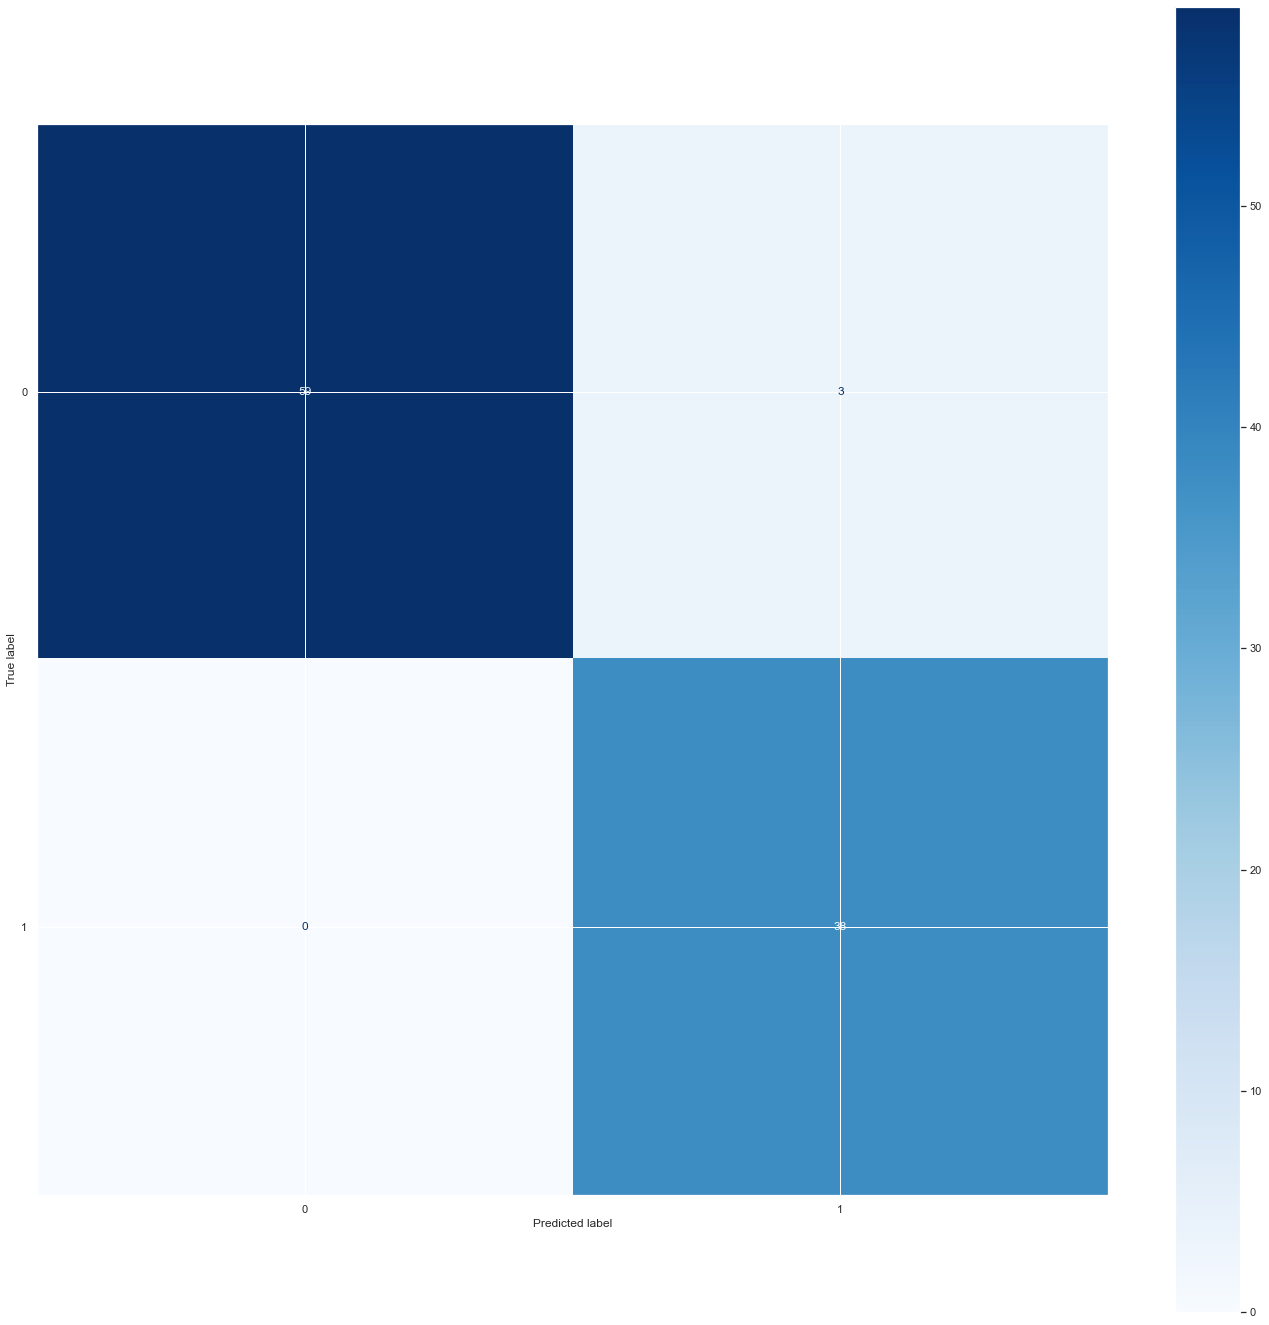

In [261]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svmcfs_rbf, X_testcfs, y_testcfs, cmap=plt.cm.Blues)
plt.show()

#### Results SVM with different noyau with CFS feature selection

In [262]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

s1=accuracy_score(y_testcfs, y_pred_svc_1cfs)
s2=accuracy_score(y_testcfs, y_pred_svc_2cfs)
s3=accuracy_score(y_testcfs, y_pred_svc_3cfs)
s4=accuracy_score(y_testcfs, y_pred_svc_4cfs) 
s5=accuracy_score(y_testcfs, y_predcfs)

models = pd.DataFrame({
    'Model': ['Support Vector Machines without kernel ', 'Support Vector Machines Linear','Support Vector Machines polynomial',
              'Support Vector Machines sigmoïd','Support Vector Machines RBF'],
    'Score': [s1,s2, s3, 
              s4,s5]})
models.sort_values(by="Score",ascending=False)

Model  Score
0  Support Vector Machines without kernel    0.97
2       Support Vector Machines polynomial   0.97
4              Support Vector Machines RBF   0.97
1           Support Vector Machines Linear   0.93
3          Support Vector Machines sigmoïd   0.77

### Logistic Regression with CFS feature selection

In [263]:
from sklearn.linear_model import LogisticRegression

In [264]:
logregcfs = LogisticRegression()

In [265]:
logregcfs.fit(X_traincfs, y_traincfs)

LogisticRegression()

In [266]:
y_predcfs_LG = logregcfs.predict(X_testcfs)

In [267]:
print('Accuracy of LR classifier on training set: {:.2f}'
     .format(logregcfs.score(X_traincfs, y_traincfs)))
print('Accuracy of LR classifier on test set: {:.2f}'
     .format(logregcfs.score(X_testcfs, y_testcfs)))

Accuracy of LR classifier on training set: 0.95
Accuracy of LR classifier on test set: 0.97


In [268]:
print(classification_report(y_testcfs, y_predcfs_LG))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        62
           1       0.93      1.00      0.96        38

    accuracy                           0.97       100
   macro avg       0.96      0.98      0.97       100
weighted avg       0.97      0.97      0.97       100



### Roc curve

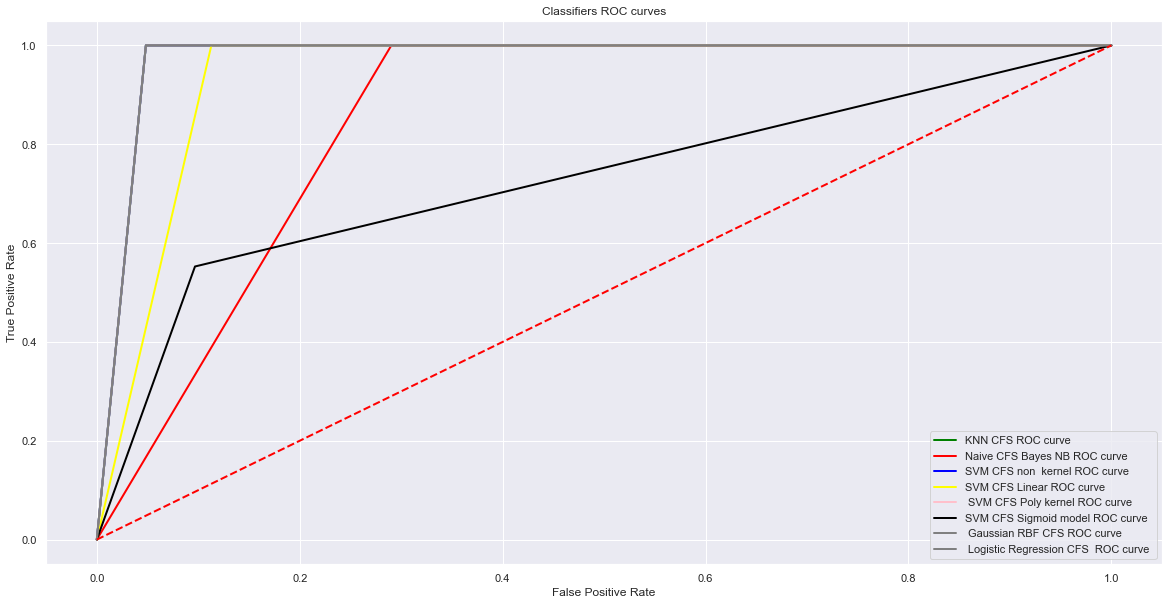

In [269]:
fpr1, tpr1, threshold1 = roc_curve(y_testcfs, y_pred_knncfs, pos_label=1)
roc_auc1 = auc(fpr1, tpr1)
precision_knn, recall_knn, th_knn = precision_recall_curve(y_testcfs, y_pred_knncfs, pos_label=1)

fpr2, tpr2, threshold2 = roc_curve(y_testcfs, y_pred_NBcfs, pos_label=1)
roc_auc2 = auc(fpr2, tpr2)
precision_knn, recall_knn, th_knn = precision_recall_curve(y_testcfs, y_pred_NBcfs, pos_label=1)

fpr3, tpr3, threshold3 = roc_curve(y_testcfs, y_pred_svc_1cfs, pos_label=1)
roc_auc3 = auc(fpr3, tpr3)
precision_knn, recall_knn, th_knn = precision_recall_curve(y_testcfs, y_pred_svc_1cfs, pos_label=1)

fpr4, tpr4, threshold4 = roc_curve(y_testcfs, y_pred_svc_2cfs, pos_label=1)
roc_auc4 = auc(fpr4, tpr4)
precision_knn, recall_knn, th_knn = precision_recall_curve(y_testcfs, y_pred_svc_2cfs, pos_label=1)

fpr5, tpr5, threshold5 = roc_curve(y_testcfs, y_pred_svc_3cfs, pos_label=1)
roc_auc5 = auc(fpr5, tpr5)
precision_knn, recall_knn, th_knn = precision_recall_curve(y_testcfs, y_pred_svc_3cfs, pos_label=1)

fpr6, tpr6, threshold6 = roc_curve(y_testcfs, y_pred_svc_4cfs, pos_label=1)
roc_auc6 = auc(fpr6, tpr6)
precision_knn, recall_knn, th_knn = precision_recall_curve(y_testcfs, y_pred_svc_4cfs, pos_label=1)

fpr7, tpr7, threshold7 = roc_curve(y_testcfs, y_predcfs, pos_label=1)
roc_auc7 = auc(fpr7, tpr7)
precision_knn, recall_knn, th_knn = precision_recall_curve(y_testcfs, y_predcfs, pos_label=1)

fpr8, tpr8, threshold8 = roc_curve(y_testcfs, y_predcfs_LG, pos_label=1)
roc_auc8 = auc(fpr8, tpr8)
precision_knn, recall_knn, th_knn = precision_recall_curve(y_testcfs, y_predcfs_LG, pos_label=1)



plt.figure(figsize=(20,10))

plt.plot(fpr1, tpr1, color='green', lw=2, label='KNN CFS ROC curve'% roc_auc1)
plt.plot(fpr2, tpr2, color='red', lw=2, label='Naive CFS Bayes NB ROC curve '% roc_auc2)
plt.plot(fpr3, tpr3, color='blue', lw=2, label='SVM CFS non  kernel ROC curve '% roc_auc3)
plt.plot(fpr4, tpr3, color='yellow', lw=2, label='SVM CFS Linear ROC curve'% roc_auc4)
plt.plot(fpr5, tpr5, color='pink', lw=2, label=' SVM CFS Poly kernel ROC curve '% roc_auc5)
plt.plot(fpr6, tpr6, color='black', lw=2, label='SVM CFS Sigmoid model ROC curve '% roc_auc6)
plt.plot(fpr7, tpr7, color='gray', lw=2, label=' Gaussian RBF CFS ROC curve '% roc_auc7)
plt.plot(fpr8, tpr8, color='gray', lw=2, label=' Logistic Regression CFS  ROC curve '% roc_auc8)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classifiers ROC curves')
plt.legend(loc = "best")
plt.show()

In [270]:
#*****
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

s1=accuracy_score(y_testcfs, y_pred_knncfs )
s2=accuracy_score(y_testcfs, y_pred_svc_1cfs)
s3=accuracy_score(y_testcfs, y_pred_svc_2cfs)
s4=accuracy_score(y_testcfs, y_pred_svc_3cfs)
s5=accuracy_score(y_testcfs, y_pred_svc_4cfs)
s6=accuracy_score(y_testcfs, y_predcfs)
s7=accuracy_score(y_testcfs,y_predcfs_LG)
s8=accuracy_score(y_testcfs,y_pred_NBcfs)
models = pd.DataFrame({
    'Model': ['KNN CFS','svm CFS ','svm linear CFS kernel','svm polynomial CFS kernel','svm CFS sigmoid kernel',
              'svm rbf CFS kernel','logistic CFS regression','Naive CFS Bayes NB'],
    'Score': [s1,s2, s3, s4, s5, s6,s7,s8]})
models.sort_values(by="Score",ascending=False)

Model  Score
0                    KNN CFS   0.97
1                   svm CFS    0.97
3  svm polynomial CFS kernel   0.97
5         svm rbf CFS kernel   0.97
6    logistic CFS regression   0.97
2      svm linear CFS kernel   0.93
7         Naive CFS Bayes NB   0.82
4     svm CFS sigmoid kernel   0.77

# Model Ensembliste with CFS feature selection

## DecisionTree with CFS

In [271]:
from sklearn.tree import DecisionTreeClassifier

In [272]:
dtcfs = DecisionTreeClassifier(random_state=0)

In [273]:
dtcfs.fit(X_traincfs, y_traincfs)

DecisionTreeClassifier(random_state=0)

In [274]:
print('Le train score est :', dtcfs.score(X_traincfs, y_traincfs))
print('Le test score est :', dtcfs.score(X_testcfs, y_testcfs))

Le train score est : 0.95
Le test score est : 0.97


In [275]:
y_predcfs_dt = dtcfs.predict(X_testcfs)

In [276]:
print(classification_report(y_testcfs, y_predcfs_dt))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        62
           1       0.93      1.00      0.96        38

    accuracy                           0.97       100
   macro avg       0.96      0.98      0.97       100
weighted avg       0.97      0.97      0.97       100



## Random Forest with CFS

In [277]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clfcfs = RandomForestClassifier(max_depth=7,random_state=0)
clfcfs.fit(X_traincfs,y_traincfs)

RandomForestClassifier(max_depth=7, random_state=0)

In [278]:
ypred_RFcfs=clfcfs.predict(X_testcfs)

In [279]:
print('Accuracy of RFcfs classifier on training set: {:.2f}'
     .format(clfcfs.score(X_traincfs, y_traincfs)))
print('Accuracy of RFcfs classifier on test set: {:.2f}'
     .format(clfcfs.score(X_testcfs, y_testcfs)))

Accuracy of RFcfs classifier on training set: 0.95
Accuracy of RFcfs classifier on test set: 0.97


In [280]:
from sklearn.metrics import classification_report
print(classification_report(y_testcfs, ypred_RFcfs))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        62
           1       0.93      1.00      0.96        38

    accuracy                           0.97       100
   macro avg       0.96      0.98      0.97       100
weighted avg       0.97      0.97      0.97       100



## Adaboost with CFS

In [281]:
from sklearn.ensemble import AdaBoostClassifier

In [282]:
adcfs = AdaBoostClassifier(n_estimators=5)
adcfs.fit(X_traincfs, y_traincfs)

AdaBoostClassifier(n_estimators=5)

In [283]:
y_predadcfs = adcfs.predict(X_testcfs)

In [284]:
print('Accuracy of Adaboost classifier on training set: {:.2f}'
     .format(adcfs.score(X_traincfs, y_traincfs)))
print('Accuracy of Adaboost classifier on test set: {:.2f}'
     .format(adcfs.score(X_testcfs, y_testcfs)))

Accuracy of Adaboost classifier on training set: 0.95
Accuracy of Adaboost classifier on test set: 0.97


In [285]:
from sklearn.metrics import classification_report
print(classification_report(y_testcfs, y_predadcfs))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        62
           1       0.93      1.00      0.96        38

    accuracy                           0.97       100
   macro avg       0.96      0.98      0.97       100
weighted avg       0.97      0.97      0.97       100



## Xgboost with CFS

In [286]:
import xgboost as xgb
from xgboost import XGBClassifier


In [287]:
xgb_clcfs = xgb.XGBClassifier()
print(type(xgb_clcfs))

<class 'xgboost.sklearn.XGBClassifier'>


In [288]:
xgb_clcfs.fit(X_traincfs, y_traincfs)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [289]:
xgboost_predscfs = xgb_clcfs.predict(X_testcfs)

In [290]:
print('Accuracy of Xgboost classifier on training set: {:.2f}'
     .format(xgb_clcfs.score(X_traincfs, y_traincfs)))
print('Accuracy of Xgboost classifier on test set: {:.2f}'
     .format(xgb_clcfs.score(X_testcfs, y_testcfs)))

Accuracy of Xgboost classifier on training set: 0.95
Accuracy of Xgboost classifier on test set: 0.97


In [291]:
print(classification_report(y_testcfs, xgboost_predscfs))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        62
           1       0.93      1.00      0.96        38

    accuracy                           0.97       100
   macro avg       0.96      0.98      0.97       100
weighted avg       0.97      0.97      0.97       100



## Catboost with CFS

In [292]:
from catboost import CatBoostClassifier

In [293]:
catcfs = CatBoostClassifier()

In [294]:
catcfs.fit(X_traincfs, y_traincfs)

Learning rate set to 0.006161
0:	learn: 0.6834964	total: 1.2ms	remaining: 1.2s
1:	learn: 0.6750026	total: 2.26ms	remaining: 1.13s
2:	learn: 0.6657553	total: 3.47ms	remaining: 1.15s
3:	learn: 0.6564844	total: 4.61ms	remaining: 1.15s
4:	learn: 0.6476783	total: 5.59ms	remaining: 1.11s
5:	learn: 0.6387444	total: 6.51ms	remaining: 1.08s
6:	learn: 0.6299789	total: 7.45ms	remaining: 1.06s
7:	learn: 0.6212701	total: 8.38ms	remaining: 1.04s
8:	learn: 0.6129869	total: 9.31ms	remaining: 1.02s
9:	learn: 0.6050127	total: 10.3ms	remaining: 1.02s
10:	learn: 0.5968119	total: 11.2ms	remaining: 1.01s
11:	learn: 0.5892327	total: 12.1ms	remaining: 996ms
12:	learn: 0.5817213	total: 13ms	remaining: 990ms
13:	learn: 0.5742157	total: 14ms	remaining: 983ms
14:	learn: 0.5668576	total: 14.9ms	remaining: 979ms
15:	learn: 0.5596337	total: 15.8ms	remaining: 973ms
16:	learn: 0.5533203	total: 17.1ms	remaining: 990ms
17:	learn: 0.5463652	total: 18.2ms	remaining: 991ms
18:	learn: 0.5395350	total: 19.1ms	remaining: 989m

196:	learn: 0.1830397	total: 170ms	remaining: 695ms
197:	learn: 0.1827057	total: 171ms	remaining: 694ms
198:	learn: 0.1822761	total: 172ms	remaining: 694ms
199:	learn: 0.1820075	total: 173ms	remaining: 693ms
200:	learn: 0.1816242	total: 174ms	remaining: 691ms
201:	learn: 0.1812273	total: 175ms	remaining: 691ms
202:	learn: 0.1808773	total: 176ms	remaining: 690ms
203:	learn: 0.1805200	total: 176ms	remaining: 689ms
204:	learn: 0.1801693	total: 177ms	remaining: 688ms
205:	learn: 0.1798309	total: 178ms	remaining: 687ms
206:	learn: 0.1794469	total: 179ms	remaining: 686ms
207:	learn: 0.1791524	total: 180ms	remaining: 685ms
208:	learn: 0.1787971	total: 181ms	remaining: 684ms
209:	learn: 0.1785139	total: 182ms	remaining: 683ms
210:	learn: 0.1782209	total: 182ms	remaining: 682ms
211:	learn: 0.1779011	total: 183ms	remaining: 681ms
212:	learn: 0.1776694	total: 184ms	remaining: 681ms
213:	learn: 0.1773551	total: 185ms	remaining: 680ms
214:	learn: 0.1771057	total: 186ms	remaining: 679ms
215:	learn: 

398:	learn: 0.1525739	total: 341ms	remaining: 513ms
399:	learn: 0.1525319	total: 341ms	remaining: 512ms
400:	learn: 0.1524684	total: 342ms	remaining: 511ms
401:	learn: 0.1524074	total: 343ms	remaining: 510ms
402:	learn: 0.1523677	total: 344ms	remaining: 509ms
403:	learn: 0.1523213	total: 345ms	remaining: 509ms
404:	learn: 0.1522799	total: 346ms	remaining: 508ms
405:	learn: 0.1522421	total: 347ms	remaining: 507ms
406:	learn: 0.1521901	total: 347ms	remaining: 506ms
407:	learn: 0.1521302	total: 348ms	remaining: 505ms
408:	learn: 0.1520721	total: 349ms	remaining: 505ms
409:	learn: 0.1520246	total: 350ms	remaining: 504ms
410:	learn: 0.1519809	total: 351ms	remaining: 503ms
411:	learn: 0.1519397	total: 352ms	remaining: 502ms
412:	learn: 0.1518823	total: 352ms	remaining: 501ms
413:	learn: 0.1518269	total: 353ms	remaining: 500ms
414:	learn: 0.1517782	total: 354ms	remaining: 499ms
415:	learn: 0.1517398	total: 355ms	remaining: 498ms
416:	learn: 0.1516970	total: 356ms	remaining: 497ms
417:	learn: 

603:	learn: 0.1467942	total: 510ms	remaining: 335ms
604:	learn: 0.1467824	total: 511ms	remaining: 334ms
605:	learn: 0.1467692	total: 512ms	remaining: 333ms
606:	learn: 0.1467555	total: 513ms	remaining: 332ms
607:	learn: 0.1467389	total: 514ms	remaining: 331ms
608:	learn: 0.1467274	total: 514ms	remaining: 330ms
609:	learn: 0.1467137	total: 515ms	remaining: 329ms
610:	learn: 0.1466971	total: 516ms	remaining: 329ms
611:	learn: 0.1466781	total: 517ms	remaining: 328ms
612:	learn: 0.1466654	total: 518ms	remaining: 327ms
613:	learn: 0.1466523	total: 519ms	remaining: 326ms
614:	learn: 0.1466363	total: 519ms	remaining: 325ms
615:	learn: 0.1466233	total: 520ms	remaining: 324ms
616:	learn: 0.1466116	total: 521ms	remaining: 323ms
617:	learn: 0.1465985	total: 522ms	remaining: 323ms
618:	learn: 0.1465862	total: 523ms	remaining: 322ms
619:	learn: 0.1465693	total: 523ms	remaining: 321ms
620:	learn: 0.1465571	total: 524ms	remaining: 320ms
621:	learn: 0.1465416	total: 525ms	remaining: 319ms
622:	learn: 

814:	learn: 0.1448825	total: 682ms	remaining: 155ms
815:	learn: 0.1448742	total: 683ms	remaining: 154ms
816:	learn: 0.1448699	total: 684ms	remaining: 153ms
817:	learn: 0.1448618	total: 685ms	remaining: 152ms
818:	learn: 0.1448559	total: 686ms	remaining: 152ms
819:	learn: 0.1448555	total: 686ms	remaining: 151ms
820:	learn: 0.1448500	total: 687ms	remaining: 150ms
821:	learn: 0.1448408	total: 688ms	remaining: 149ms
822:	learn: 0.1448358	total: 689ms	remaining: 148ms
823:	learn: 0.1448309	total: 689ms	remaining: 147ms
824:	learn: 0.1448260	total: 690ms	remaining: 146ms
825:	learn: 0.1448216	total: 691ms	remaining: 146ms
826:	learn: 0.1448144	total: 692ms	remaining: 145ms
827:	learn: 0.1448082	total: 693ms	remaining: 144ms
828:	learn: 0.1448038	total: 694ms	remaining: 143ms
829:	learn: 0.1447987	total: 694ms	remaining: 142ms
830:	learn: 0.1447930	total: 695ms	remaining: 141ms
831:	learn: 0.1447880	total: 696ms	remaining: 141ms
832:	learn: 0.1447831	total: 697ms	remaining: 140ms
833:	learn: 

In [295]:
ypred_catcfs = catcfs.predict(X_testcfs)

In [296]:
print('Accuracy of catboost cfs classifier on training set: {:.2f}'
     .format(catcfs.score(X_traincfs, y_traincfs)))
print('Accuracy of catboost cfs classifier on test set: {:.2f}'
     .format(catcfs.score(X_testcfs, y_testcfs)))

Accuracy of catboost cfs classifier on training set: 0.95
Accuracy of catboost cfs classifier on test set: 0.97


In [297]:
print(classification_report(y_testcfs, ypred_catcfs))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        62
           1       0.93      1.00      0.96        38

    accuracy                           0.97       100
   macro avg       0.96      0.98      0.97       100
weighted avg       0.97      0.97      0.97       100



### Roc curve

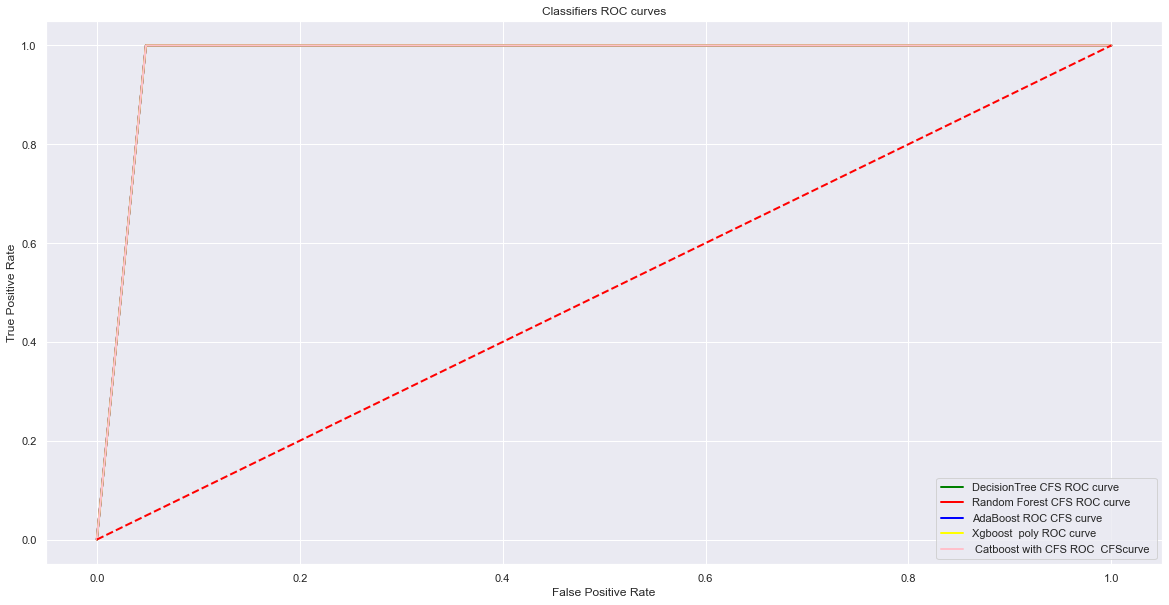

In [298]:
fpr1, tpr1, threshold1 = roc_curve(y_testcfs, y_predcfs_dt, pos_label=1)
roc_auc1 = auc(fpr1, tpr1)
precision_knn, recall_knn, th_knn = precision_recall_curve(y_testcfs, y_predcfs_dt, pos_label=1)

fpr2, tpr2, threshold2 = roc_curve(y_testcfs, ypred_RFcfs, pos_label=1)
roc_auc2 = auc(fpr2, tpr2)
precision_knn, recall_knn, th_knn = precision_recall_curve(y_testcfs, ypred_RFcfs, pos_label=1)

fpr3, tpr3, threshold3 = roc_curve(y_testcfs, y_predadcfs, pos_label=1)
roc_auc3 = auc(fpr3, tpr3)
precision_knn, recall_knn, th_knn = precision_recall_curve(y_testcfs, y_predadcfs, pos_label=1)

fpr4, tpr4, threshold4 = roc_curve(y_testcfs, xgboost_predscfs, pos_label=1)
roc_auc4 = auc(fpr4, tpr4)
precision_knn, recall_knn, th_knn = precision_recall_curve(y_testcfs, xgboost_predscfs, pos_label=1)

fpr5, tpr5, threshold5 = roc_curve(y_testcfs, ypred_catcfs, pos_label=1)
roc_auc5 = auc(fpr5, tpr5)
precision_knn, recall_knn, th_knn = precision_recall_curve(y_testcfs, ypred_catcfs, pos_label=1)



plt.figure(figsize=(20,10))

plt.plot(fpr1, tpr1, color='green', lw=2, label='DecisionTree CFS ROC curve'% roc_auc1)
plt.plot(fpr2, tpr2, color='red', lw=2, label='Random Forest CFS ROC curve '% roc_auc2)
plt.plot(fpr3, tpr3, color='blue', lw=2, label='AdaBoost ROC CFS curve '% roc_auc3)
plt.plot(fpr4, tpr3, color='yellow', lw=2, label='Xgboost  poly ROC curve'% roc_auc4)
plt.plot(fpr5, tpr5, color='pink', lw=2, label=' Catboost with CFS ROC  CFScurve '% roc_auc5)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classifiers ROC curves')
plt.legend(loc = "best")
plt.show()

In [299]:
#****************************************************************
# Compare Algorithms



#*****
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

ss1=accuracy_score(y_testcfs, y_predcfs_dt)
ss2=accuracy_score(y_testcfs, ypred_RFcfs)
ss3=accuracy_score(y_testcfs, y_predadcfs)
ss4=accuracy_score(y_testcfs, xgboost_predscfs)
ss5=accuracy_score(y_testcfs, ypred_catcfs)


models = pd.DataFrame({
    'Model': ['DecisionTree','Random Forest','Adaboost','Xgboost','Catboost'],
    'Score': [ss1,ss2, ss3, ss4, ss5]})
models.sort_values(by="Score",ascending=False)

Model  Score
0   DecisionTree   0.97
1  Random Forest   0.97
2       Adaboost   0.97
3        Xgboost   0.97
4       Catboost   0.97

# Feature selection RFE


In [300]:
df3=df2[['bp', 'sg', 'al', 'hemo', 'wbcc', 'rbcc', 'htn', 'cad', 'appet', 'class']]

In [301]:
X3= df3.drop(['class'], axis=1)

In [302]:
Y3=df3['class']

In [303]:
from sklearn.model_selection import train_test_split
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, random_state=0)

In [304]:
#Normalization MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X3_train = scaler.fit_transform(X3_train)
X3_test = scaler.fit_transform(X3_test)
X3_train,X3_test

(array([[0.625, 1.   , 0.   , ..., 0.   , 0.   , 0.   ],
        [0.375, 0.5  , 0.25 , ..., 0.   , 0.   , 0.   ],
        [0.375, 0.75 , 0.   , ..., 0.   , 0.   , 0.   ],
        ...,
        [0.375, 0.75 , 0.   , ..., 0.   , 0.   , 0.   ],
        [0.625, 0.25 , 0.75 , ..., 0.   , 0.   , 0.   ],
        [0.625, 0.25 , 0.25 , ..., 0.   , 0.   , 0.   ]]),
 array([[5.36726804e-01, 7.50000000e-01, 2.03389831e-01, 1.55963303e-01,
         1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
         0.00000000e+00],
        [1.25000000e-01, 7.50000000e-01, 0.00000000e+00, 9.44954128e-01,
         4.65493911e-01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00],
        [3.75000000e-01, 1.00000000e+00, 0.00000000e+00, 5.96330275e-01,
         3.78890392e-01, 5.00000000e-01, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00],
        [1.00000000e+00, 2.50000000e-01, 6.00000000e-01, 1.10091743e-01,
         6.27875507e-01, 0.00000000e+00, 1.00000000e+0

KNN after rfe

In [305]:
cross_val_score(KNeighborsClassifier(), X3_train, Y3_train, cv=5)

array([1.        , 0.98333333, 1.        , 0.95      , 0.93333333])

In [306]:
cross_val_score(KNeighborsClassifier(), X3_train, Y3_train, cv=5).mean()

0.9733333333333334

In [307]:
param_grid = {'n_neighbors': np.arange(1,20),  
              'metric': ['euclidean', 'manhattan']} 

In [308]:
gs=GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
gs

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [309]:
gs_result=gs.fit(X3_train,Y3_train)
gs_result

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [310]:
gs_result.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [311]:
gs_result.best_score_
gs_result.best_params_

{'metric': 'euclidean', 'n_neighbors': 4}

In [312]:
knn1 = KNeighborsClassifier(4)
knn_model1 = knn1.fit(X3_train, Y3_train)
Y_pred_knn1 = knn_model1.predict(X3_test)

In [313]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(Y3_test, Y_pred_knn1))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        62
           1       0.97      1.00      0.99        38

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



SVM after rfe

In [314]:
svm_rfe = SVC()
svm_rfe.fit(X3_train, Y3_train)

SVC()

In [315]:
from sklearn.metrics import classification_report
y_pred_svc_rfe = svm_rfe.predict(X3_test)
print(classification_report(y_pred_svc_rfe, Y3_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        61
           1       1.00      0.97      0.99        39

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



XgBoost after rfe

In [316]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)
grid_search.fit(X3_train, Y3_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                   

In [317]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}

In [318]:
xgboost_rfe=XGBClassifier(
    learning_rate= 0.1 ,n_estimators= 100,max_depth= 2
)
xgboost_rfe.fit(X3_train, Y3_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=2, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [319]:
print('train score  =', xgboost_rfe.score(X3_train,Y3_train))
print('test score  =', xgboost_rfe.score(X3_test,Y3_test))

train score  = 0.9933333333333333
test score  = 0.98


In [320]:
ypred_XG_rfe =xgboost_rfe.predict(X3_test)
print(classification_report(Y3_test, ypred_XG_rfe))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        62
           1       1.00      0.95      0.97        38

    accuracy                           0.98       100
   macro avg       0.98      0.97      0.98       100
weighted avg       0.98      0.98      0.98       100



Naive bayes after rfe

In [321]:
#searching for the best parameters
nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB()}
scores = {}
for key, model in nb.items():
    s = cross_val_score(model, X3_train,Y3_train, cv=5, scoring='accuracy')
    scores[key] = np.mean(s)
scores

{'gaussian': 0.8966666666666667, 'bernoulli': 0.9199999999999999}

In [322]:
model_rfe=BernoulliNB()
model_rfe.fit(X3_train,Y3_train)
print('train score=', model_rfe.score(X3_train,Y3_train))
print('test score=', model_rfe.score(X3_test,Y3_test))

train score= 0.92
test score= 0.92


In [323]:
ypred_NB_rfe = model_rfe.predict(X3_test)
print(classification_report(Y3_test, ypred_NB_rfe))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93        62
           1       0.88      0.92      0.90        38

    accuracy                           0.92       100
   macro avg       0.91      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



CatBoost after rfe

In [324]:
cat_rfe = CatBoostClassifier()
cat_rfe.fit(X3_train, Y3_train)

Learning rate set to 0.006161
0:	learn: 0.6832426	total: 1.64ms	remaining: 1.63s
1:	learn: 0.6712625	total: 2.83ms	remaining: 1.41s
2:	learn: 0.6616804	total: 4.25ms	remaining: 1.41s
3:	learn: 0.6516907	total: 5.86ms	remaining: 1.46s
4:	learn: 0.6429831	total: 7.24ms	remaining: 1.44s
5:	learn: 0.6332061	total: 8.81ms	remaining: 1.46s
6:	learn: 0.6235656	total: 10.2ms	remaining: 1.45s
7:	learn: 0.6133972	total: 11.8ms	remaining: 1.47s
8:	learn: 0.6063212	total: 13.1ms	remaining: 1.45s
9:	learn: 0.5976467	total: 14.6ms	remaining: 1.44s
10:	learn: 0.5882471	total: 16ms	remaining: 1.44s
11:	learn: 0.5795806	total: 17ms	remaining: 1.4s
12:	learn: 0.5725871	total: 18.6ms	remaining: 1.41s
13:	learn: 0.5641178	total: 20.3ms	remaining: 1.43s
14:	learn: 0.5557349	total: 21.7ms	remaining: 1.43s
15:	learn: 0.5494945	total: 23.6ms	remaining: 1.45s
16:	learn: 0.5418401	total: 25.3ms	remaining: 1.46s
17:	learn: 0.5355527	total: 26.6ms	remaining: 1.45s
18:	learn: 0.5267561	total: 28ms	remaining: 1.45s

167:	learn: 0.1155729	total: 244ms	remaining: 1.21s
168:	learn: 0.1150112	total: 245ms	remaining: 1.2s
169:	learn: 0.1140812	total: 246ms	remaining: 1.2s
170:	learn: 0.1133078	total: 248ms	remaining: 1.2s
171:	learn: 0.1126527	total: 249ms	remaining: 1.2s
172:	learn: 0.1118343	total: 250ms	remaining: 1.2s
173:	learn: 0.1111701	total: 252ms	remaining: 1.2s
174:	learn: 0.1102565	total: 254ms	remaining: 1.2s
175:	learn: 0.1094311	total: 255ms	remaining: 1.19s
176:	learn: 0.1086363	total: 256ms	remaining: 1.19s
177:	learn: 0.1081406	total: 258ms	remaining: 1.19s
178:	learn: 0.1075823	total: 259ms	remaining: 1.19s
179:	learn: 0.1069349	total: 260ms	remaining: 1.19s
180:	learn: 0.1062605	total: 262ms	remaining: 1.18s
181:	learn: 0.1056298	total: 263ms	remaining: 1.18s
182:	learn: 0.1051471	total: 264ms	remaining: 1.18s
183:	learn: 0.1045386	total: 266ms	remaining: 1.18s
184:	learn: 0.1038051	total: 267ms	remaining: 1.18s
185:	learn: 0.1031224	total: 268ms	remaining: 1.17s
186:	learn: 0.10239

345:	learn: 0.0530293	total: 478ms	remaining: 903ms
346:	learn: 0.0528691	total: 479ms	remaining: 901ms
347:	learn: 0.0527264	total: 480ms	remaining: 900ms
348:	learn: 0.0525548	total: 482ms	remaining: 899ms
349:	learn: 0.0523949	total: 483ms	remaining: 897ms
350:	learn: 0.0522585	total: 484ms	remaining: 896ms
351:	learn: 0.0521565	total: 486ms	remaining: 894ms
352:	learn: 0.0520089	total: 487ms	remaining: 893ms
353:	learn: 0.0518763	total: 488ms	remaining: 891ms
354:	learn: 0.0517120	total: 490ms	remaining: 890ms
355:	learn: 0.0515660	total: 492ms	remaining: 889ms
356:	learn: 0.0514494	total: 493ms	remaining: 888ms
357:	learn: 0.0513050	total: 495ms	remaining: 887ms
358:	learn: 0.0511751	total: 496ms	remaining: 885ms
359:	learn: 0.0511051	total: 497ms	remaining: 884ms
360:	learn: 0.0510054	total: 499ms	remaining: 883ms
361:	learn: 0.0508999	total: 500ms	remaining: 881ms
362:	learn: 0.0507590	total: 501ms	remaining: 880ms
363:	learn: 0.0506353	total: 503ms	remaining: 878ms
364:	learn: 

509:	learn: 0.0375986	total: 694ms	remaining: 666ms
510:	learn: 0.0375602	total: 695ms	remaining: 665ms
511:	learn: 0.0374978	total: 696ms	remaining: 663ms
512:	learn: 0.0374243	total: 698ms	remaining: 662ms
513:	learn: 0.0373582	total: 699ms	remaining: 661ms
514:	learn: 0.0372886	total: 700ms	remaining: 660ms
515:	learn: 0.0372252	total: 702ms	remaining: 658ms
516:	learn: 0.0371537	total: 703ms	remaining: 657ms
517:	learn: 0.0370891	total: 705ms	remaining: 656ms
518:	learn: 0.0370385	total: 706ms	remaining: 654ms
519:	learn: 0.0369881	total: 707ms	remaining: 653ms
520:	learn: 0.0369420	total: 709ms	remaining: 651ms
521:	learn: 0.0368894	total: 710ms	remaining: 650ms
522:	learn: 0.0368145	total: 711ms	remaining: 649ms
523:	learn: 0.0367471	total: 713ms	remaining: 648ms
524:	learn: 0.0366787	total: 714ms	remaining: 646ms
525:	learn: 0.0366268	total: 716ms	remaining: 645ms
526:	learn: 0.0365707	total: 717ms	remaining: 644ms
527:	learn: 0.0365269	total: 719ms	remaining: 642ms
528:	learn: 

677:	learn: 0.0300786	total: 933ms	remaining: 443ms
678:	learn: 0.0300400	total: 935ms	remaining: 442ms
679:	learn: 0.0299971	total: 936ms	remaining: 441ms
680:	learn: 0.0299648	total: 938ms	remaining: 439ms
681:	learn: 0.0299324	total: 939ms	remaining: 438ms
682:	learn: 0.0298921	total: 941ms	remaining: 437ms
683:	learn: 0.0298684	total: 942ms	remaining: 435ms
684:	learn: 0.0298345	total: 944ms	remaining: 434ms
685:	learn: 0.0298051	total: 945ms	remaining: 433ms
686:	learn: 0.0297679	total: 947ms	remaining: 431ms
687:	learn: 0.0297314	total: 948ms	remaining: 430ms
688:	learn: 0.0297115	total: 949ms	remaining: 429ms
689:	learn: 0.0296807	total: 951ms	remaining: 427ms
690:	learn: 0.0296503	total: 952ms	remaining: 426ms
691:	learn: 0.0296212	total: 954ms	remaining: 424ms
692:	learn: 0.0295842	total: 955ms	remaining: 423ms
693:	learn: 0.0295393	total: 957ms	remaining: 422ms
694:	learn: 0.0295080	total: 958ms	remaining: 420ms
695:	learn: 0.0294734	total: 960ms	remaining: 419ms
696:	learn: 

859:	learn: 0.0255137	total: 1.18s	remaining: 191ms
860:	learn: 0.0254930	total: 1.18s	remaining: 190ms
861:	learn: 0.0254741	total: 1.18s	remaining: 189ms
862:	learn: 0.0254676	total: 1.18s	remaining: 187ms
863:	learn: 0.0254482	total: 1.18s	remaining: 186ms
864:	learn: 0.0254282	total: 1.18s	remaining: 184ms
865:	learn: 0.0254091	total: 1.18s	remaining: 183ms
866:	learn: 0.0253924	total: 1.18s	remaining: 182ms
867:	learn: 0.0253741	total: 1.19s	remaining: 180ms
868:	learn: 0.0253598	total: 1.19s	remaining: 179ms
869:	learn: 0.0253380	total: 1.19s	remaining: 178ms
870:	learn: 0.0253256	total: 1.19s	remaining: 176ms
871:	learn: 0.0253005	total: 1.19s	remaining: 175ms
872:	learn: 0.0252828	total: 1.19s	remaining: 174ms
873:	learn: 0.0252668	total: 1.19s	remaining: 172ms
874:	learn: 0.0252436	total: 1.2s	remaining: 171ms
875:	learn: 0.0252232	total: 1.2s	remaining: 169ms
876:	learn: 0.0252056	total: 1.2s	remaining: 168ms
877:	learn: 0.0251871	total: 1.2s	remaining: 167ms
878:	learn: 0.02

In [325]:
ypred_cat_rfe = cat_rfe.predict(X3_test)

In [326]:
print('Le train score est :', cat_rfe.score(X3_train, Y3_train))
print('Le test score est :', cat_rfe.score(X3_test,Y3_test))

Le train score est : 0.9933333333333333
Le test score est : 1.0


In [327]:
print(classification_report(Y3_test, ypred_cat_rfe))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        38

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



Decision tree after rfe

In [328]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [329]:
dt2 = DecisionTreeClassifier(random_state=0)
dt2.fit(X3_train, Y3_train)

DecisionTreeClassifier(random_state=0)

In [330]:
ypred_dt2 =dt2.predict(X3_test)
print(classification_report(Y3_test, ypred_dt2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        62
           1       1.00      0.95      0.97        38

    accuracy                           0.98       100
   macro avg       0.98      0.97      0.98       100
weighted avg       0.98      0.98      0.98       100



AdaBoost after feature selection

In [331]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=dt2)
ada.fit(X3_train, Y3_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=0))

In [332]:
ypred_AB1 =ada.predict(X3_test)
print(classification_report(Y3_test, ypred_AB1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        62
           1       1.00      0.97      0.99        38

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [333]:
clf2 = RandomForestClassifier(max_depth=2, random_state=0)
clf2.fit(X3_train, Y3_train)
RandomForestClassifier(...)

RandomForestClassifier(n_estimators=Ellipsis)

In [334]:
ypred_RF2 =clf2.predict(X3_test)
print(classification_report(Y3_test, ypred_RF2))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        62
           1       0.95      0.97      0.96        38

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



k-Fold cross-validation after feature selection

In [335]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [336]:
# prepare the cross-validation procedure

cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X3_test, Y3_test, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.990 (0.030)


In [337]:
modele_logit_rfe = LogisticRegression(penalty='none',solver='newton-cg')
modele_logit_rfe.fit(X3_train,Y3_train)

LogisticRegression(penalty='none', solver='newton-cg')

In [338]:
y_pred_rl_rfe = modele_logit_rfe.predict(X3_test)
print(classification_report(y_pred_rl_rfe, Y3_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        61
           1       1.00      0.97      0.99        39

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [339]:
# Compare Algorithms knn, svm and Logistic regression after rfe
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

s1=accuracy_score(Y3_test,Y_pred_knn1)
s2=accuracy_score(Y3_test, y_pred_svc_rfe)
s3=accuracy_score(Y3_test, y_pred_rl_rfe)


models = pd.DataFrame({
    'Model': ['KNN after rfe','SVM after rfe','Logistic regression after rfe'],
    'Score': [s1,s2, s3]})
models.sort_values(by="Score",ascending=False)

Model  Score
0                  KNN after rfe   0.99
1                  SVM after rfe   0.99
2  Logistic regression after rfe   0.99

### Roc curve 

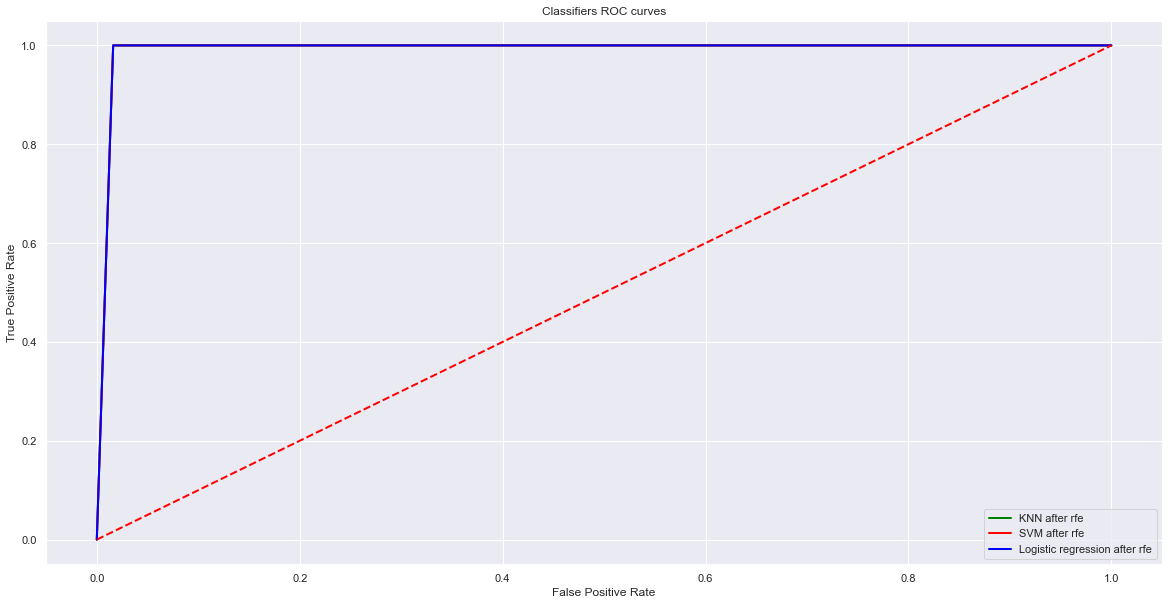

In [340]:
fpr1, tpr1, threshold1 = roc_curve(Y3_test, Y_pred_knn1, pos_label=1)
roc_auc1 = auc(fpr1, tpr1)
precision_knn, recall_knn, th_knn = precision_recall_curve(Y3_test, Y_pred_knn1, pos_label=1)

fpr2, tpr2, threshold2 = roc_curve(Y3_test, y_pred_svc_rfe, pos_label=1)
roc_auc2 = auc(fpr2, tpr2)
precision_knn, recall_knn, th_knn = precision_recall_curve(Y3_test, y_pred_svc_rfe, pos_label=1)

fpr3, tpr3, threshold3 = roc_curve(Y3_test, y_pred_rl_rfe, pos_label=1)
roc_auc3 = auc(fpr3, tpr3)
precision_knn, recall_knn, th_knn = precision_recall_curve(Y3_test, y_pred_rl_rfe, pos_label=1)





plt.figure(figsize=(20,10))

plt.plot(fpr1, tpr1, color='green', lw=2, label='KNN after rfe'% roc_auc1)
plt.plot(fpr2, tpr2, color='red', lw=2, label='SVM after rfe'% roc_auc2)
plt.plot(fpr3, tpr3, color='blue', lw=2, label='Logistic regression after rfe'% roc_auc3)


plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classifiers ROC curves')
plt.legend(loc = "best")
plt.show()

In [341]:
#****************************************************************
# Compare Algorithms ensembliste after RFE



#*****
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

s1=accuracy_score(Y3_test, ypred_NB_rfe )
s2=accuracy_score(Y3_test, ypred_XG_rfe)
s3=accuracy_score(Y3_test, ypred_dt2)
s4=accuracy_score(Y3_test, ypred_AB1)
s5=accuracy_score(Y3_test, ypred_cat_rfe)
s6=accuracy_score(Y3_test, ypred_RF2)
models = pd.DataFrame({
    'Model': ['Naive Bayes after rfe','XgBoost after rfe','Decision tree after rfe','AdaBoost after rfe','CatBoost after rfe',
              'Random forest after rfe'],
    'Score': [s1,s2, s3, s4, s5, s6]})
models.sort_values(by="Score",ascending=False)

Model  Score
4       CatBoost after rfe   1.00
3       AdaBoost after rfe   0.99
1        XgBoost after rfe   0.98
2  Decision tree after rfe   0.98
5  Random forest after rfe   0.97
0    Naive Bayes after rfe   0.92

### Roc curve 

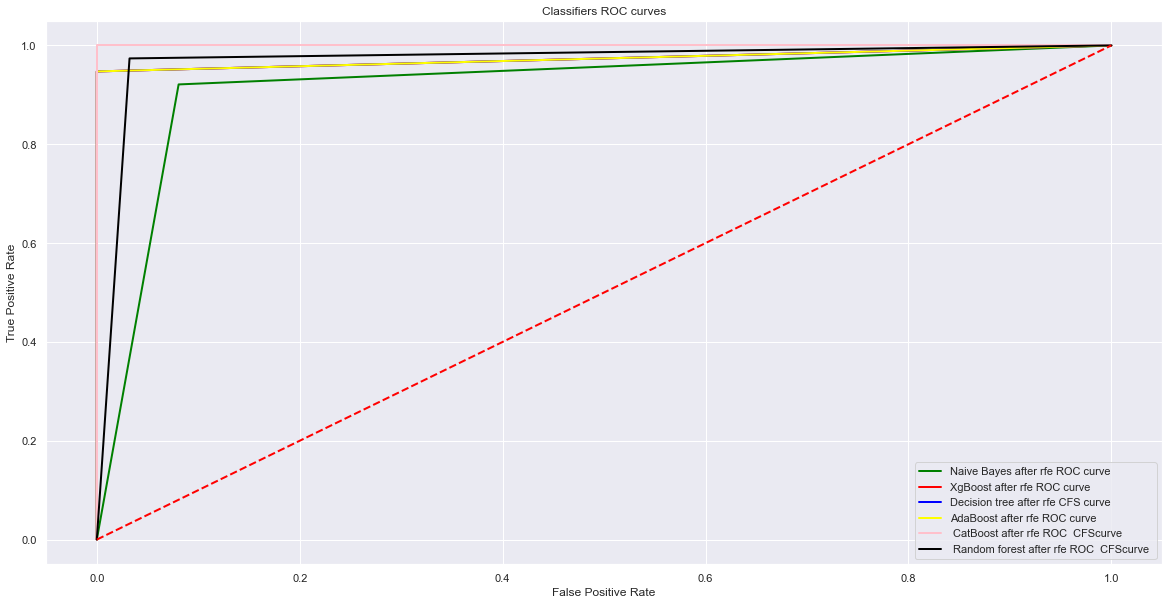

In [342]:
fpr1, tpr1, threshold1 = roc_curve(Y3_test, ypred_NB_rfe, pos_label=1)
roc_auc1 = auc(fpr1, tpr1)
precision_NB, recall_NB, th_NB = precision_recall_curve(Y3_test, ypred_NB_rfe, pos_label=1)

fpr2, tpr2, threshold2 = roc_curve(Y3_test, ypred_XG_rfe, pos_label=1)
roc_auc2 = auc(fpr2, tpr2)
precision_XG, recall_XG, th_XG = precision_recall_curve(Y3_test, ypred_XG_rfe, pos_label=1)

fpr3, tpr3, threshold3 = roc_curve(Y3_test, ypred_dt2, pos_label=1)
roc_auc3 = auc(fpr3, tpr3)
precision_dt, recall_dt, th_dt = precision_recall_curve(Y3_test, ypred_dt2, pos_label=1)

fpr4, tpr4, threshold4 = roc_curve(Y3_test, ypred_AB1, pos_label=1)
roc_auc4 = auc(fpr4, tpr4)
precision_AB, recall_AB, th_AB = precision_recall_curve(Y3_test, ypred_AB1, pos_label=1)

fpr5, tpr5, threshold5 = roc_curve(Y3_test, ypred_cat_rfe, pos_label=1)
roc_auc5 = auc(fpr5, tpr5)
precision_cat, recall_cat, th_cat = precision_recall_curve(Y3_test, ypred_cat_rfe, pos_label=1)

fpr6, tpr6, threshold6 = roc_curve(Y3_test, ypred_RF2, pos_label=1)
roc_auc6 = auc(fpr6, tpr6)
precision_RF2, recall_RF2, th_RF2 = precision_recall_curve(Y3_test, ypred_RF2, pos_label=1)


plt.figure(figsize=(20,10))

plt.plot(fpr1, tpr1, color='green', lw=2, label='Naive Bayes after rfe ROC curve'% roc_auc1)
plt.plot(fpr2, tpr2, color='red', lw=2, label='XgBoost after rfe ROC curve '% roc_auc2)
plt.plot(fpr3, tpr3, color='blue', lw=2, label='Decision tree after rfe CFS curve '% roc_auc3)
plt.plot(fpr4, tpr3, color='yellow', lw=2, label='AdaBoost after rfe ROC curve'% roc_auc4)
plt.plot(fpr5, tpr5, color='pink', lw=2, label=' CatBoost after rfe ROC  CFScurve '% roc_auc5)
plt.plot(fpr6, tpr6, color='black', lw=2, label=' Random forest after rfe ROC  CFScurve '% roc_auc6)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classifiers ROC curves')
plt.legend(loc = "best")
plt.show()

## Precision and recall

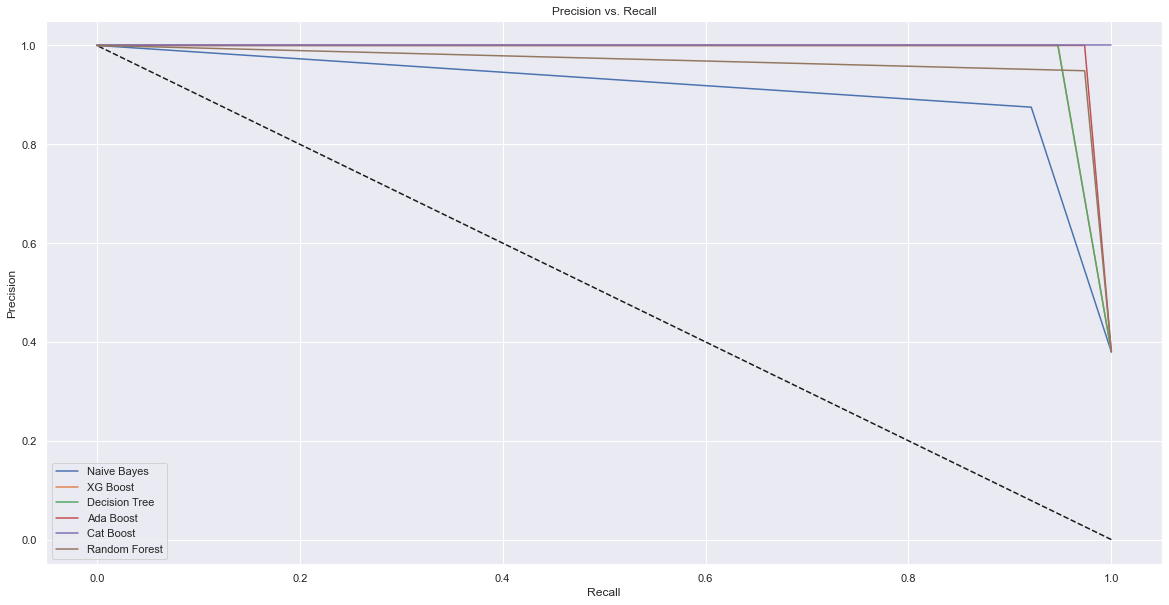

In [343]:
plt.figure(figsize=(20,10))
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(recall_NB, precision_NB, label='Naive Bayes')
plt.plot(recall_XG, precision_XG, label='XG Boost')
plt.plot(recall_dt, precision_dt, label='Decision Tree')
plt.plot(recall_AB, precision_AB, label='Ada Boost')
plt.plot(recall_cat, precision_cat, label='Cat Boost')
plt.plot(recall_RF2, precision_RF2, label='Random Forest')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

##### We can observe that Cat Boost,Random Forest,Decision tree has the same curve, which represent the most high balanced recall and precision

## Feature Selection with SelectKBest for Classification

In [344]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [345]:
select_class = SelectKBest(k=10, score_func=chi2)
select_class.fit(X_train, y_train)
X_train_new = select_class.transform(X_train)
print("Num Features before:", X_train.shape[1])
print("Num Features after:", X_train_new.shape[1])

Num Features before: 24
Num Features after: 10


In [346]:
new_df = X_train[:,select_class.get_support()]
new_df
new_df=pd.DataFrame(new_df)
new_df

0    1    2         3        4    5    6    7    8    9
0    0.00  0.0  0.0  0.456026  0.37500  0.0  0.0  0.0  0.0  0.0
1    0.25  0.0  0.0  0.521173  0.49949  0.0  0.0  0.0  0.0  1.0
2    0.00  0.0  0.0  0.508381  1.00000  0.0  0.0  0.0  0.0  0.0
3    0.25  0.0  0.0  1.000000  0.25000  0.0  1.0  0.0  1.0  0.0
4    0.00  0.0  0.0  0.508381  1.00000  0.0  0.0  0.0  0.0  0.0
..    ...  ...  ...       ...      ...  ...  ...  ...  ...  ...
295  0.00  0.0  0.0  0.390879  0.37500  0.0  0.0  0.0  0.0  0.0
296  0.00  0.0  0.0  0.390879  0.49949  0.0  0.0  0.0  0.0  0.0
297  0.00  0.0  0.0  0.970684  0.31250  0.0  0.0  0.0  0.0  0.0
298  0.75  0.0  0.0  0.508381  0.49949  0.0  0.0  0.0  0.0  0.0
299  0.25  1.0  0.0  1.000000  0.62500  0.0  0.0  0.0  0.0  0.0

[300 rows x 10 columns]

In [347]:
X_train_new.shape

(300, 10)

## model with SK feature Selection
